In [571]:
import xmltodict
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import json

# Y- >Divide the axis by 200, put label ((such as prportion of simulation) 

# X -> state of the top goal 

# Make label for the top row 

 

# Make a new plot, split result by completion (ex t0 and t1 of each file side by side, has gm and doesn’t have gm) 


In [572]:
def df_to_dict(df):
    if df.ndim == 1:
        return df.to_dict()

    ret = {}
    for key in df.index.get_level_values(0):
        
        sub_df = df.xs(key)
        ret[key + 1] = df_to_dict(sub_df)
    return ret

In [573]:
path = os.path.expanduser("E:/Downloads/tree_loc.csv")

data = pd.read_csv(path,engine='python')
data.rename(columns={'ï»¿above00':'above00'}, inplace=True)
tree_loc = df_to_dict(data)


In [574]:
def process_states(obj, states):
    for state in states:
        if state['@name'] == 'completed':
            obj['completed'].append(state['@value'])
        elif state['@name'] == 'pending':
            obj['pending'].append(state['@value'])
        elif state['@name'] == 'active':
            obj['active'].append(state['@value'])

In [575]:
def process_steps(obj, steps):
#     obj['max_steps'].append(steps['Max']['@value'])
#     obj['min_steps'].append(steps['Min']['@value'])
    obj['avg_steps'].append(steps['Average']['@value'])

In [576]:
def get_file_name(num):
    if(num > 9):
        return 'forest-0' + str(num)
    else:
        return 'forest-00' + str(num)

In [577]:
def create_dataset(starting_path,stochastic_num, xml_ending, algo):
    summary = {
        'forest_name': [],
        'goal_name': [],
        'stochasticity':[],
        'algo':[],
        'completed':[],
        'pending':[],
        'active':[],
#         'max_steps':[],
#         'min_steps':[],
        'avg_steps':[],
        'forest_num':[]
    }
    
    for i in range(1, 31):
        
        file_name = get_file_name(i)
        
        try:
#             print(starting_path +  "/forests/" + file_name + \
#                                       "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
# #             E:\Downloads\experiment-trees-00-results\00-above3\forests
# 'E:/Downloads/manual-trees/forests-fifo-new/new2Roots1-2Goals-
            
            path = os.path.expanduser(starting_path + "/forests/" + file_name + \
                                      "/perfMeasures-config-"+ algo +"-" + file_name +".xml.xml-"+ xml_ending + ".xml")
            with open(path) as fd:
                tree = xmltodict.parse(fd.read())
        except:
            continue
        goals = tree['PerformanceReport']['GoalMeasures']['Goal']
        
        if(not isinstance(goals, list)):
            states = goals['State']
#             steps = goals['Steps']


            process_states(summary, states)
            process_steps(summary, steps)

            summary['forest_name'].append(file_name)
            summary['goal_name'].append(goals['@name'])
            summary['stochasticity'].append(stochastic_num)
            summary['algo'].append(algo)
            summary['forest_num'].append(i)
        else:
            for goal in goals:
                states = goal['State']
                steps = goal['Steps']

                process_states(summary, states)
                process_steps(summary, steps)

                summary['forest_name'].append(file_name)
                summary['goal_name'].append(goal['@name'])
                summary['stochasticity'].append(stochastic_num)
                summary['algo'].append(algo)
                summary['forest_num'].append(i)
        
    df = pd.DataFrame(summary, columns=summary.keys())

    return df


In [578]:
def plot_status(df, title):
    df = df[['completed', 'pending', 'active']]
    ax = df.astype(float).mean().plot(kind='bar', title=title)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

In [579]:
def get_failed_by_retries(row):
    calculated_attempt = int(row['completed']) + int(row['pending']) + int(row['active'])
    return 200 - calculated_attempt
  


In [580]:
tree_loc

{1: {'above00': 0,
  'above04': 0,
  'above75': 1,
  'below00': 0,
  'below04': 0,
  'below75': 1},
 2: {'above00': 0,
  'above04': 0,
  'above75': 0,
  'below00': 0,
  'below04': 0,
  'below75': 0},
 3: {'above00': 0,
  'above04': 0,
  'above75': 0,
  'below00': 0,
  'below04': 0,
  'below75': 0},
 4: {'above00': 0,
  'above04': 1,
  'above75': 0,
  'below00': 0,
  'below04': 1,
  'below75': 0},
 5: {'above00': 0,
  'above04': 0,
  'above75': 0,
  'below00': 0,
  'below04': 0,
  'below75': 0},
 6: {'above00': 0,
  'above04': 1,
  'above75': 1,
  'below00': 0,
  'below04': 1,
  'below75': 1},
 7: {'above00': 1,
  'above04': 0,
  'above75': 1,
  'below00': 1,
  'below04': 0,
  'below75': 1},
 8: {'above00': 1,
  'above04': 0,
  'above75': 0,
  'below00': 1,
  'below04': 0,
  'below75': 0},
 9: {'above00': 1,
  'above04': 1,
  'above75': 1,
  'below00': 1,
  'below04': 1,
  'below75': 1},
 10: {'above00': 0,
  'above04': 0,
  'above75': 0,
  'below00': 0,
  'below04': 0,
  'below75': 0},

In [581]:
def get_has_gm(row, loc):
    
    trees = ['T0-G0', 'T1-G0']
    
    idx = row['forest_num']
    name = row['goal_name']
    

    if(tree_loc[idx][loc] == 0):

        if(name == trees[0]):
            return "has GM"
        else:
            return "no GM"
    if(tree_loc[idx][loc] == 1):
        if(name == trees[1]):
            return "has GM"
        else:
            return "no GM"
                

In [582]:
# df_copy['has_gm'] = df_copy.apply (lambda row: get_has_gm(row, 'below75'), axis=1)

In [583]:
def apply_column(df, loc):
    df['failed_by_retries'] = df.apply (lambda row: get_failed_by_retries(row), axis=1)
    df['has_gm'] = df.apply (lambda row: get_has_gm(row, loc), axis=1)
    

In [584]:
def get_proportion_df(df):
    df_new = df.copy()
    df_new['completed'] = df['completed'].div(200)
    df_new['pending'] = df['pending'].div(200)
    df_new['active'] = df['active'].div(200)
    df_new['failed_by_retries'] = df['failed_by_retries'].div(200)
    
    return df_new

In [585]:
df00above_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'fifo')
df00above_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'fifo')
df00above_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'fifo')

df00bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'fifo')
df00bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'fifo')
df00bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'fifo')

df00above_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3', '0', '00', 'rr')
df00above_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','1', '1', 'rr')
df00above_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-above3','05', '05', 'rr')

df00bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3', '0', '00', 'rr')
df00bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','1', '1', 'rr')
df00bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-00-results/00-bellow3','05', '05', 'rr')

df00above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3', '0', '00', 'custom')
df00above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3','1', '1', 'custom')
df00above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-above3','05', '05', 'custom')

df00bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3', '0', '00', 'custom')
df00bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3','1', '1', 'custom')
df00bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-00/00-bellow3','05', '05', 'custom')

#####################################

df04above_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'fifo')
df04above_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'fifo')
df04above_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'fifo')

df04bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'fifo')
df04bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'fifo')
df04bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'fifo')

df04above_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3', '0', '00', 'rr')
df04above_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','1', '1', 'rr')
df04above_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-above3','05', '05', 'rr')


#E:\Downloads\experiment-trees-04-results\04-bellow3
df04bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3', '0', '00', 'rr')
df04bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','1', '1', 'rr')
df04bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-04-results/04-bellow3','05', '05', 'rr')

df04above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3', '0', '00', 'custom')
df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
df04above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','05', '05', 'custom')

df04bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3', '0', '00', 'custom')
df04bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','1', '1', 'custom')
df04bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-bellow3','05', '05', 'custom')

######################################

df75above_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'fifo')
df75above_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'fifo')
df75above_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'fifo')

df75bellow_00_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'fifo')
df75bellow_01_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'fifo')
df75bellow_05_ff = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'fifo')

df75above_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3', '0', '00', 'rr')
df75above_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','1', '1', 'rr')
df75above_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-above3','05', '05', 'rr')

df75bellow_00_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3', '0', '00', 'rr')
df75bellow_01_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','1', '1', 'rr')
df75bellow_05_rr = create_dataset('E:/Downloads/experiment-trees-75-results/75-bellow3','05', '05', 'rr')

df75above_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3', '0', '00', 'custom')
df75above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3','1', '1', 'custom')
df75above_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-above3','05', '05', 'custom')


df75bellow_00_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3', '0', '00', 'custom')
df75bellow_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3','1', '1', 'custom')
df75bellow_05_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-75/75-bellow3','05', '05', 'custom')


#######################################################################




In [586]:
# df75above_00_cus 

In [587]:
# df04above_01_cus = create_dataset('E:/Downloads/experiment-trees-results-new/experiment-trees-04/04-above3','1', '1', 'custom')
# df04above_01_cus

In [588]:
df00above_00_ff = df00above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_ff = df00above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_ff = df00above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_ff = df00bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_ff = df00bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_ff = df00bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00above_00_cus = df00above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_cus = df00above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_cus = df00above_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_cus = df00bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_cus = df00bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_cus = df00bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00above_00_rr = df00above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_05_rr = df00above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00above_01_rr = df00above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df00bellow_00_rr = df00bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_05_rr= df00bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df00bellow_01_rr = df00bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

###################################


df04above_00_ff = df04above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_ff = df04above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_ff = df04above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_ff = df04bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_ff = df04bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_ff = df04bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_cus = df04bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_cus = df04bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_cus = df04bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04above_00_rr = df04above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_rr = df04above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_rr = df04above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_rr = df04bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_rr= df04bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_rr = df04bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04above_00_cus = df04above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_05_cus= df04above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04above_01_cus = df04above_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df04bellow_00_cus = df04bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_05_cus = df04bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df04bellow_01_cus = df04bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

##############################

df75above_00_ff = df75above_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_ff = df75above_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_ff = df75above_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75bellow_00_ff = df75bellow_00_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_ff = df75bellow_05_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_ff = df75bellow_01_ff.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75above_00_rr = df75above_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_rr = df75above_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_rr = df75above_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75bellow_00_rr = df75bellow_00_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_rr= df75bellow_05_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_rr = df75bellow_01_rr.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})

df75above_00_cus = df75above_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_05_cus = df75above_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75above_01_cus = df75above_01_cus.astype({"completed": int, "pending": int, 'active': int})

df75bellow_00_cus = df75bellow_00_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_05_cus= df75bellow_05_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})
df75bellow_01_cus = df75bellow_01_cus.astype({"completed": int, "pending": int, 'active': int, 'avg_steps':float})



In [589]:
# {'above00': 0,
#   'above04': 0,
#   'above75': 1,
#   'below00': 0,
#   'below04': 0,
#   'below75': 1},

apply_column(df00above_00_ff, 'above00')
apply_column(df00above_01_ff, 'above00')
apply_column(df00above_05_ff, 'above00')

apply_column(df00bellow_00_ff, 'below00')
apply_column(df00bellow_01_ff, 'below00')
apply_column(df00bellow_05_ff, 'below00')

apply_column(df00above_00_rr, 'above00')
apply_column(df00above_01_rr, 'above00')
apply_column(df00above_05_rr, 'above00')

apply_column(df00bellow_00_rr, 'below00')
apply_column(df00bellow_01_rr, 'below00')
apply_column(df00bellow_05_rr, 'below00')

apply_column(df00above_00_cus, 'above00')
apply_column(df00above_01_cus, 'above00')
apply_column(df00above_05_cus, 'above00')

apply_column(df00bellow_00_cus, 'below00')
apply_column(df00bellow_01_cus, 'below00')
apply_column(df00bellow_05_cus, 'below00')

df00above_all = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff, \
                      df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)

df00above_ff = pd.concat([df00above_00_ff, df00above_05_ff, df00above_01_ff], ignore_index=True)

df00above_rr = pd.concat([df00above_00_rr, df00above_05_rr, df00above_01_rr], ignore_index=True)

df00above_cus = pd.concat([df00above_00_cus, df00above_05_cus, df00above_01_cus], ignore_index=True)


df00bellow_all = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff,
                     df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)


df00bellow_ff = pd.concat([df00bellow_00_ff, df00bellow_05_ff, df00bellow_01_ff], ignore_index=True)

df00bellow_rr = pd.concat([df00bellow_00_rr, df00bellow_05_rr, df00bellow_01_rr], ignore_index=True)

df00bellow_cus = pd.concat([df00bellow_00_cus, df00bellow_05_cus, df00bellow_01_cus], ignore_index=True)


df00_all = pd.concat([df00above_all, df00bellow_all], ignore_index=True)

df00_ff = pd.concat([df00above_ff, df00bellow_ff], ignore_index=True)

df00_rr = pd.concat([df00above_rr, df00bellow_rr], ignore_index=True)

df00_cus = pd.concat([df00above_cus, df00bellow_cus], ignore_index=True)

##########################

apply_column(df04above_00_ff, 'above04')
apply_column(df04above_01_ff, 'above04')
apply_column(df04above_05_ff, 'above04')

apply_column(df04bellow_00_ff, 'below04')
apply_column(df04bellow_01_ff, 'below04')
apply_column(df04bellow_05_ff, 'below04')

apply_column(df04above_00_rr, 'above04')
apply_column(df04above_01_rr, 'above04')
apply_column(df04above_05_rr, 'above04')

apply_column(df04bellow_00_rr, 'below04')
apply_column(df04bellow_01_rr, 'below04')
apply_column(df04bellow_05_rr, 'below04')

apply_column(df04above_00_cus, 'above04')
apply_column(df04above_01_cus, 'above04')
apply_column(df04above_05_cus, 'above04')

apply_column(df04bellow_00_cus, 'below04')
apply_column(df04bellow_01_cus, 'below04')
apply_column(df04bellow_05_cus, 'below04')


df04above_all = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff, \
                      df04above_00_rr, df04above_05_rr, df04above_01_rr, \
                          df04above_00_cus, df04above_05_cus, df04above_01_cus], ignore_index=True)

df04above_ff = pd.concat([df04above_00_ff, df04above_05_ff, df04above_01_ff], ignore_index=True)

df04above_rr = pd.concat([df04above_00_rr, df04above_05_rr, df04above_01_rr], ignore_index=True)

df04above_cus = pd.concat([df04above_00_cus, df04above_05_cus, df04above_01_cus], ignore_index=True)


df04bellow_all = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff,
                     df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr,
                     df04bellow_00_cus, df04bellow_05_cus, df04bellow_01_cus], ignore_index=True)

df04bellow_ff = pd.concat([df04bellow_00_ff, df04bellow_05_ff, df04bellow_01_ff], ignore_index=True)

df04bellow_rr = pd.concat([df04bellow_00_rr, df04bellow_05_rr, df04bellow_01_rr], ignore_index=True)

df04bellow_cus = pd.concat([df04bellow_00_cus, df04bellow_05_cus, df04bellow_01_cus], ignore_index=True)

df04_all = pd.concat([df04above_all, df04bellow_all], ignore_index=True)

df04_ff = pd.concat([df04above_ff, df04bellow_ff], ignore_index=True)
df04_rr = pd.concat([df04above_rr, df04bellow_rr], ignore_index=True)
df04_cus = pd.concat([df04above_cus, df04bellow_cus], ignore_index=True)

##################################


apply_column(df75above_00_ff, 'above75')
apply_column(df75above_01_ff, 'above75')
apply_column(df75above_05_ff, 'above75')

apply_column(df75bellow_00_ff, 'below75')
apply_column(df75bellow_01_ff, 'below75')
apply_column(df75bellow_05_ff, 'below75')

apply_column(df75above_00_rr, 'above75')
apply_column(df75above_01_rr, 'above75')
apply_column(df75above_05_rr, 'above75')

apply_column(df75bellow_00_rr, 'below75')
apply_column(df75bellow_01_rr, 'below75')
apply_column(df75bellow_05_rr, 'below75')

apply_column(df75above_00_cus, 'above75')
apply_column(df75above_01_cus, 'above75')
apply_column(df75above_05_cus, 'above75')

apply_column(df75bellow_00_cus, 'below75')
apply_column(df75bellow_01_cus, 'below75')
apply_column(df75bellow_05_cus, 'below75')

df75above_all = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff, \
                      df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)

df75above_ff = pd.concat([df75above_00_ff, df75above_05_ff, df75above_01_ff], ignore_index=True)

df75above_rr = pd.concat([df75above_00_rr, df75above_05_rr, df75above_01_rr], ignore_index=True)

df75above_cus = pd.concat([df75above_00_cus, df75above_05_cus, df75above_01_cus], ignore_index=True)


df75bellow_all = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff,
                     df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75bellow_ff = pd.concat([df75bellow_00_ff, df75bellow_05_ff, df75bellow_01_ff], ignore_index=True)

df75bellow_rr = pd.concat([df75bellow_00_rr, df75bellow_05_rr, df75bellow_01_rr], ignore_index=True)

df75bellow_cus = pd.concat([df75bellow_00_cus, df75bellow_05_cus, df75bellow_01_cus], ignore_index=True)

df75_all = pd.concat([df75above_all, df75bellow_all], ignore_index=True)

df75_ff = pd.concat([df75above_ff, df75bellow_ff], ignore_index=True)
df75_rr = pd.concat([df75above_rr, df75bellow_rr], ignore_index=True)
df75_cus = pd.concat([df75above_cus, df75bellow_cus], ignore_index=True)



In [590]:
df_ff = pd.concat([df00_ff, df04_ff,df75_ff], ignore_index=True)
df_rr = pd.concat([df00_rr, df04_rr,df75_rr], ignore_index=True)
df_cus = pd.concat([df00_cus, df04_cus,df75_cus], ignore_index=True)

In [591]:
df_cus.sample(3)

forest_name goal_name stochasticity    algo  completed  pending  active  \
194  forest-010     T0-G0             0  custom        162        0      11   
884  forest-007     T0-G0             0  custom        137        0      63   
393  forest-019     T1-G0             0  custom        134        0      26   

    avg_steps  forest_num  failed_by_retries  has_gm  
194   11.1111          10                 27  has GM  
884         9           7                  0   no GM  
393        11          19                 40   no GM

In [592]:
def plot_all(df_list, titles, title):
    nrow=2
    ncol=3
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
            df_new = get_proportion_df(df)
            
            props = dict(boxes="pink", whiskers="ForestGreen", medians="DarkBlue", caps="Gray")

            ax = df_new.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8),color=props, patch_artist=True)
            
                
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
             
            plt.sca(axes[r,c])
            
            
            if r == 1:
#                 plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))
                plt.setp( axes[r,c].xaxis.get_majorticklabels(), rotation=45 )
            if r == 0:
                plt.xticks(np.arange(1, 5), ("", "", "", ""))
            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

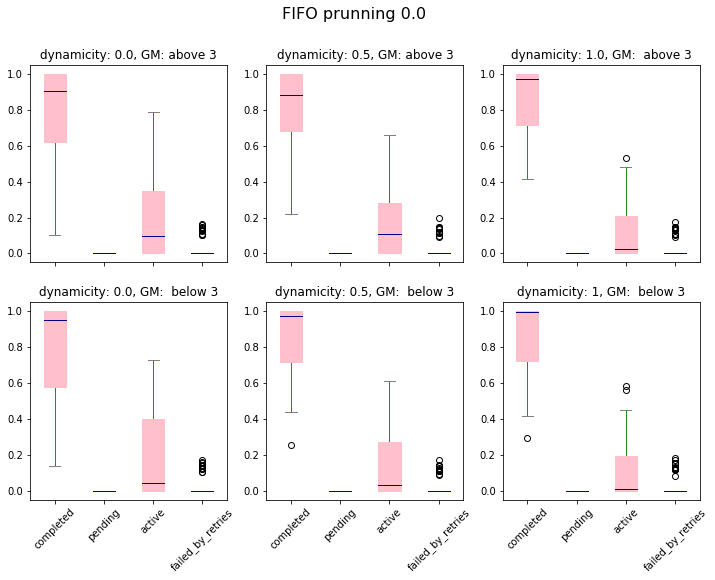

In [593]:
plot_all([df00above_00_ff ,df00above_05_ff, df00above_01_ff,df00bellow_00_ff ,df00bellow_05_ff, df00bellow_01_ff], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "FIFO prunning 0.0")

In [ ]:
# df00above_00_ff

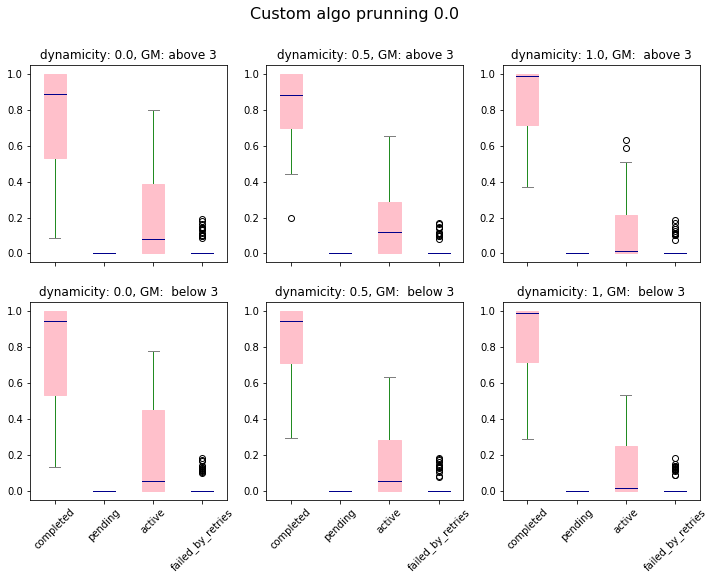

In [ ]:
plot_all([df00above_00_cus ,df00above_05_cus, df00above_01_cus,df00bellow_00_cus ,df00bellow_05_cus, df00bellow_01_cus], \
            ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "Custom algo prunning 0.0")

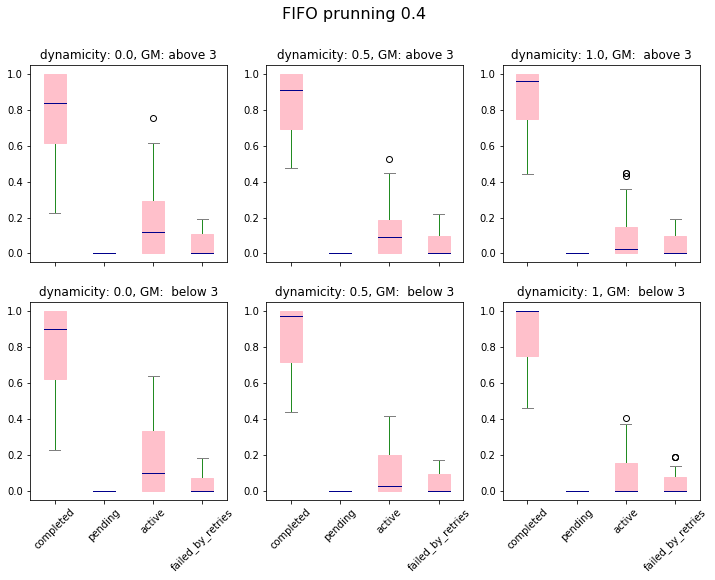

In [ ]:
plot_all([df04above_00_ff ,df04above_05_ff, df04above_01_ff,df04bellow_00_ff ,df04bellow_05_ff, df04bellow_01_ff], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "FIFO prunning 0.4")

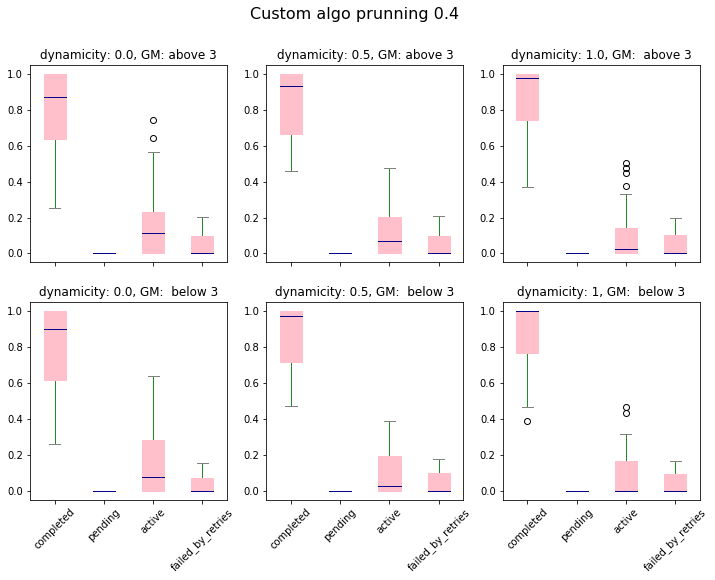

In [ ]:
plot_all([df04above_00_cus ,df04above_05_cus, df04above_01_cus,df04bellow_00_cus ,df04bellow_05_cus, df04bellow_01_cus], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "Custom algo prunning 0.4")

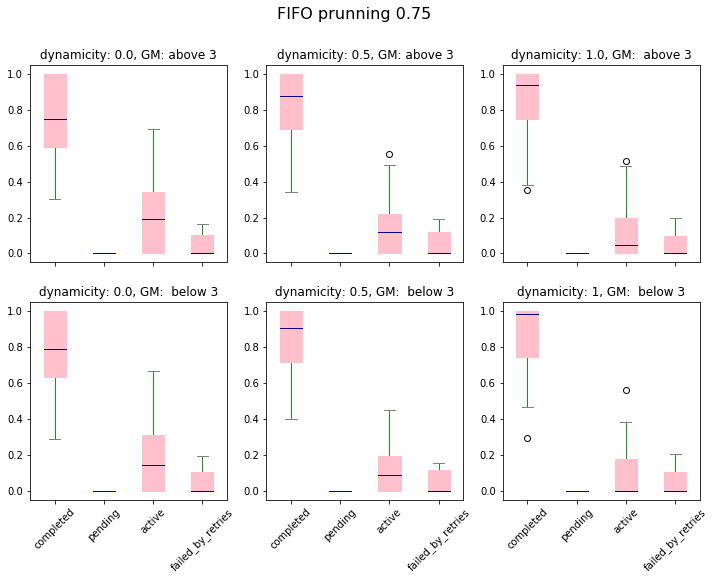

In [ ]:
plot_all([df75above_00_ff ,df75above_05_ff, df75above_01_ff,df75bellow_00_ff ,df75bellow_05_ff, df75bellow_01_ff], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "FIFO prunning 0.75")

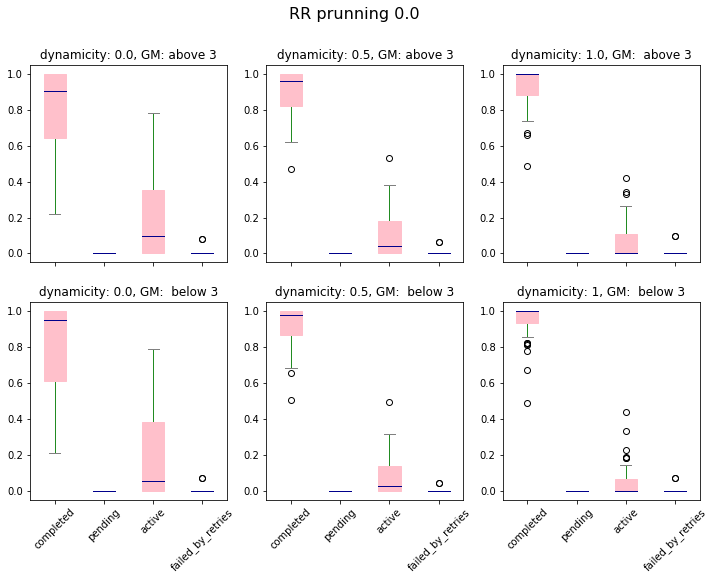

In [ ]:
plot_all([df00above_00_rr ,df00above_05_rr, df00above_01_rr,df00bellow_00_rr ,df00bellow_05_rr, df00bellow_01_rr], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "RR prunning 0.0")

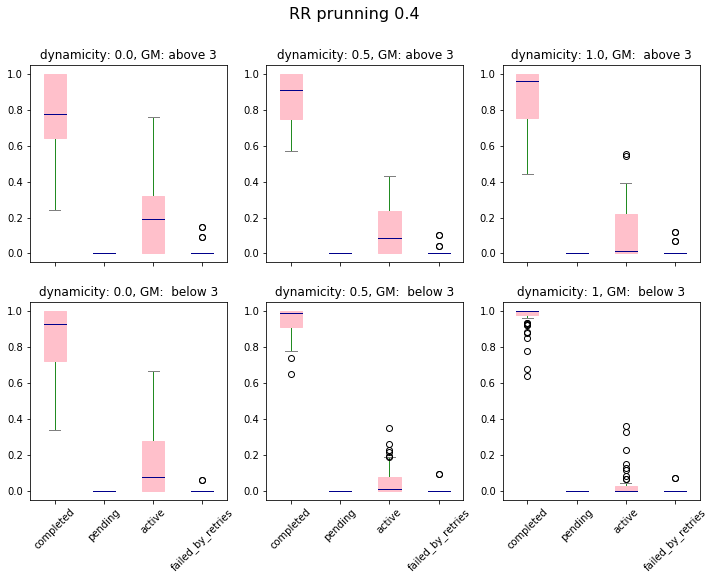

In [ ]:
plot_all([df04above_00_rr ,df04above_05_rr, df04above_01_rr,df04bellow_00_rr ,df04bellow_05_rr, df04bellow_01_rr], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "RR prunning 0.4")

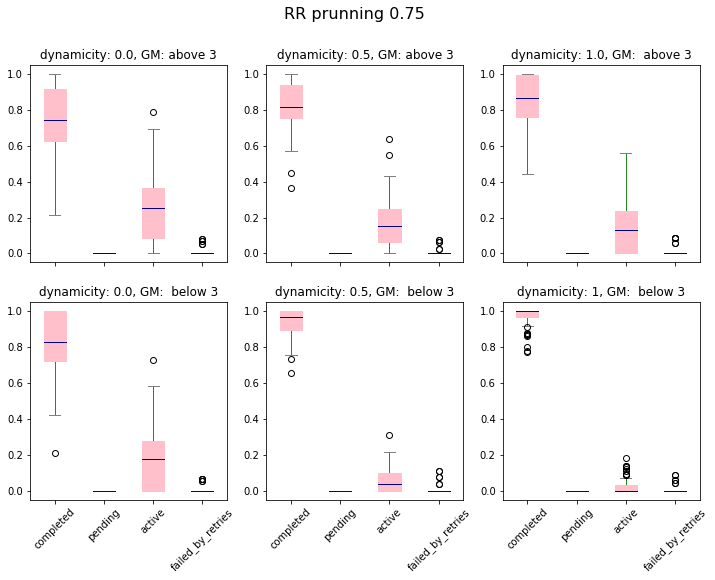

In [ ]:
plot_all([df75above_00_rr ,df75above_05_rr, df75above_01_rr,df75bellow_00_rr ,df75bellow_05_rr, df75bellow_01_rr], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "RR prunning 0.75")

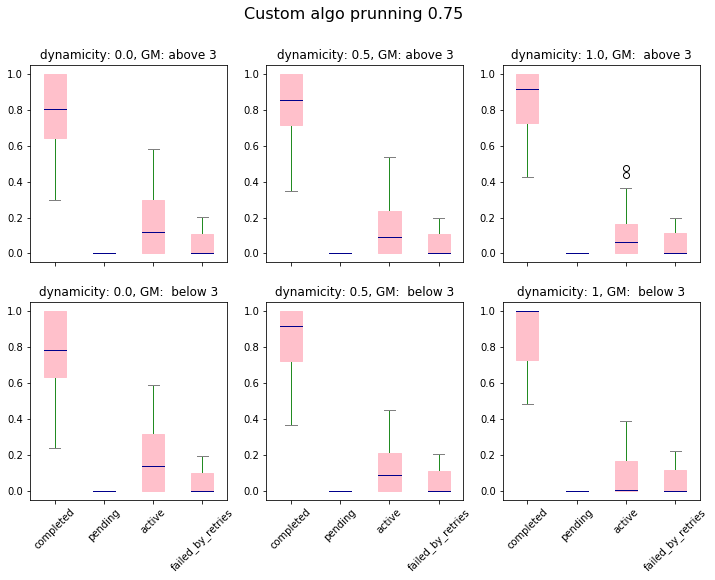

In [ ]:
plot_all([df75above_00_cus ,df75above_05_cus, df75above_01_cus,df75bellow_00_cus ,df75bellow_05_cus, df75bellow_01_cus], \
             ['dynamicity: 0.0, GM: above 3', 'dynamicity: 0.5, GM: above 3','dynamicity: 1.0, GM:  above 3','dynamicity: 0.0, GM:  below 3', 'dynamicity: 0.5, GM:  below 3','dynamicity: 1, GM:  below 3'], "Custom algo prunning 0.75")

In [ ]:
def plot_many(df0, df1, df2, title0, title1, title2, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_copy = df0_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df1_copy = df1_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            df2_copy = df2_copy[['stochasticity','goal_name','completed', 'pending', 'active', 'failed_by_retries']]
            
                        
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)
            df2_new = get_proportion_df(df2_copy)
            
            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df1['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[0])

            axs[0].set_title(title0)
            axs[0].get_legend().remove()
            fig.suptitle((file_name + " " + category), fontsize=14)
            df1_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[1])

            axs[1].set_title(title1)
            axs[1].get_legend().remove()
            
            df2_new.groupby(['stochasticity', 'goal_name']).sum().plot(kind='bar' , ax=axs[2])

            axs[2].set_title(title2)
            if(i == 1):
                axs[2].legend(bbox_to_anchor=(1, 1))
            else:
                axs[2].get_legend().remove()
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=45 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=45 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=45 )
            plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)



            plt.show()
        except:
            print(file_name + " not found")

        

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


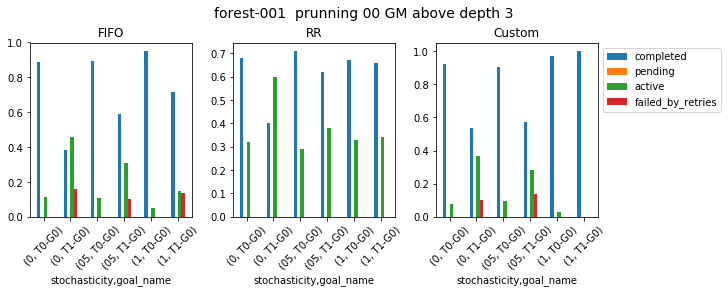

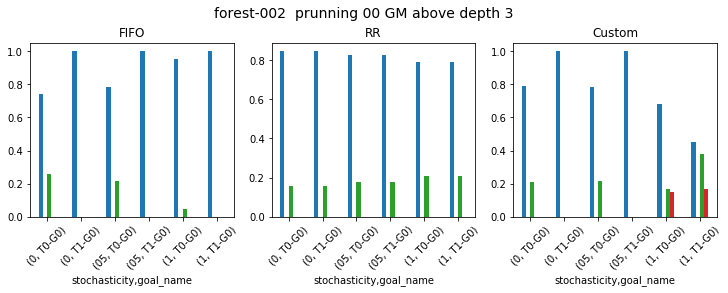

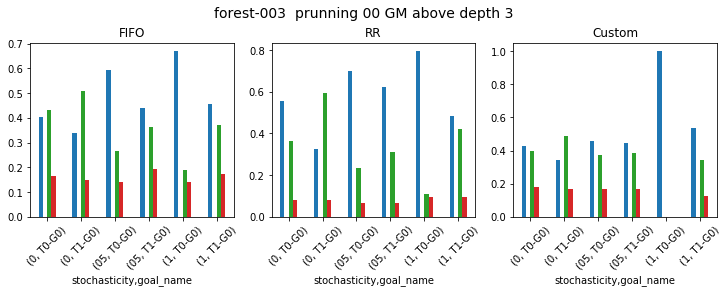

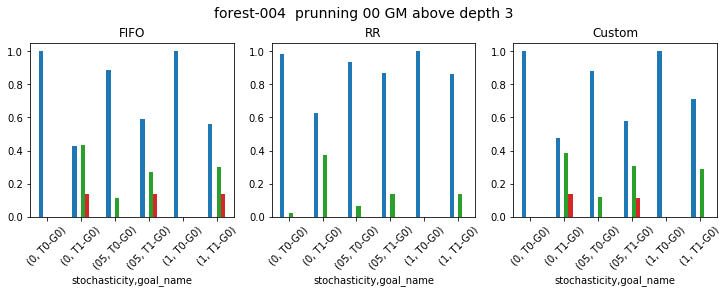

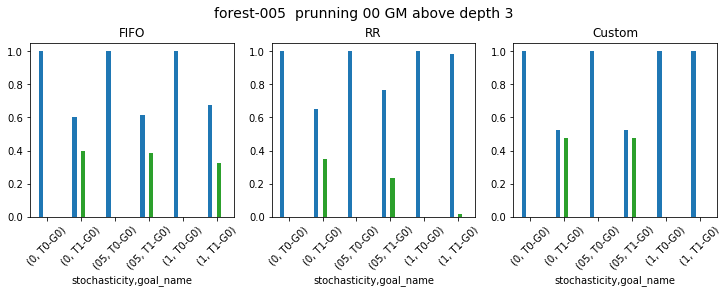

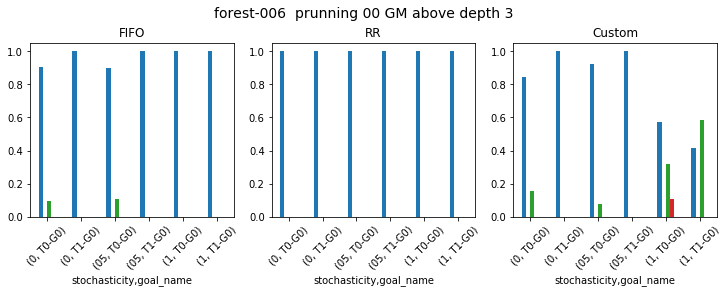

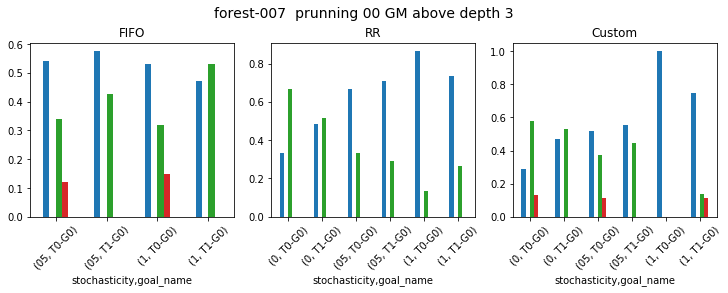

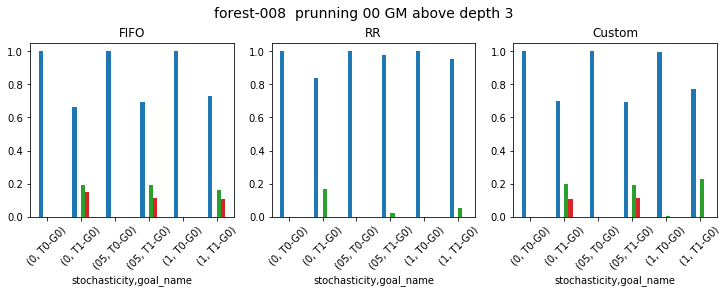

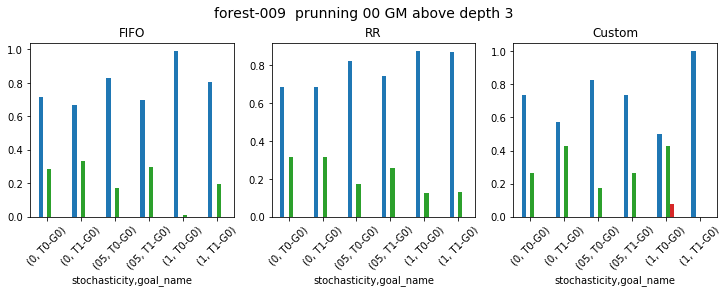

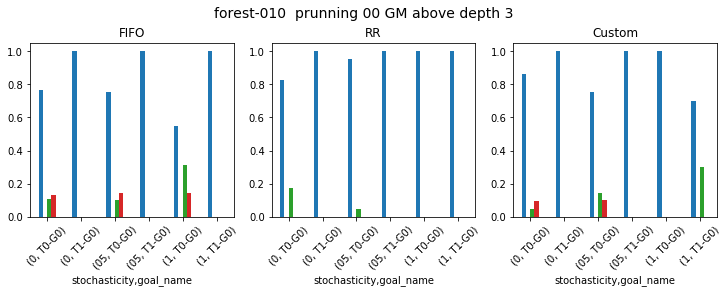

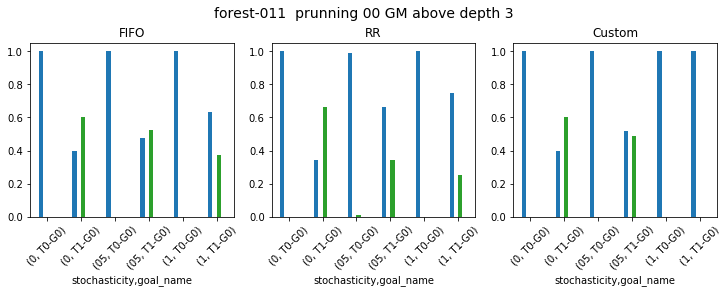

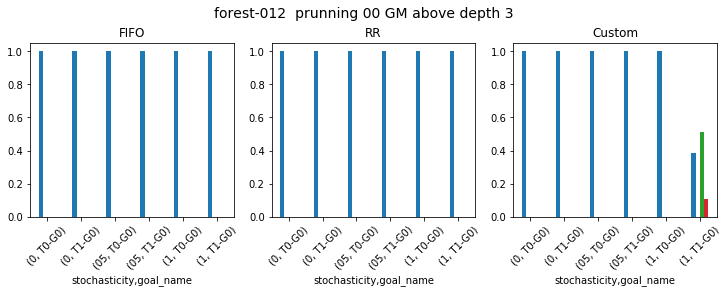

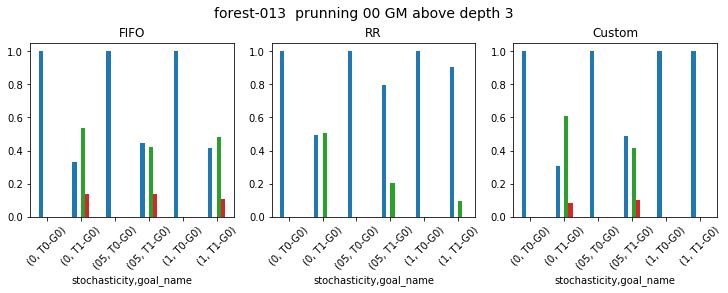

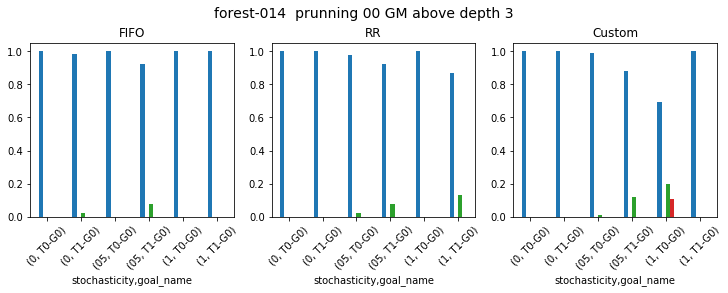

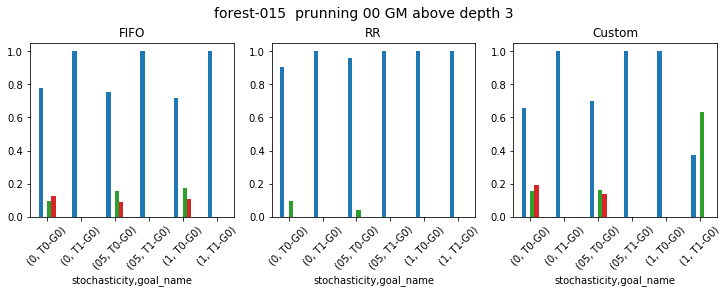

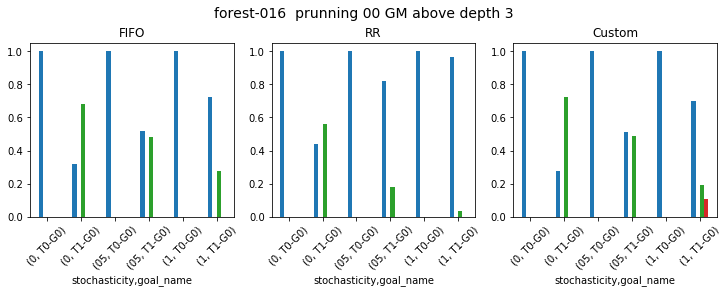

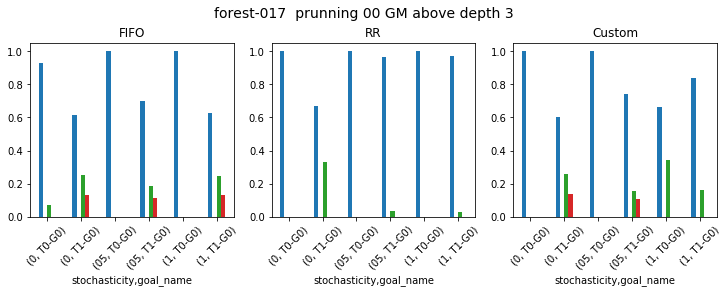

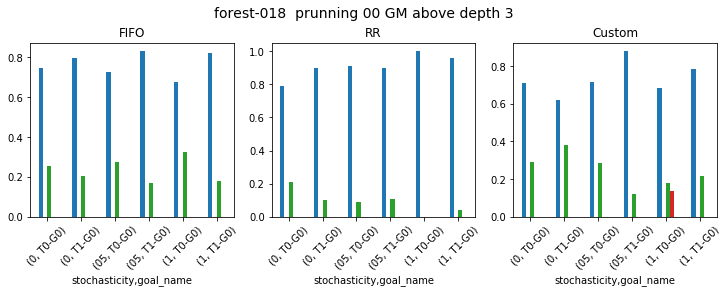

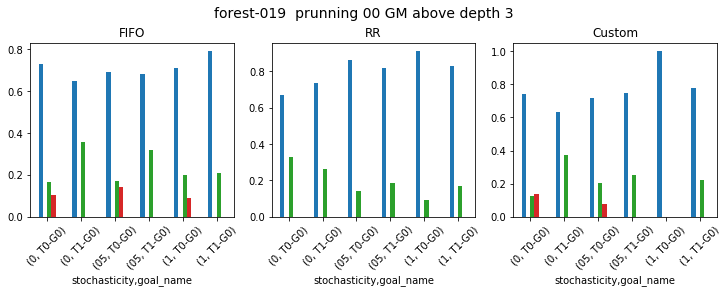

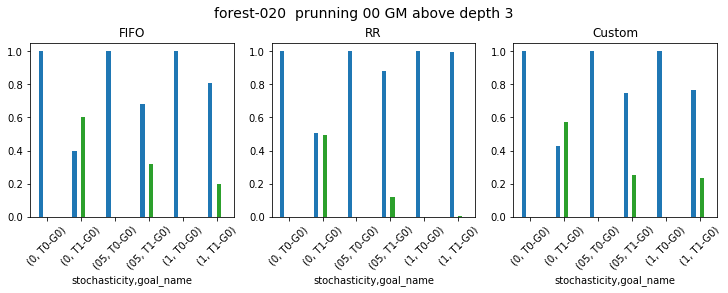

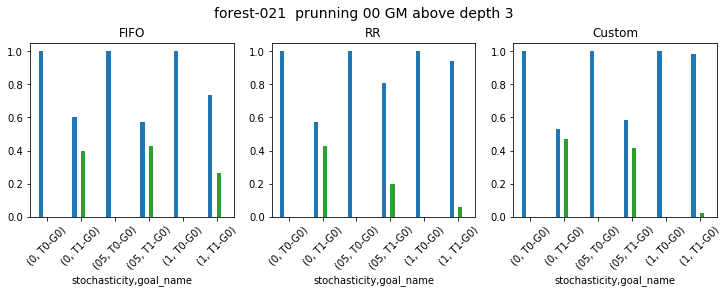

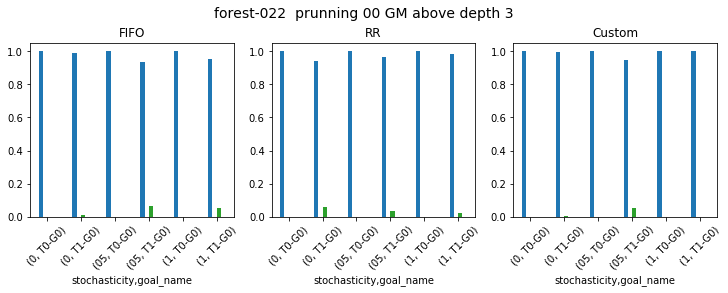

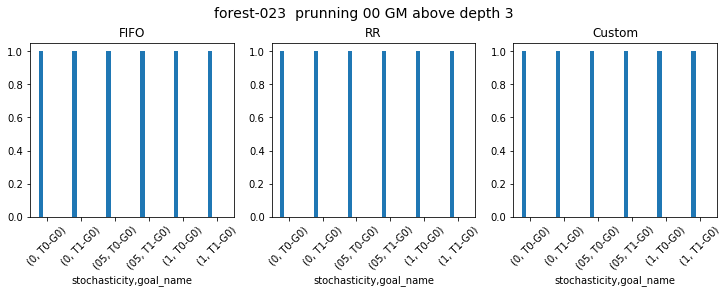

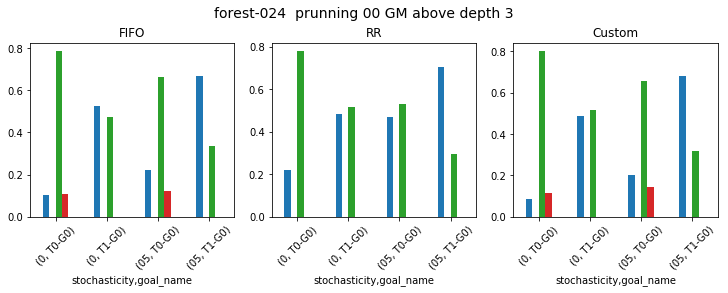

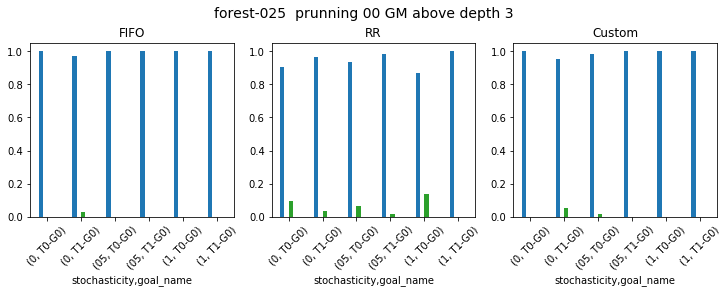

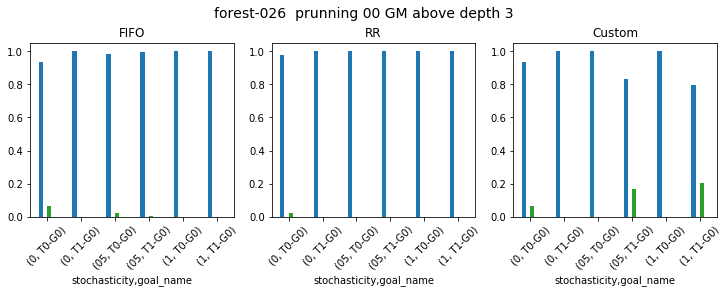

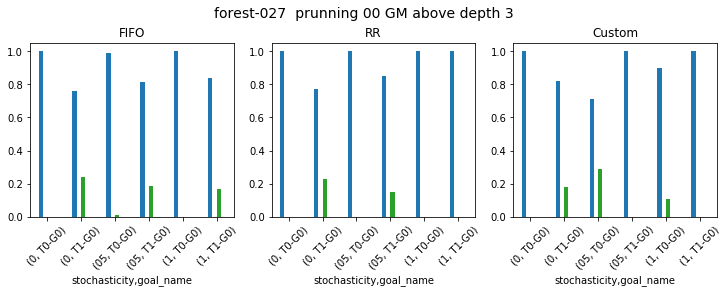

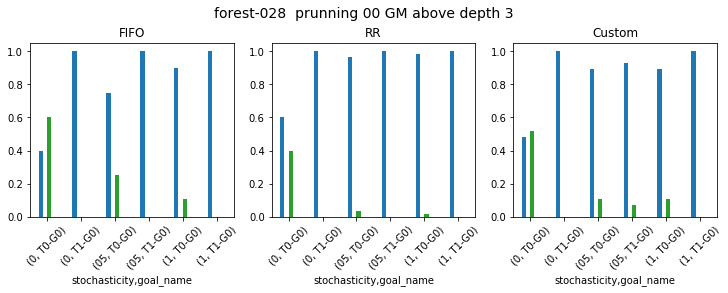

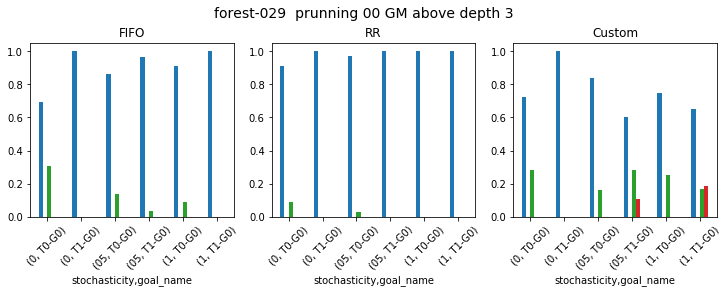

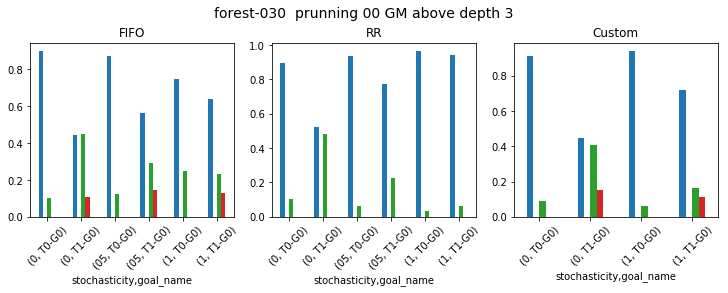

In [ ]:
plot_many(df00above_ff, df00above_rr, df00above_cus, "FIFO", "RR", "Custom", " prunning 00 GM above depth 3")

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


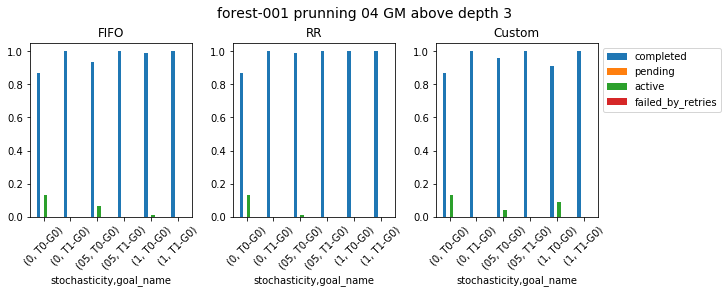

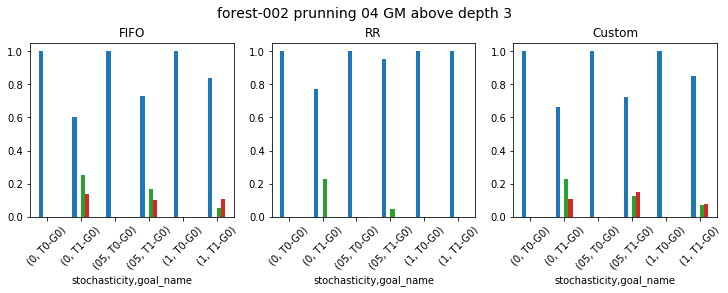

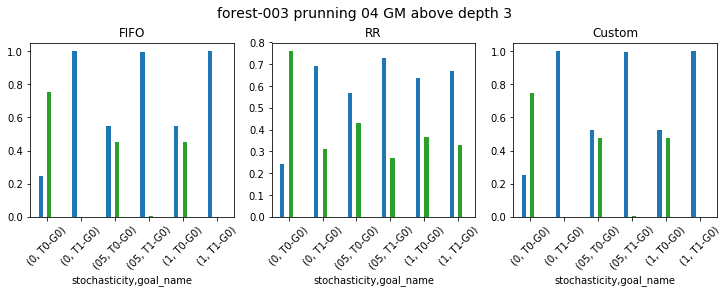

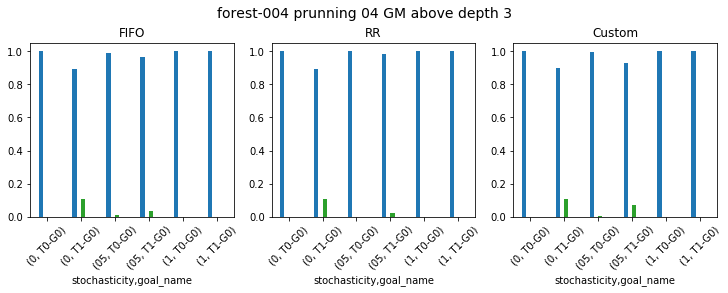

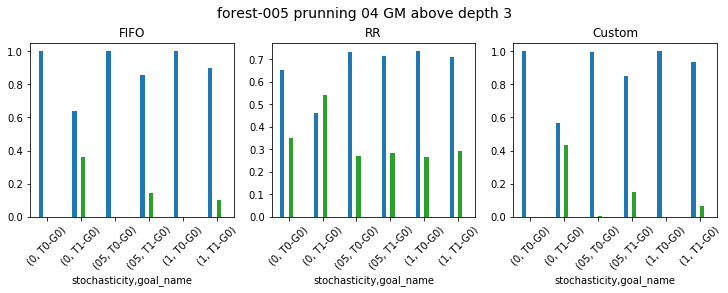

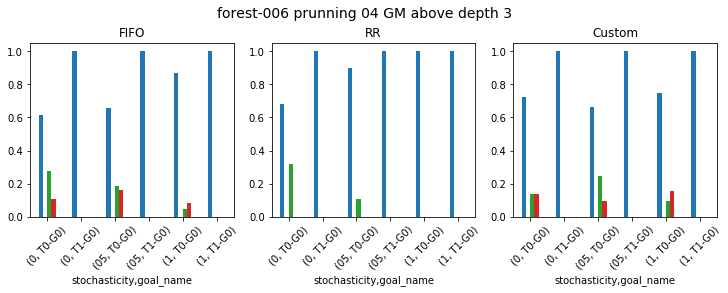

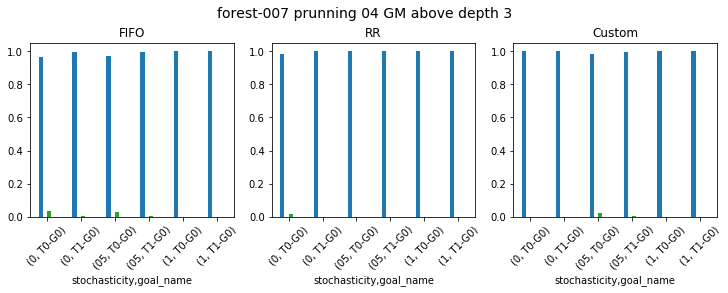

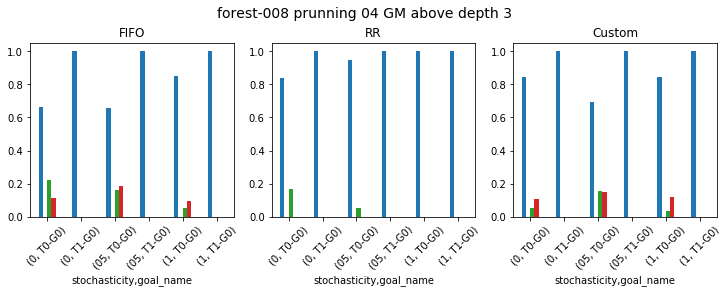

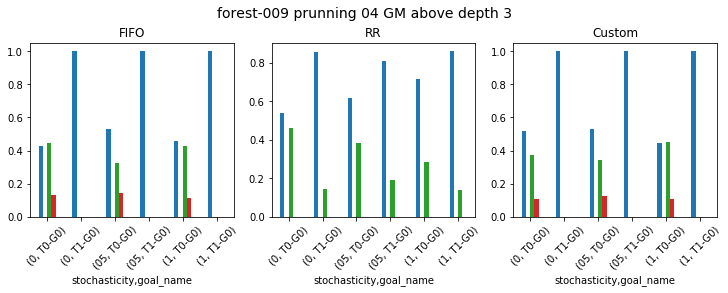

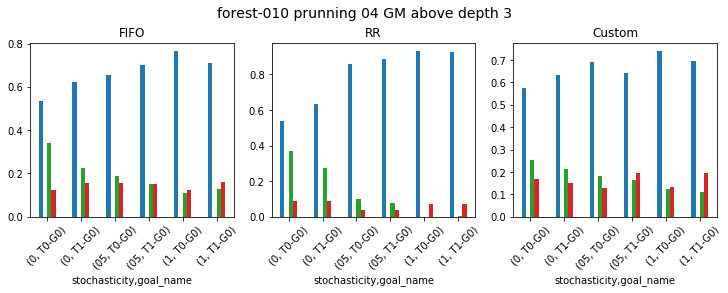

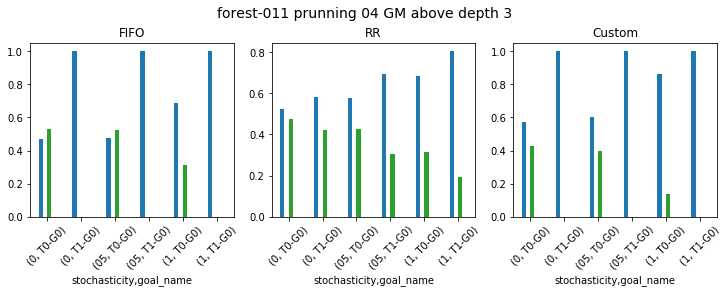

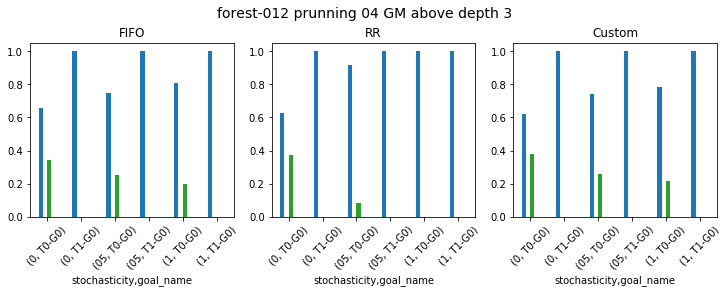

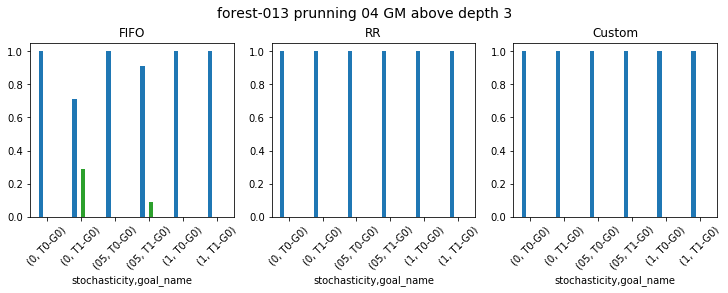

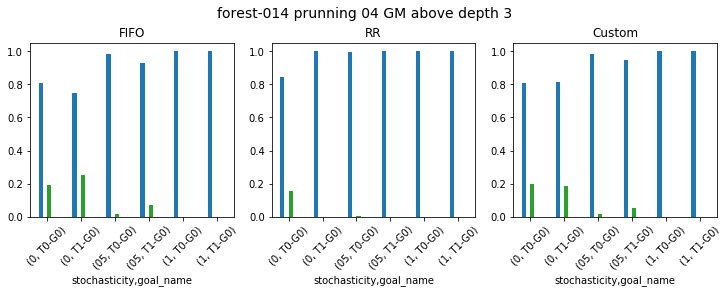

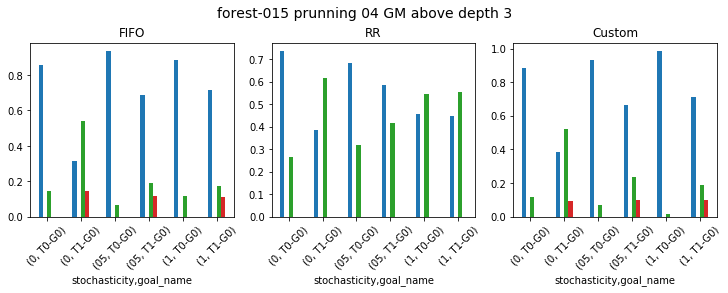

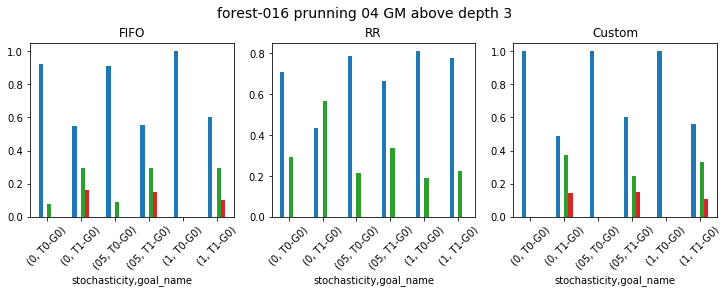

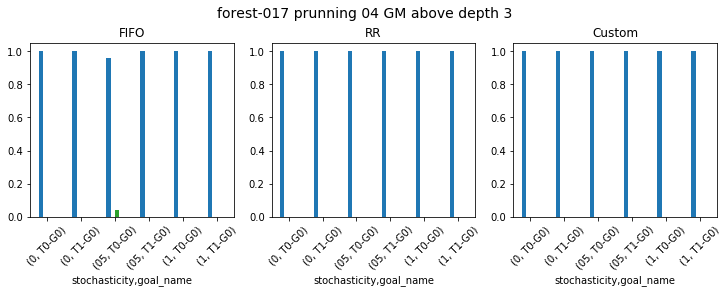

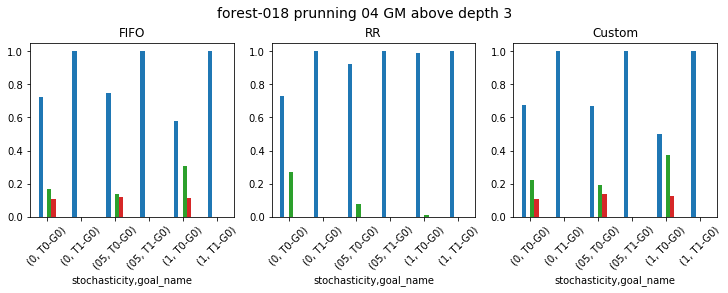

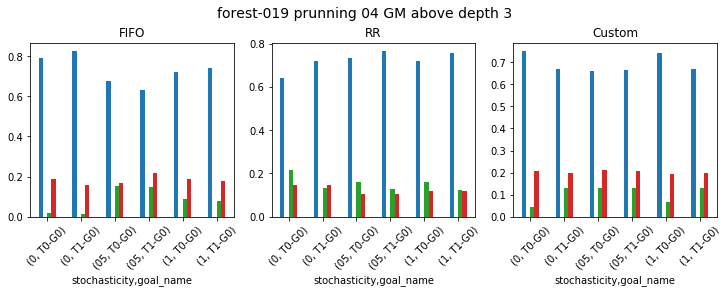

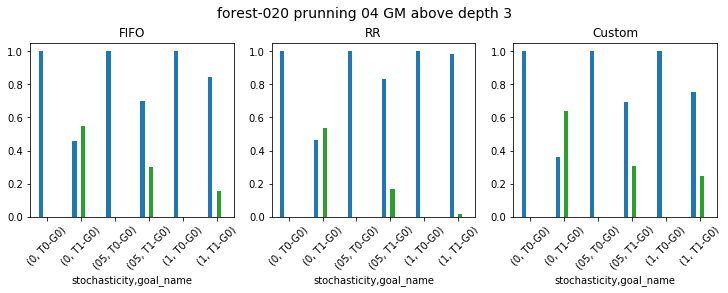

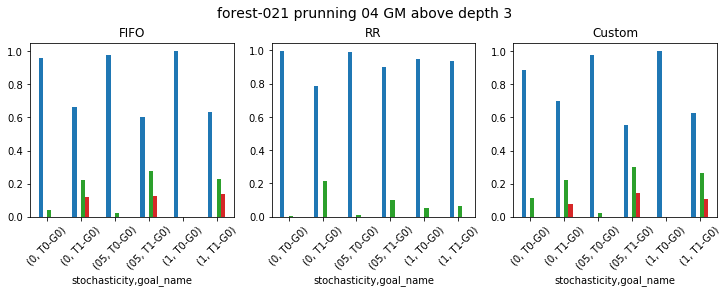

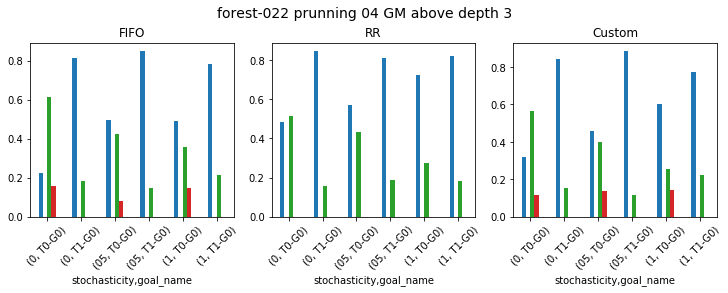

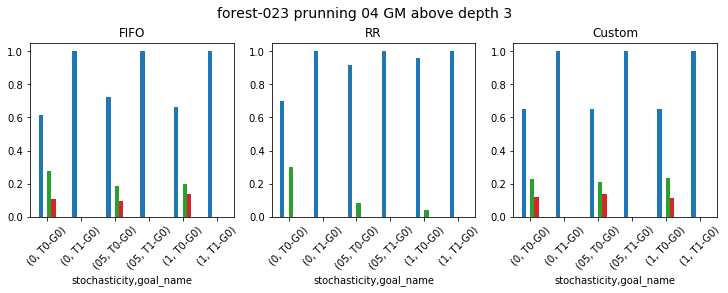

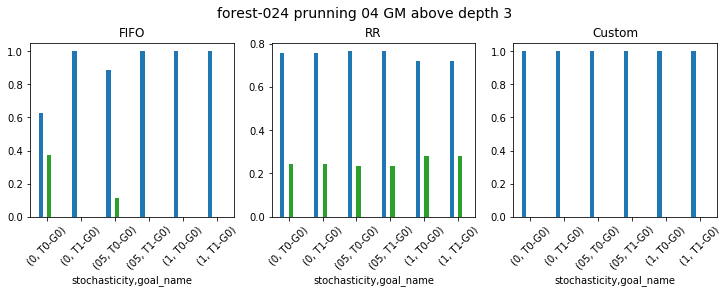

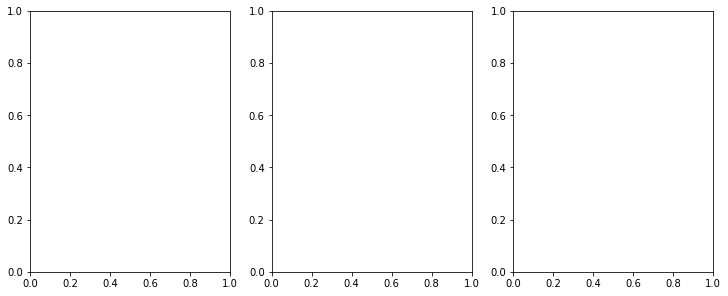

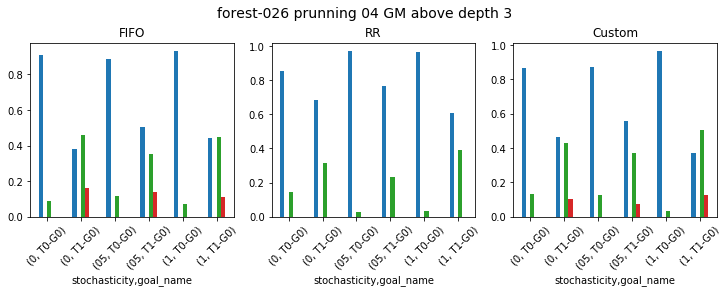

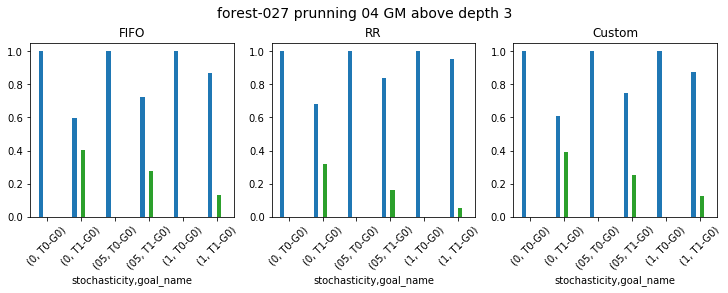

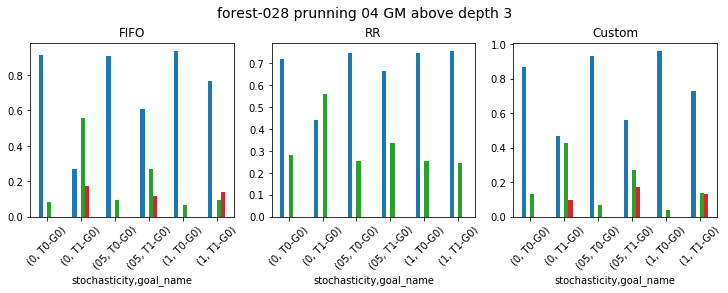

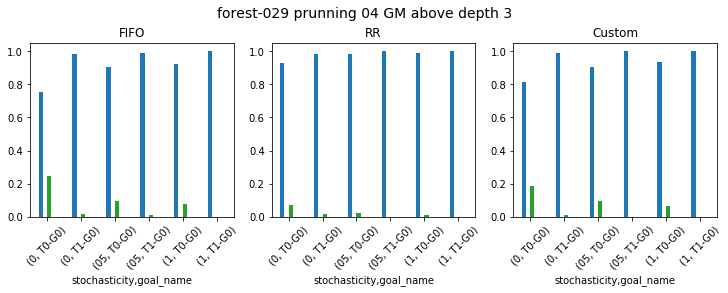

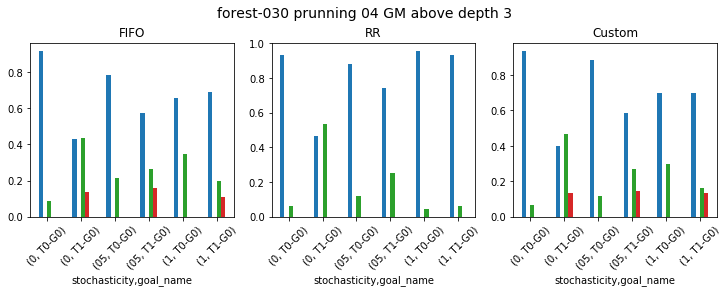

In [ ]:
plot_many(df04above_ff, df04above_rr, df04above_cus, "FIFO", "RR", "Custom", "prunning 04 GM above depth 3")

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


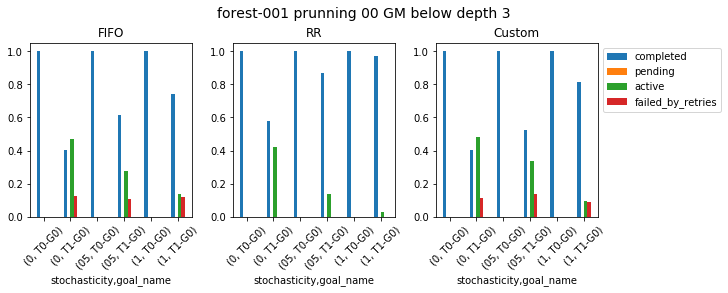

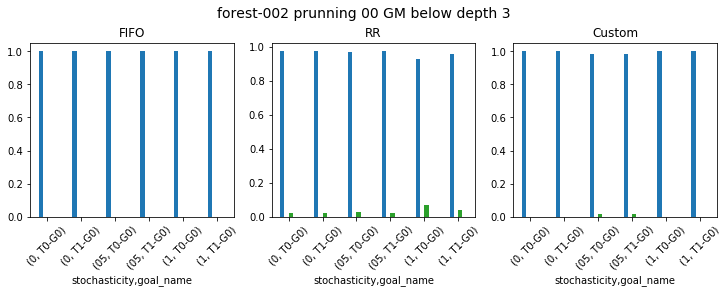

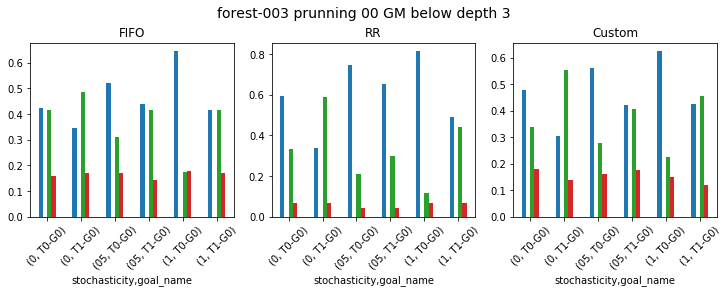

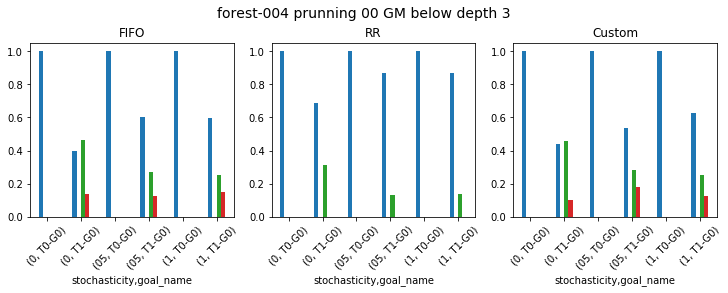

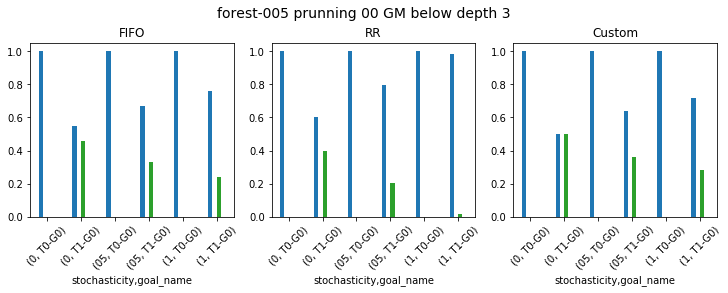

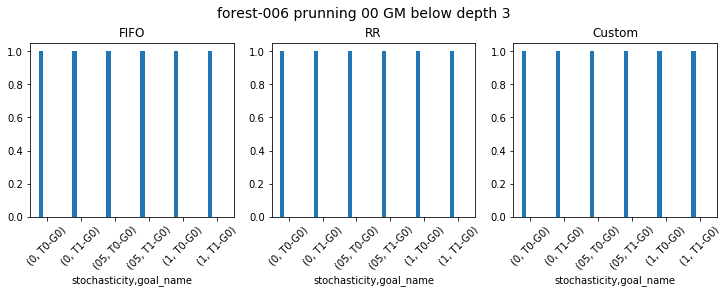

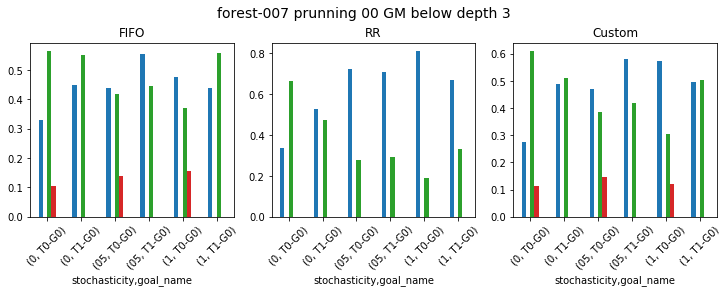

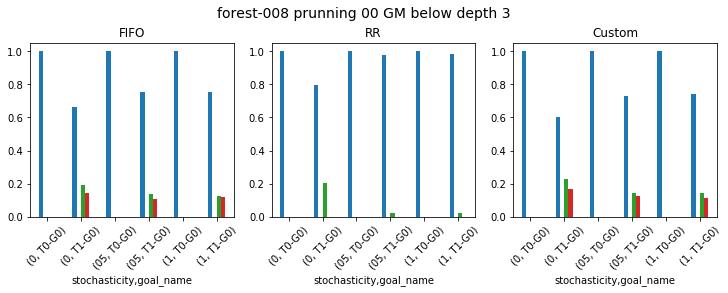

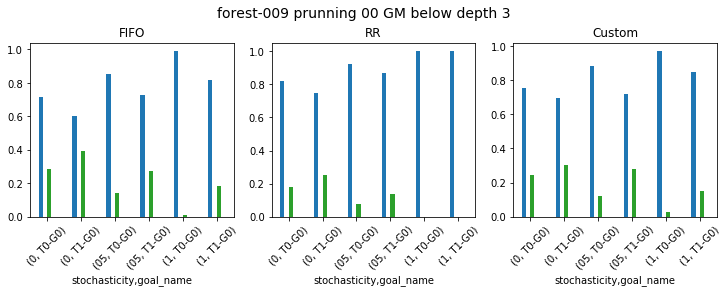

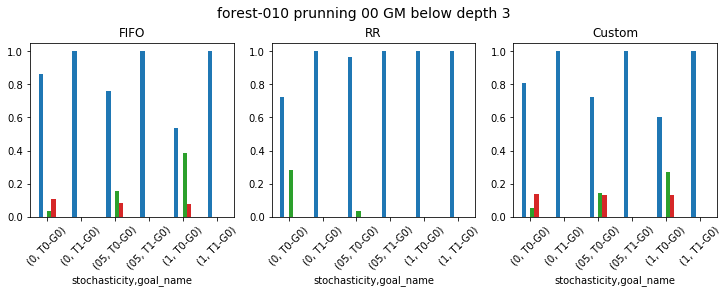

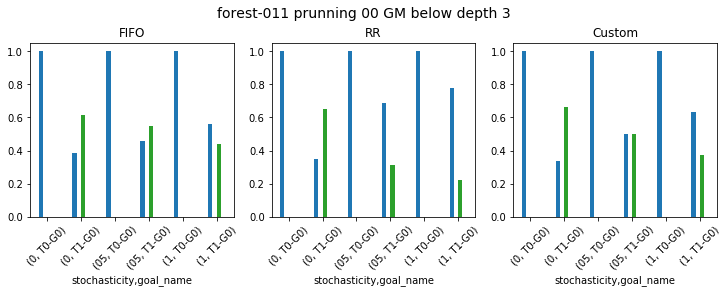

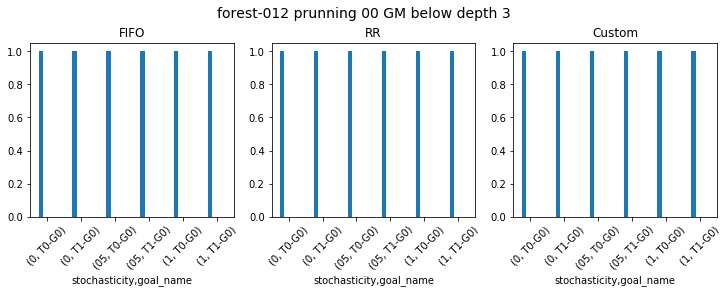

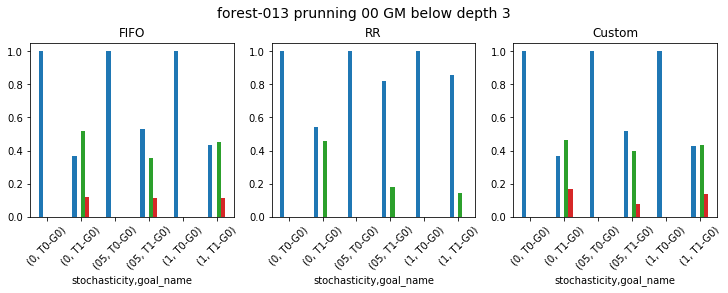

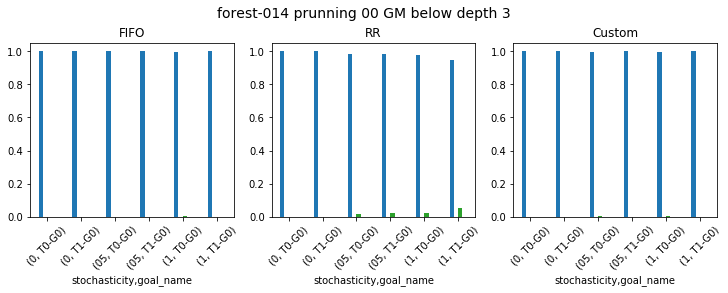

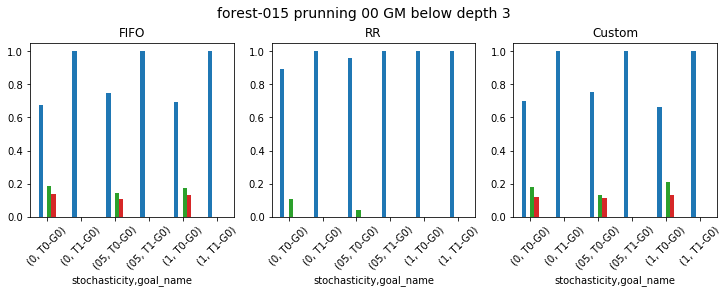

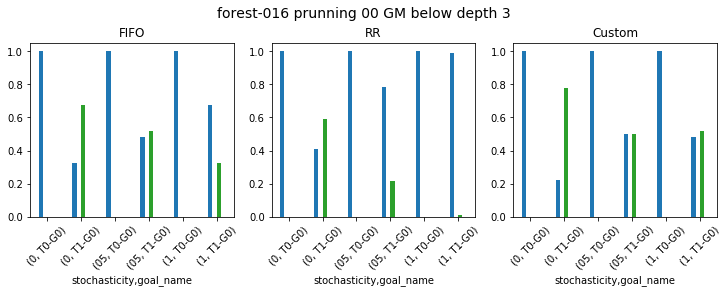

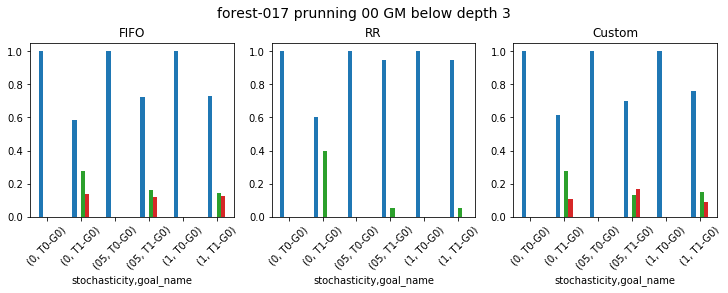

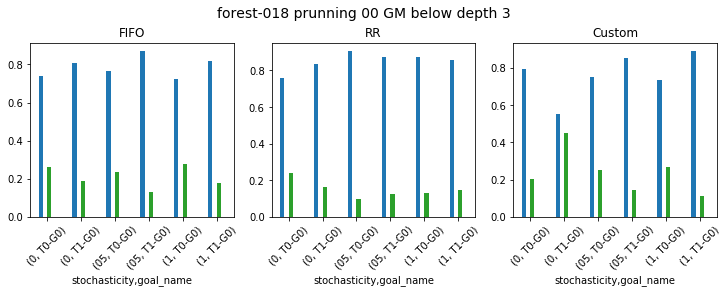

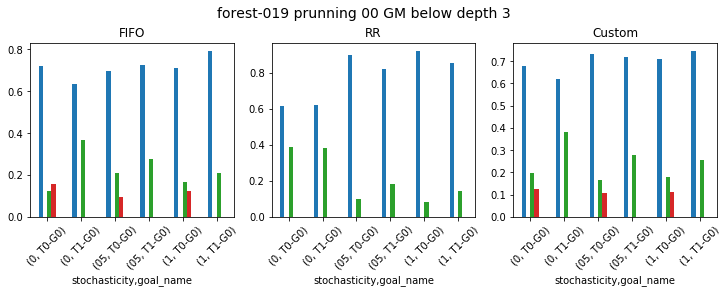

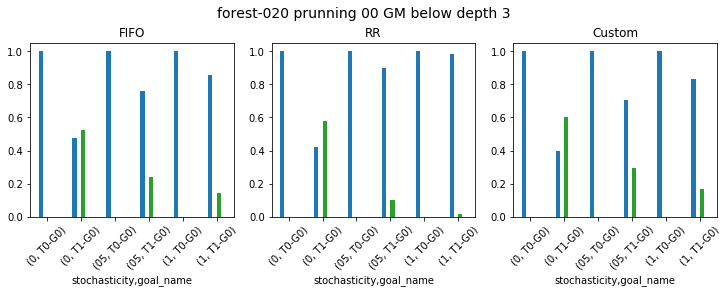

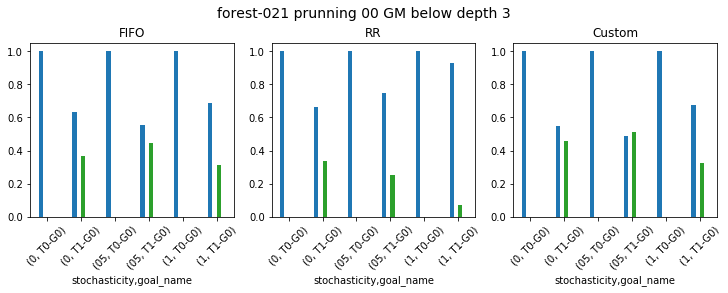

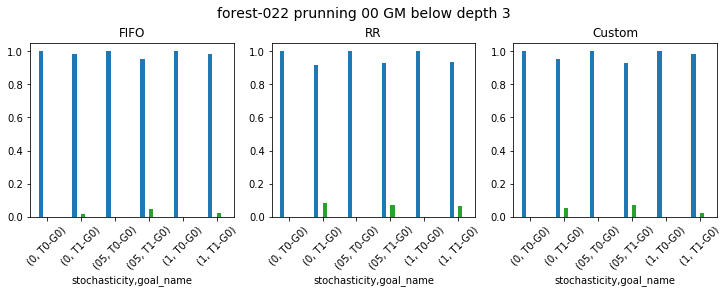

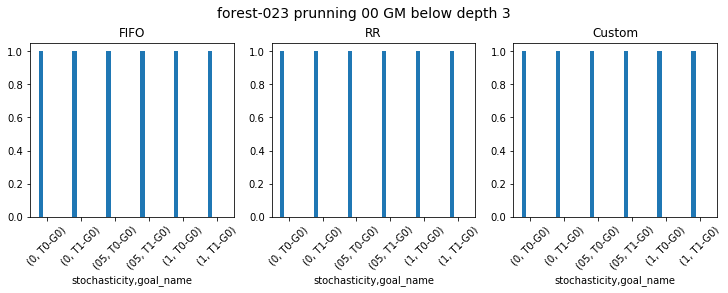

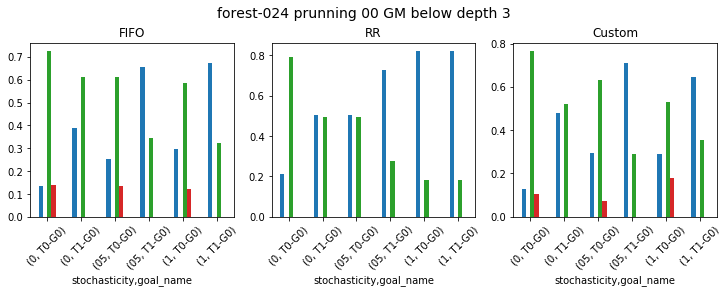

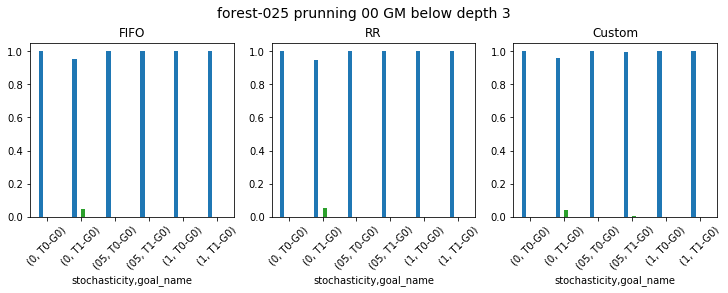

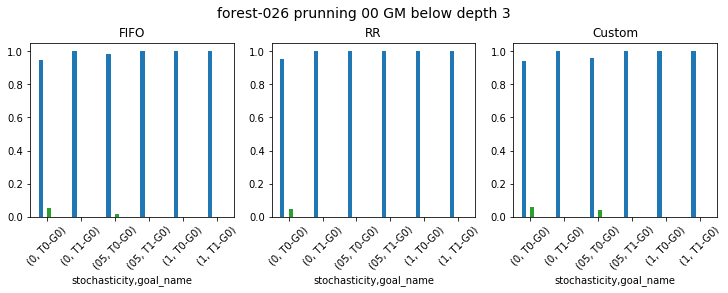

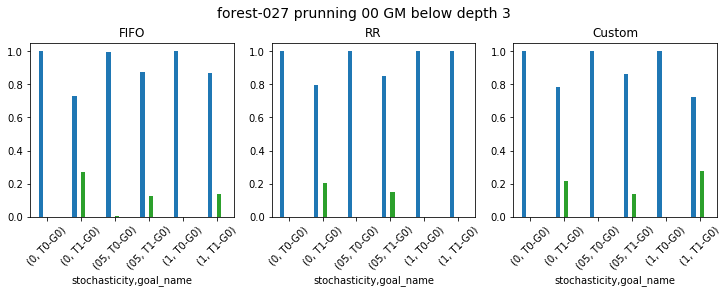

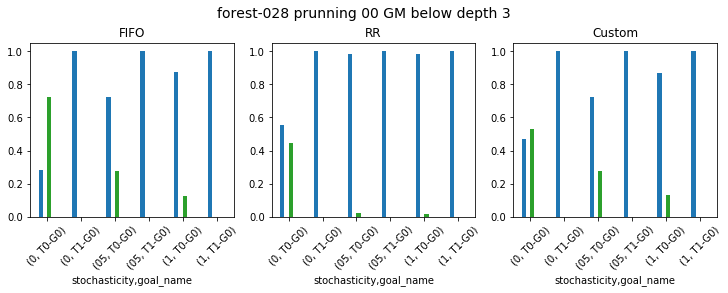

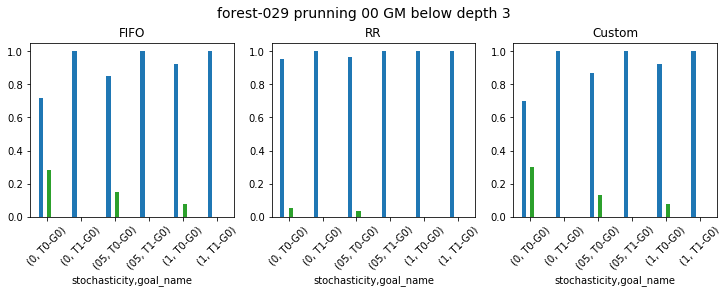

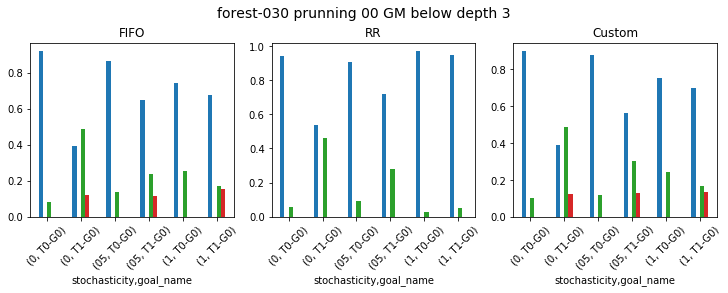

In [ ]:
plot_many(df00bellow_ff, df00bellow_rr, df00bellow_cus, "FIFO", "RR", "Custom", "prunning 00 GM below depth 3")

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


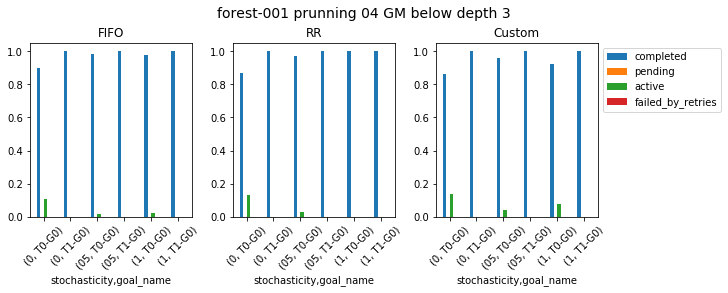

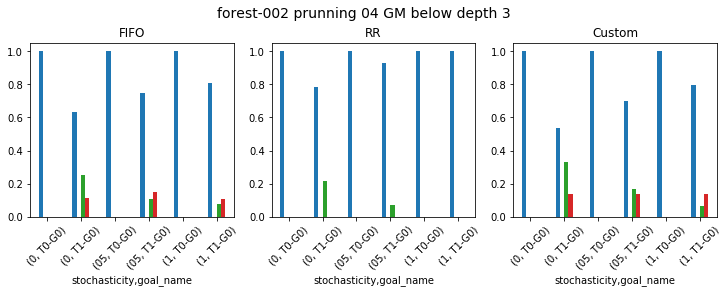

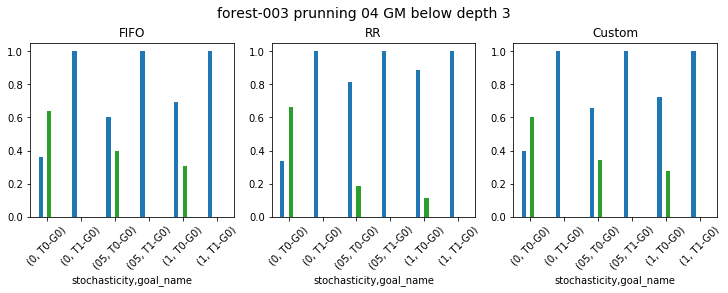

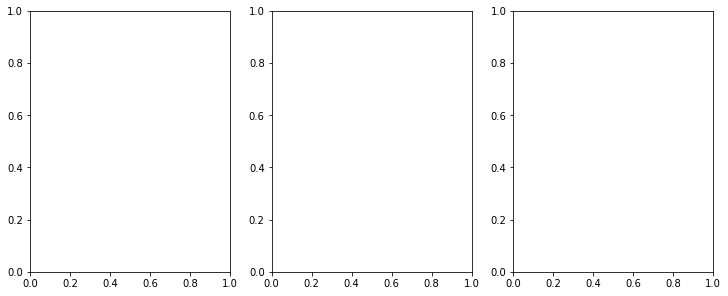

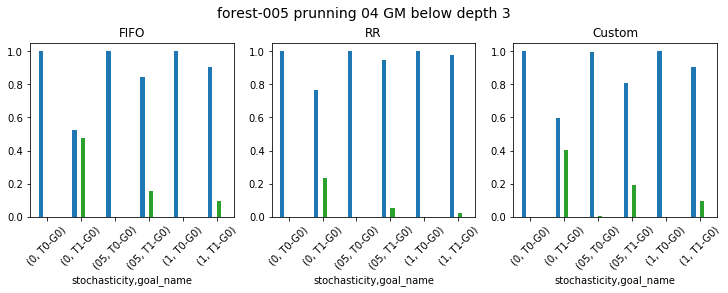

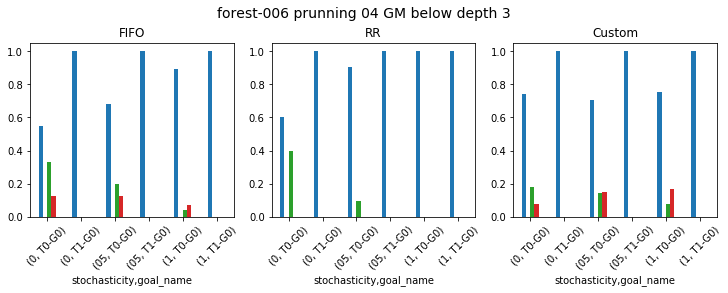

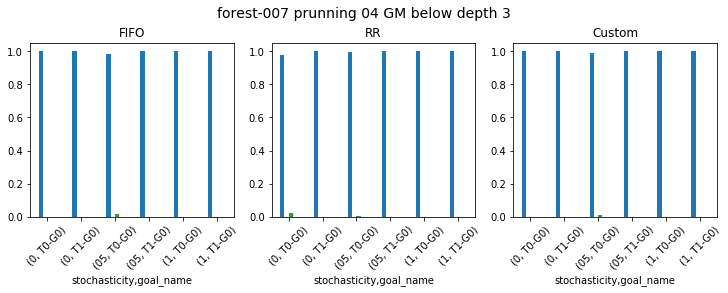

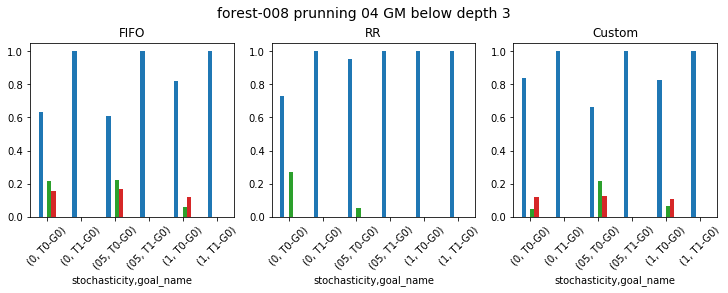

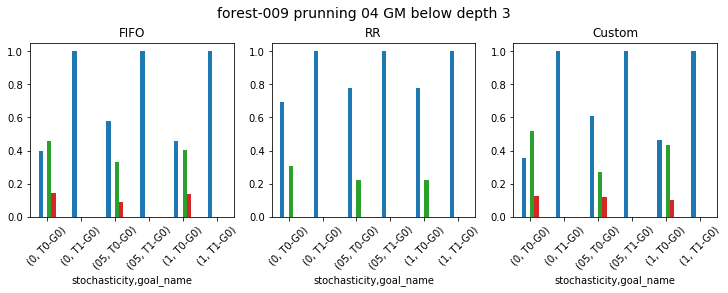

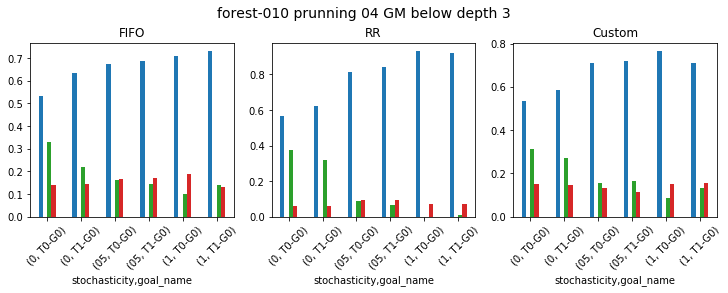

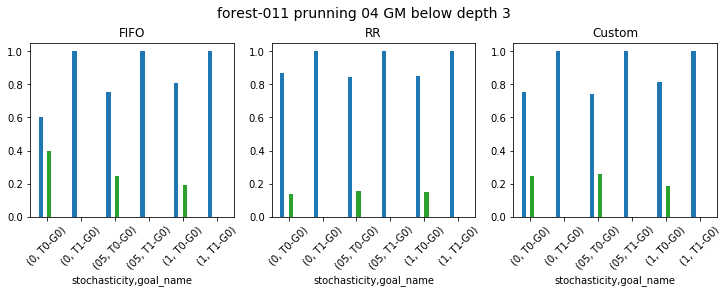

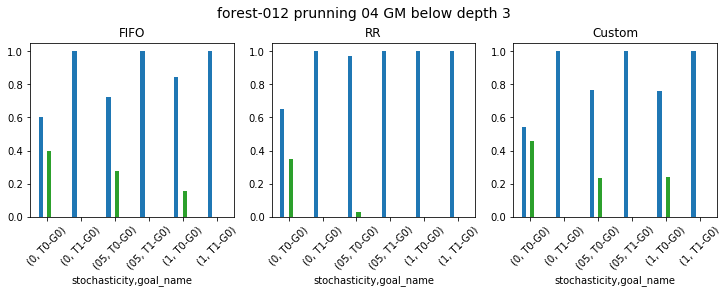

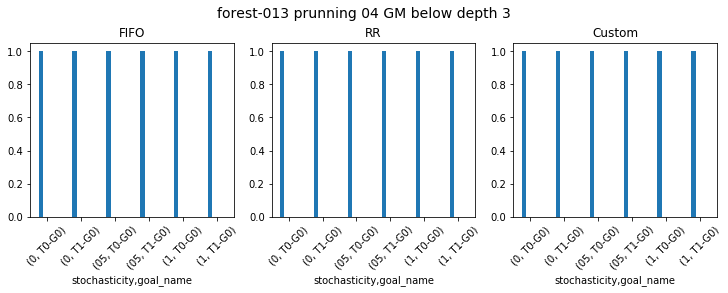

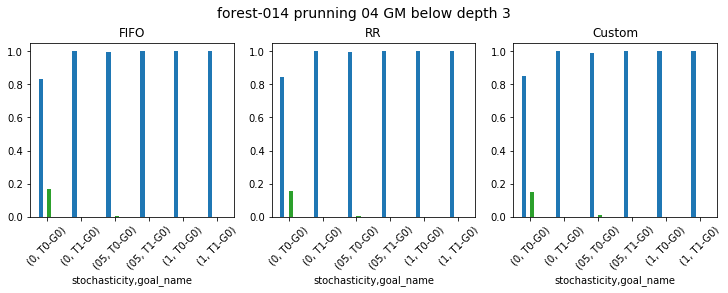

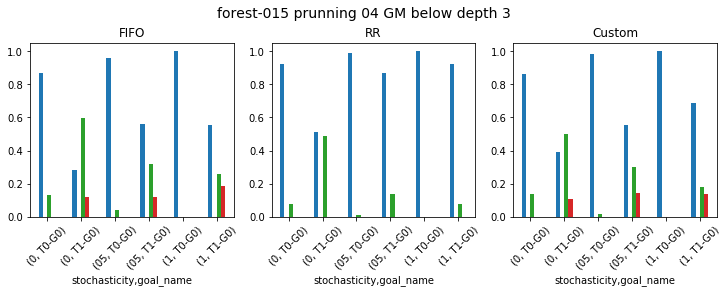

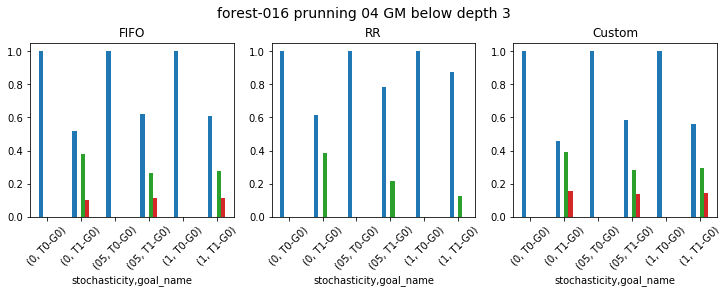

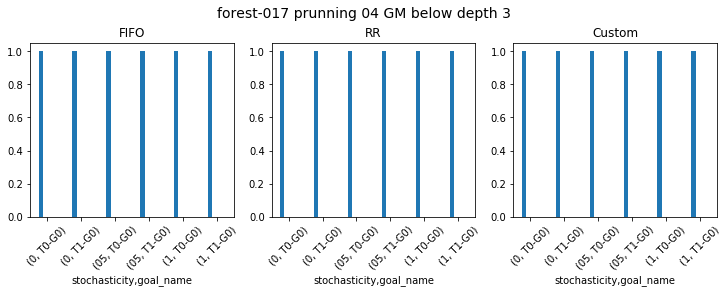

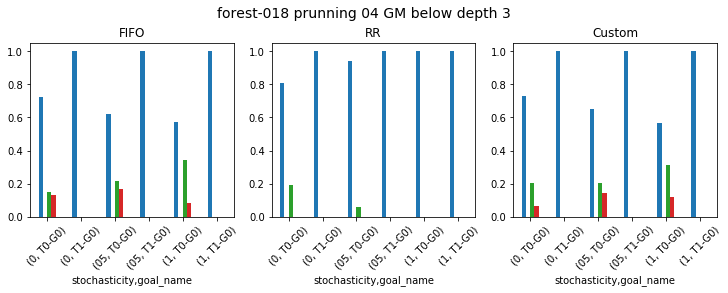

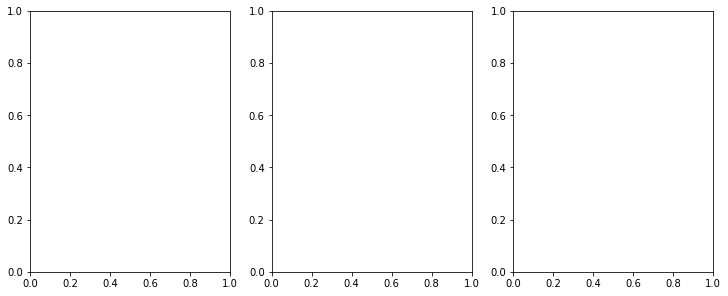

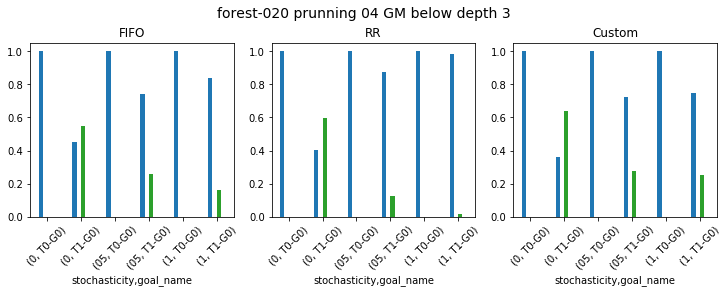

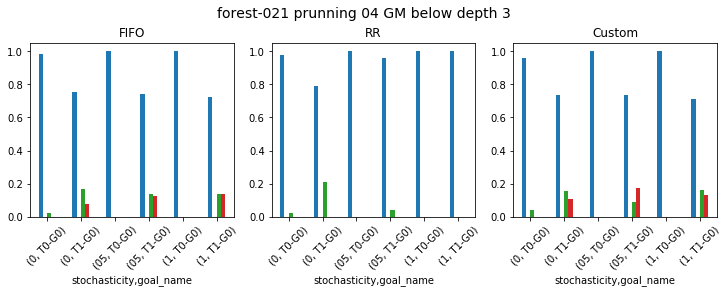

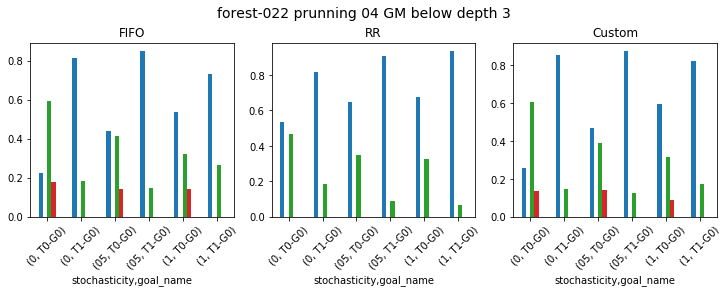

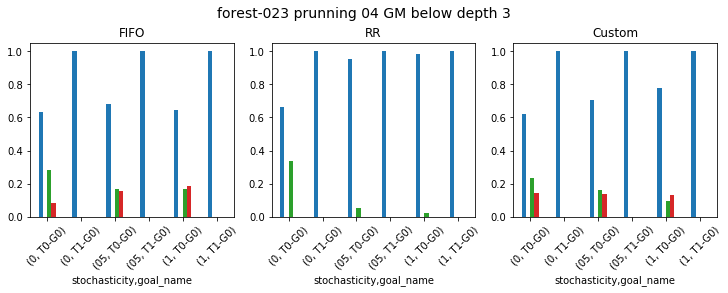

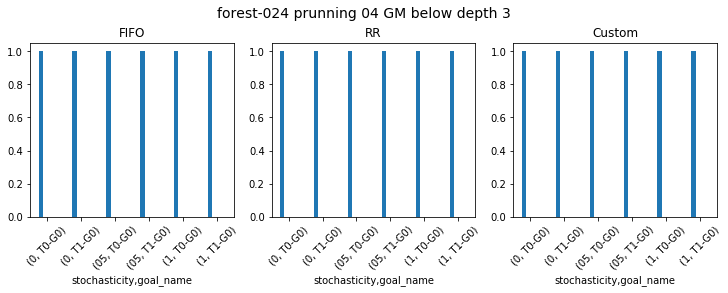

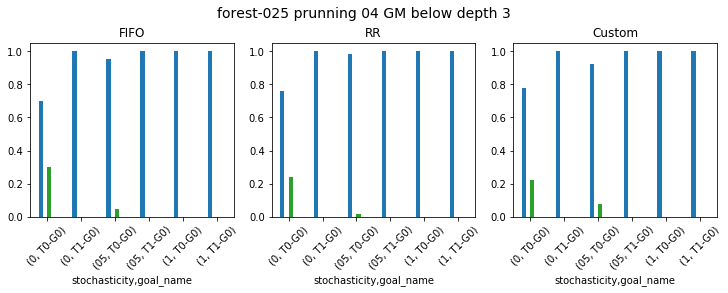

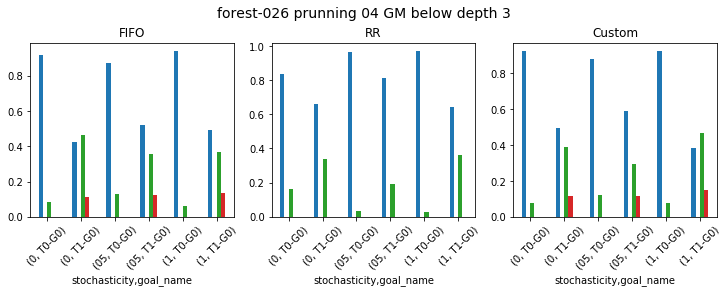

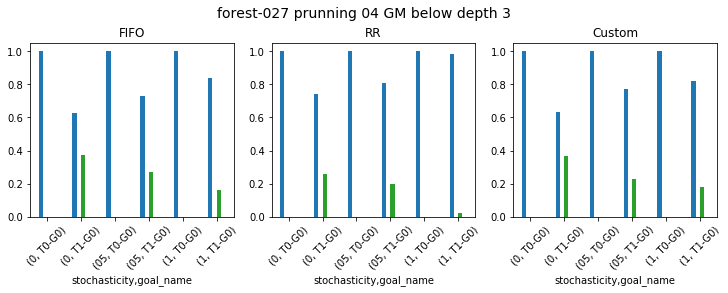

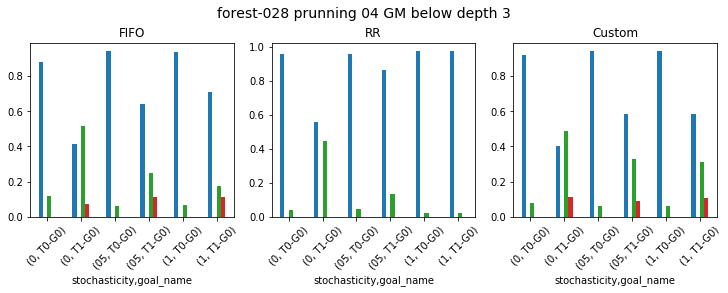

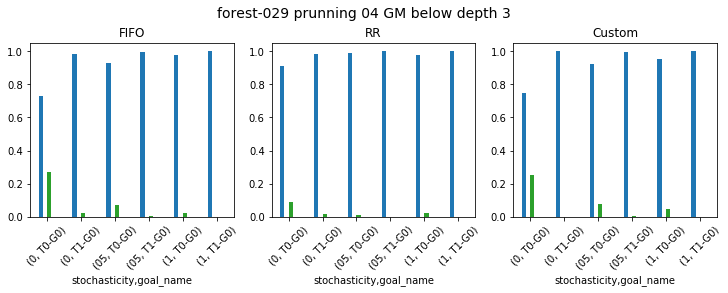

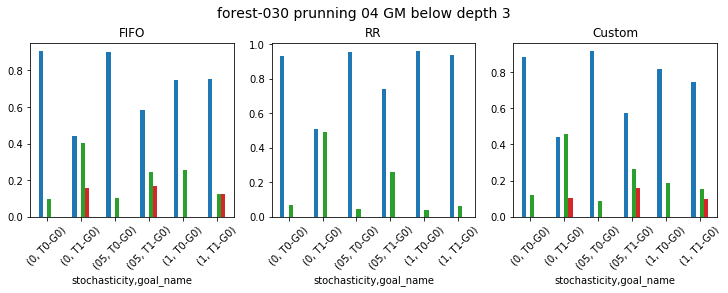

In [ ]:
plot_many(df04bellow_ff, df04bellow_rr, df04bellow_cus, "FIFO", "RR", "Custom", "prunning 04 GM below depth 3")

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


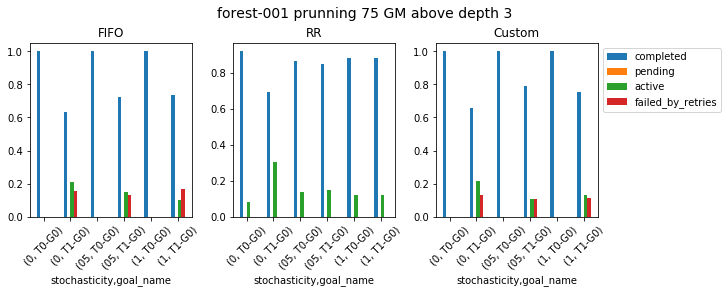

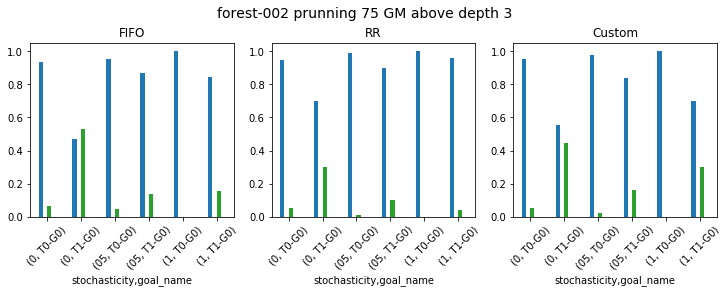

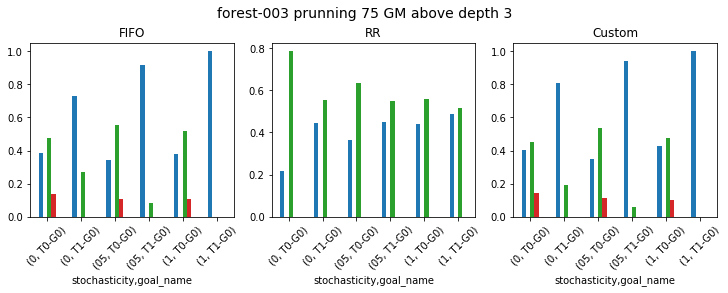

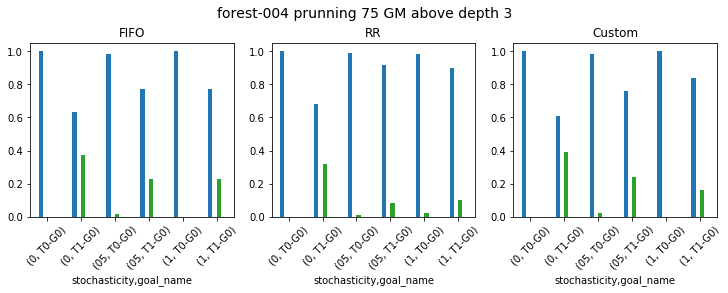

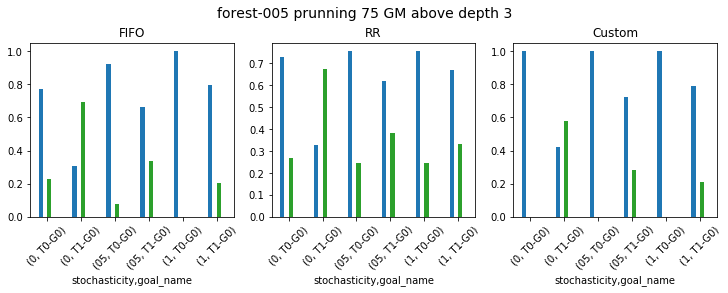

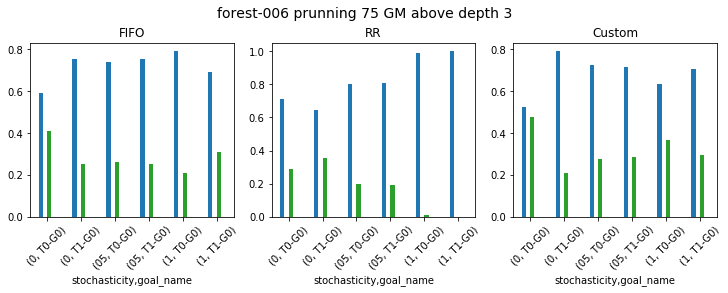

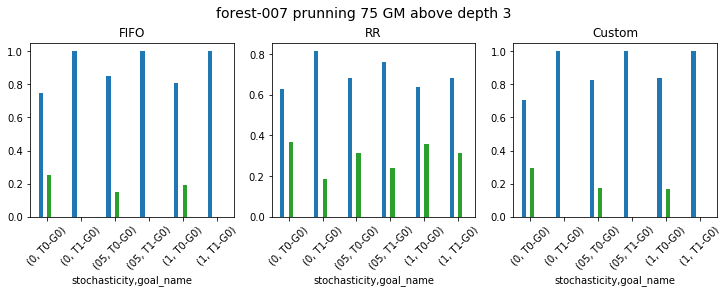

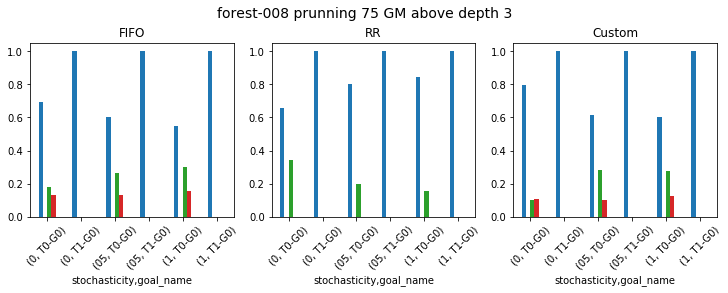

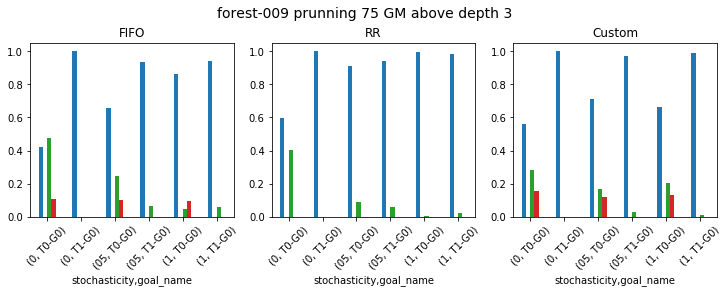

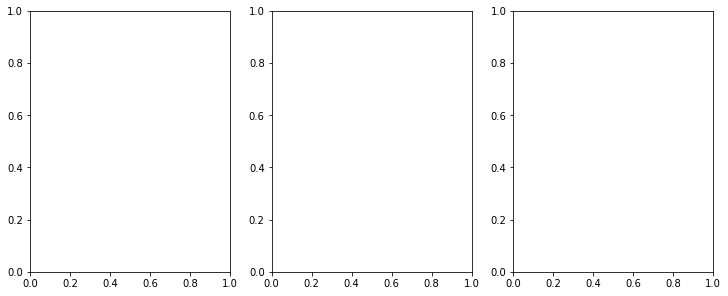

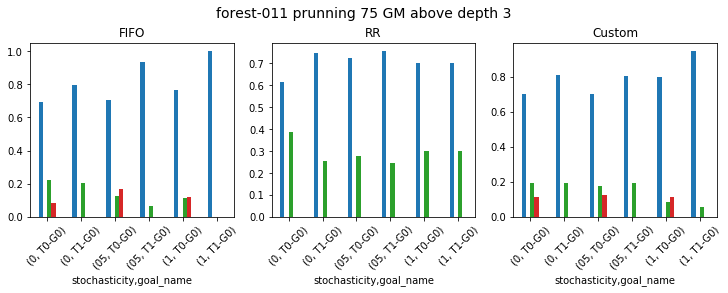

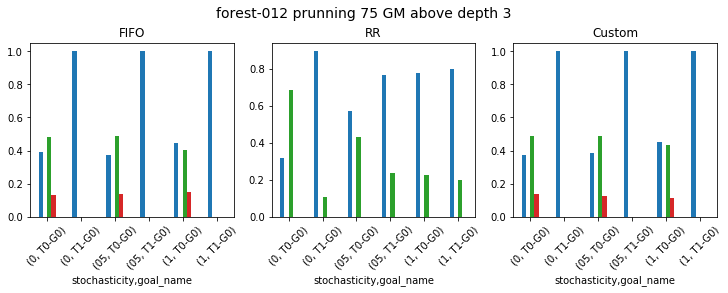

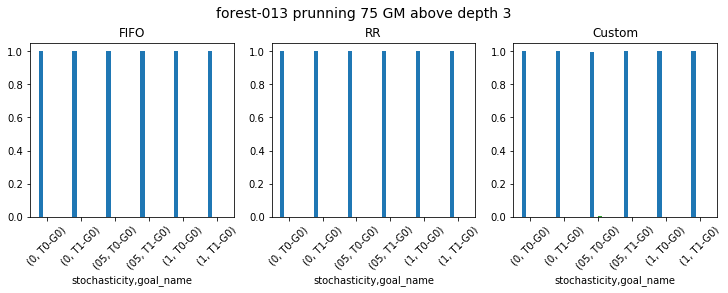

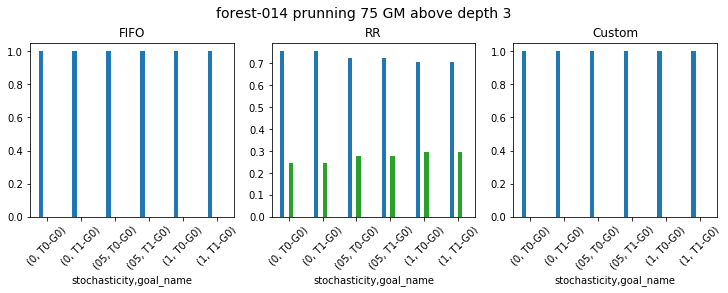

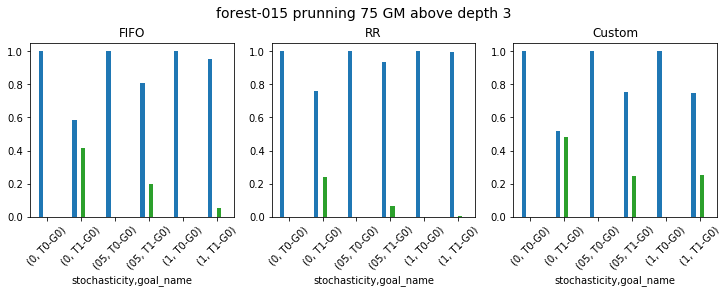

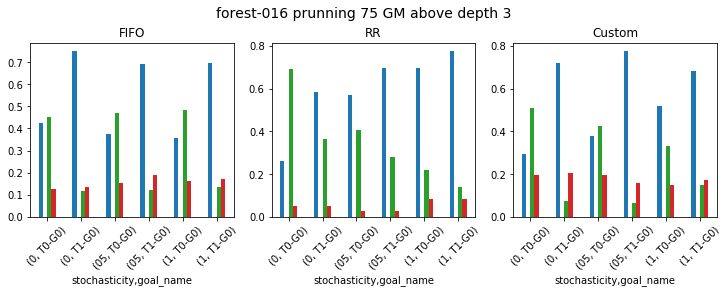

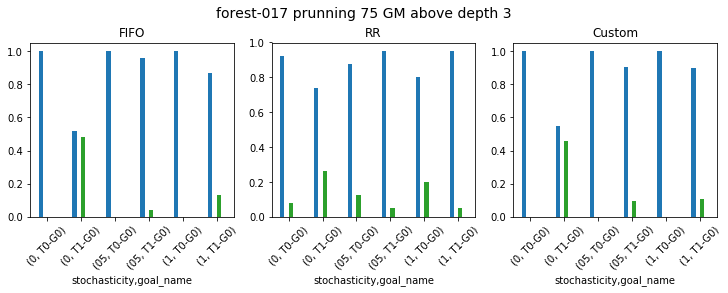

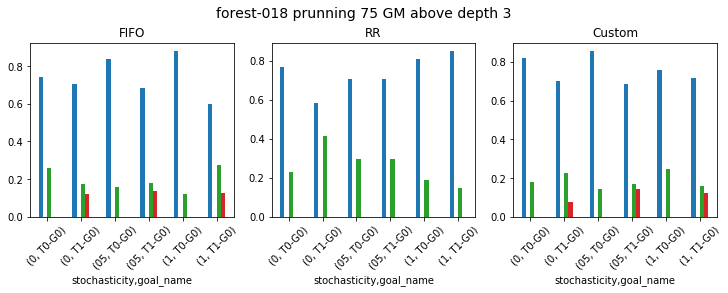

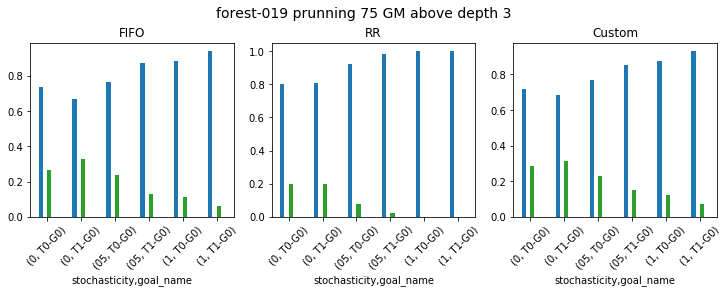

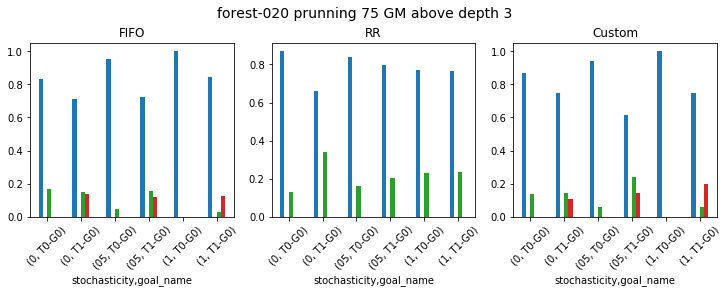

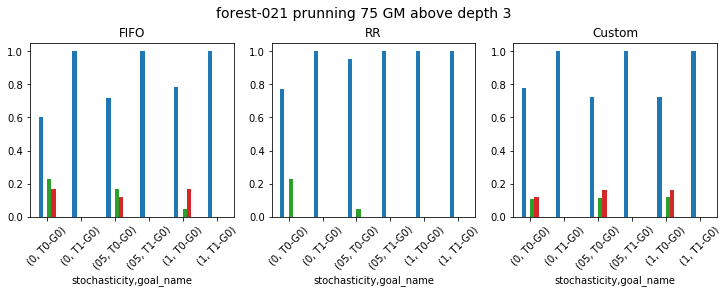

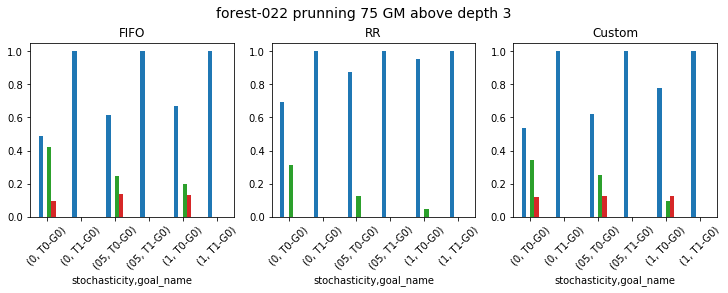

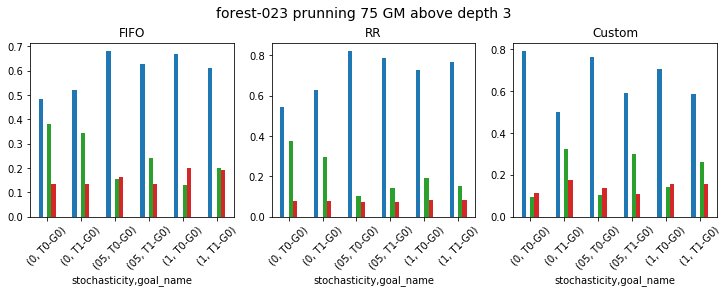

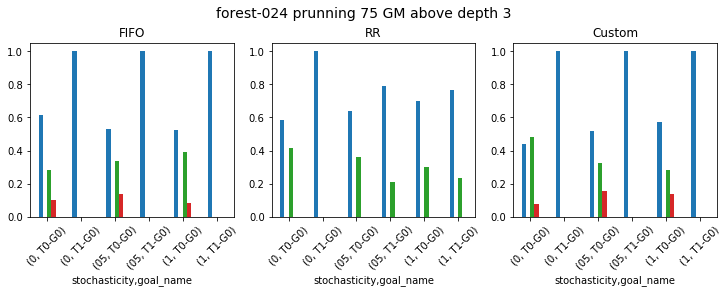

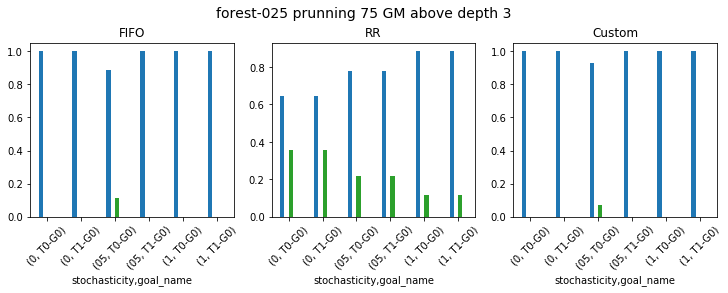

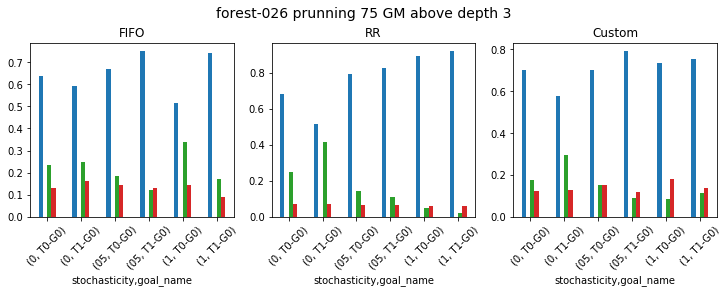

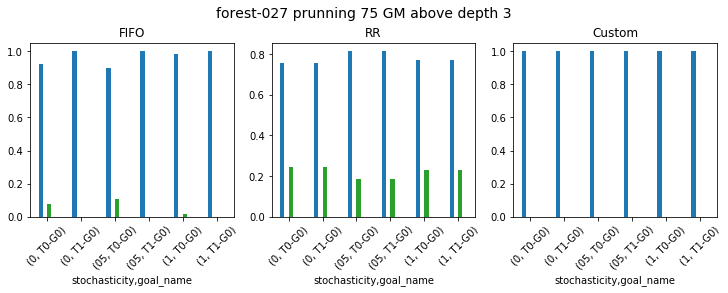

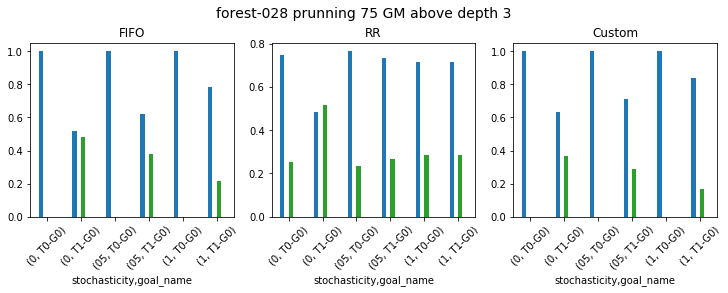

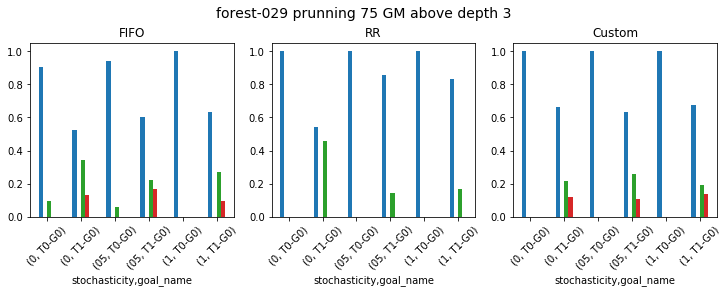

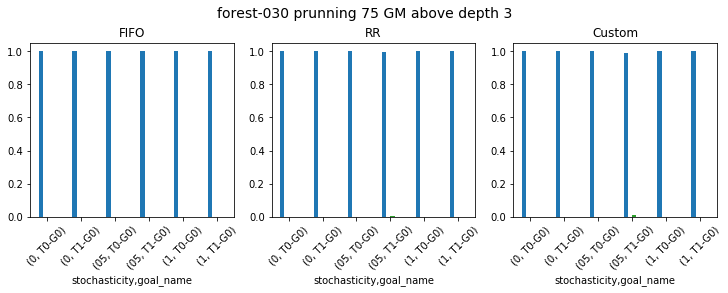

In [ ]:
plot_many(df75above_ff, df75above_rr, df75above_cus, "FIFO", "RR", "Custom", "prunning 75 GM above depth 3")

forest-001 not found
forest-002 not found
forest-003 not found
forest-004 not found
forest-005 not found
forest-006 not found
forest-007 not found
forest-008 not found
forest-009 not found
forest-010 not found
forest-011 not found
forest-012 not found
forest-013 not found
forest-014 not found
forest-015 not found
forest-016 not found
forest-017 not found
forest-018 not found
forest-019 not found
forest-020 not found
forest-021 not found
forest-022 not found
forest-023 not found
forest-024 not found
forest-025 not found
forest-026 not found
forest-027 not found
forest-028 not found
forest-029 not found
forest-030 not found


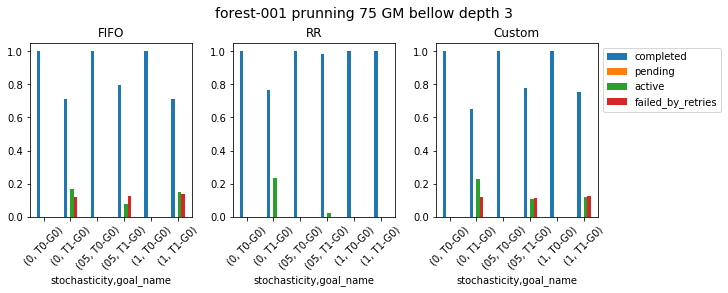

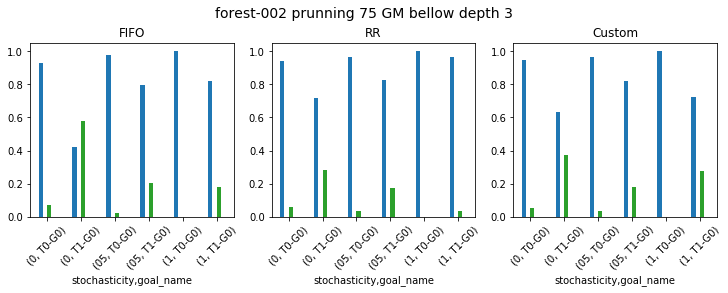

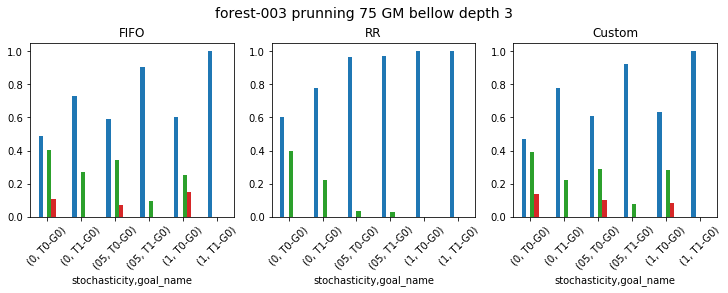

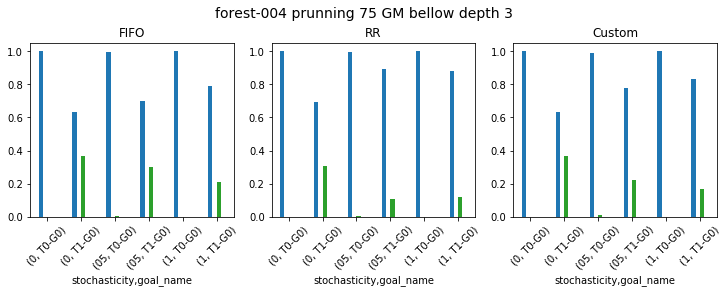

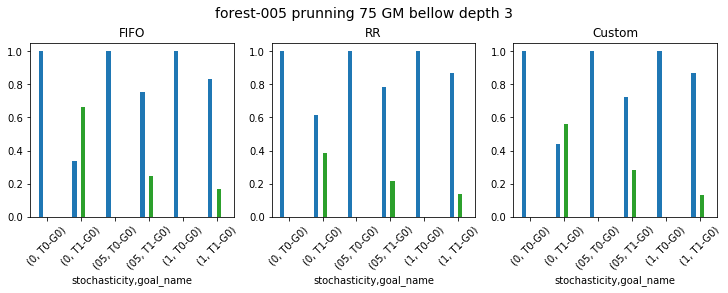

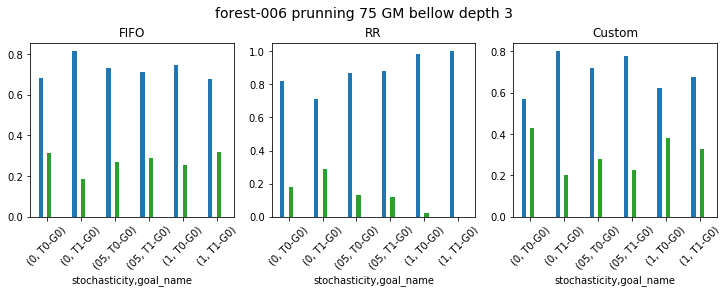

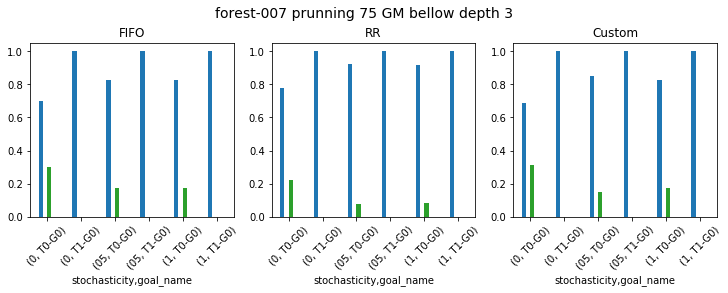

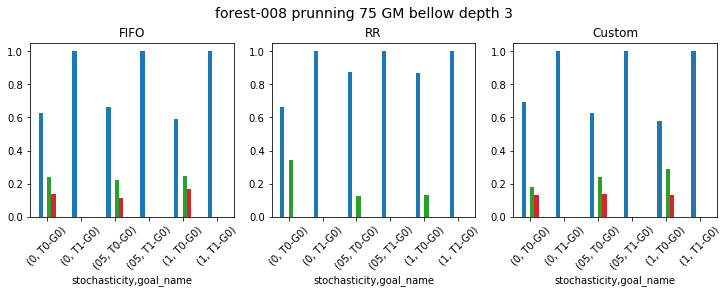

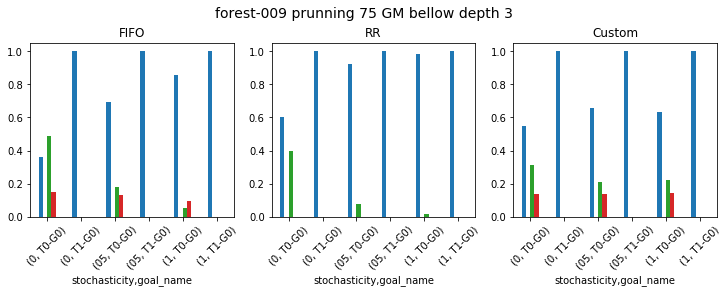

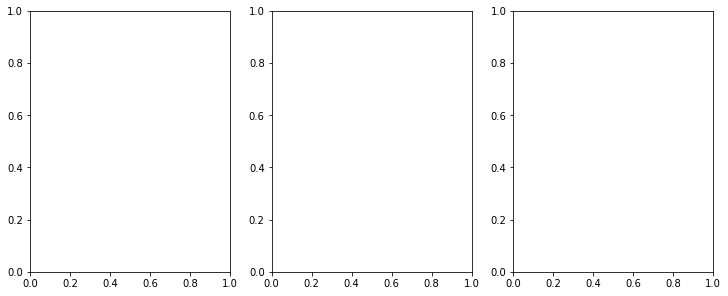

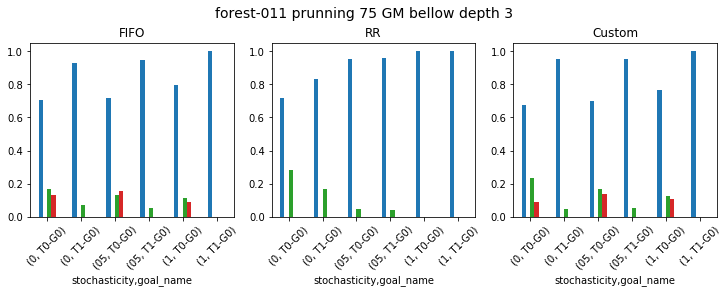

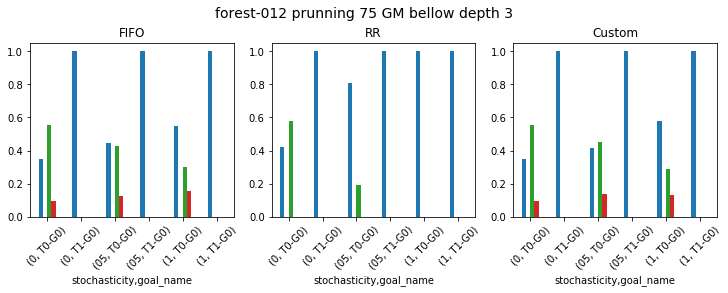

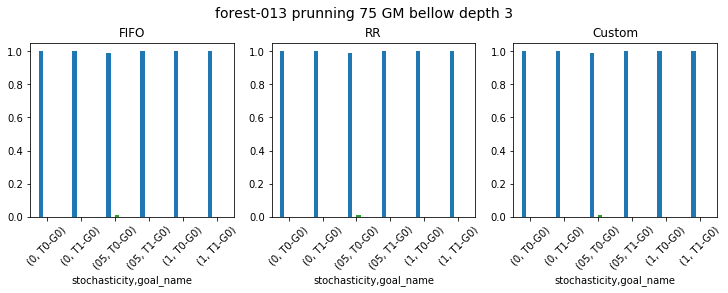

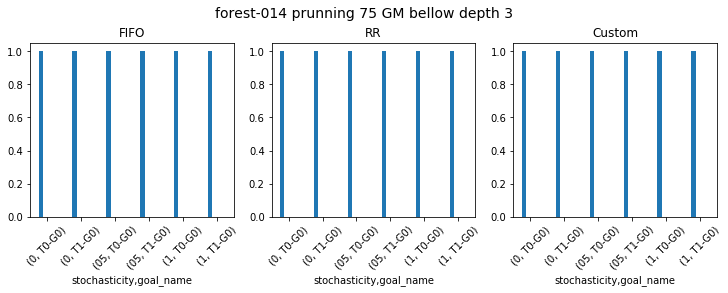

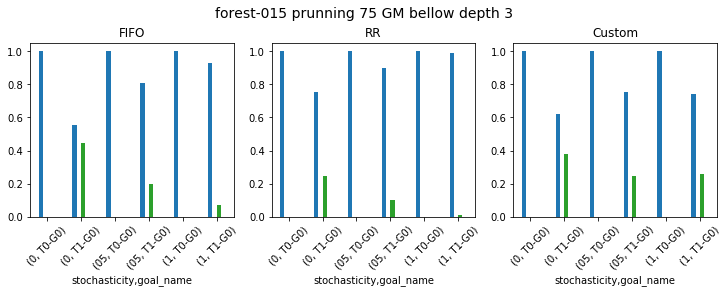

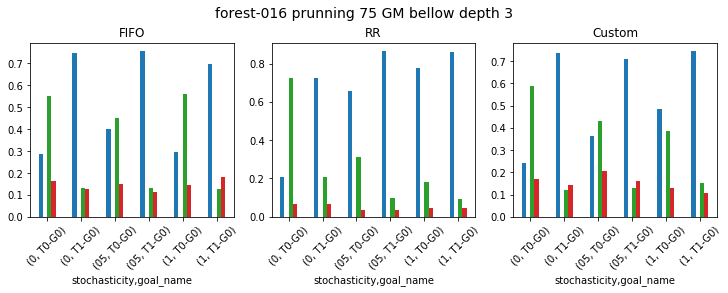

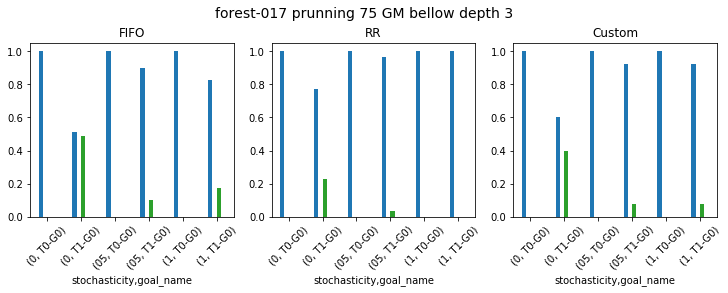

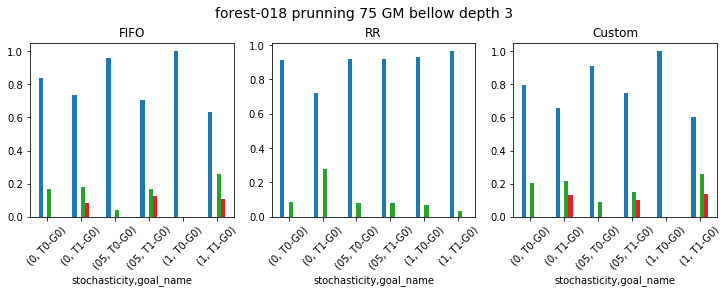

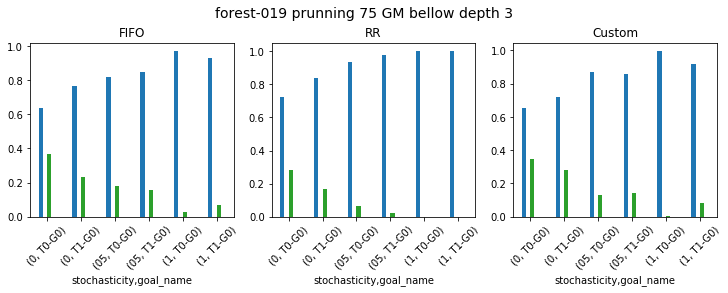

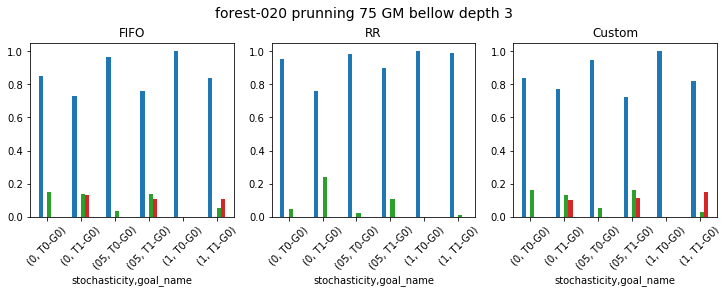

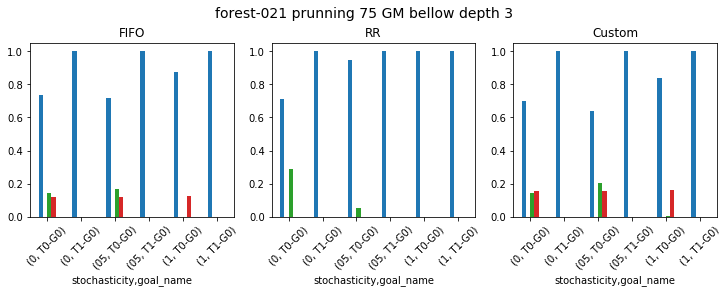

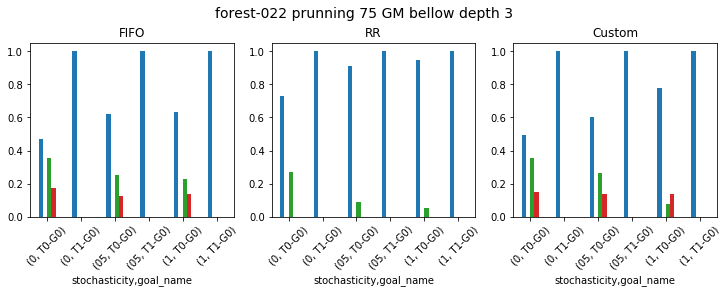

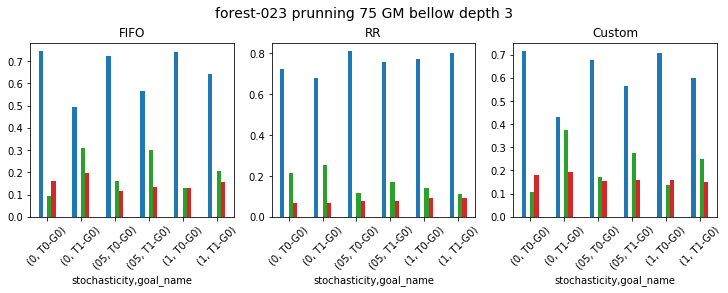

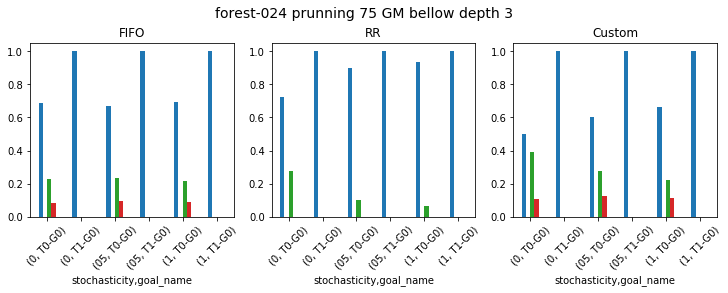

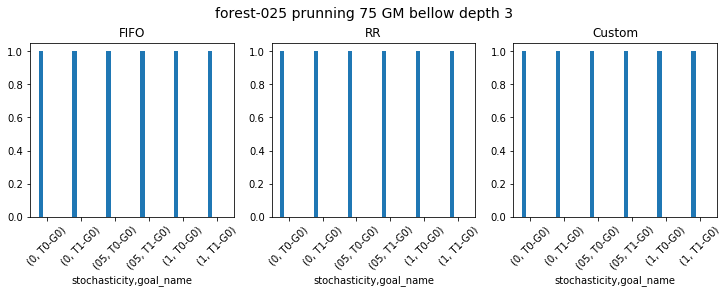

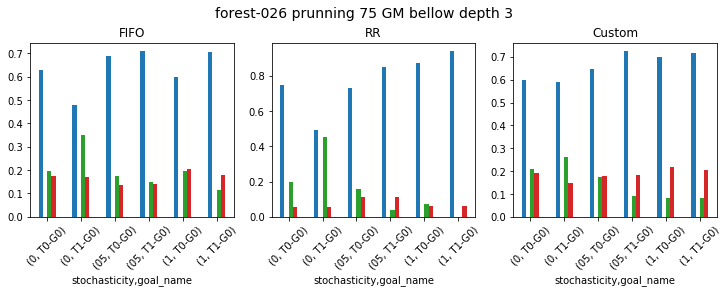

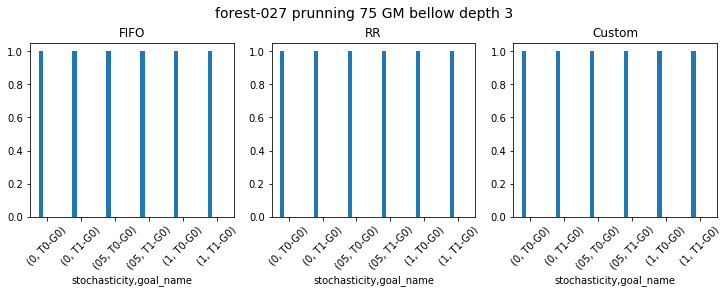

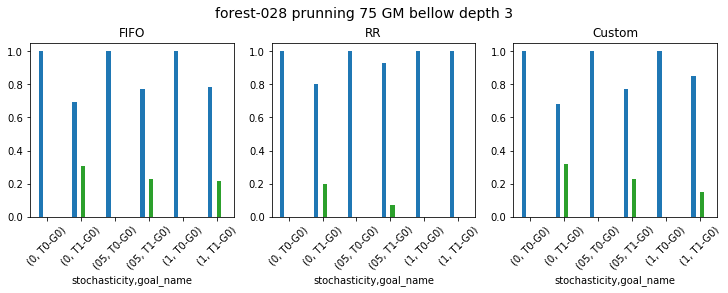

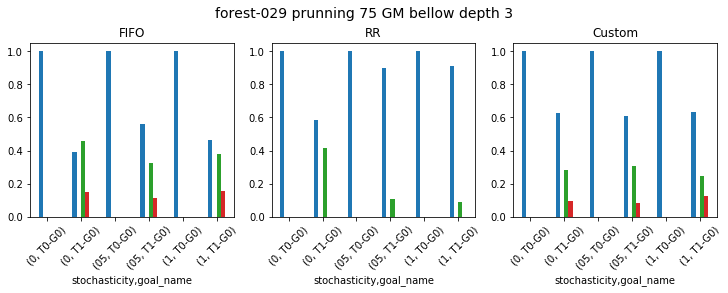

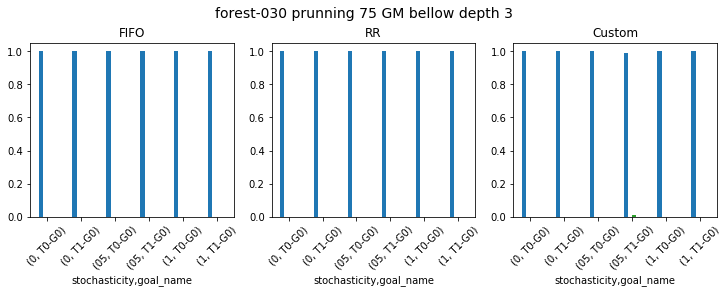

In [ ]:
plot_many(df75bellow_ff, df75bellow_rr, df75bellow_cus, "FIFO", "RR", "Custom", "prunning 75 GM bellow depth 3")

In [ ]:
def plot_all2(df_list, titles, title):
    nrow=1
    ncol=2
    fig, axes = plt.subplots(nrow, ncol)
    fig.suptitle(title, fontsize=16)


    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
            
#             print(titles[count])
            
            ax = df.astype(float).plot(ax=axes[r,c], kind='box', title=titles[count] , figsize=(12,8))
            for p in ax.patches:
                ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

            plt.sca(axes[r,c])
            plt.xticks(np.arange(1, 5), ("C", "P", "A", "R"))

            count = count + 1
    
#     plt.title(title, x= -0.7, y = 2.4)
    plt.show()

In [ ]:
def plot_many3(df0, df1, df2, title0, title1, title2, loc, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_copy = df0_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
            df1_copy = df1_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
            df2_copy = df2_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
            
            df0_new = get_proportion_df(df0_copy)
            df1_new = get_proportion_df(df1_copy)
            df2_new = get_proportion_df(df2_copy)
            
#             if(tree_loc[i][loc] == 0):
#                 df0_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df0_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
        
#                 df1_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df1_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
                
#                 df2_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df2_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
#             else:
#                 df0_new["goal_name"].replace('T1-G0', 'T1-G0, has GM', inplace=True)
#                 df0_new["goal_name"].replace('T0-G0', 'T0-G0, no GM', inplace=True)
                
#                 df1_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
#                 df1_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                
#                 df2_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
#                 df2_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df2['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))
            
            df0_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[0])
            df1_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[1])
            df2_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[2])

            axs[1].set_title(title1)
            axs[0].set_title(title0)
            axs[2].set_title(title2)
            axs[0].get_legend().remove()
            axs[1].get_legend().remove()
            
            if(i == 1):
                axs[2].legend(bbox_to_anchor=(1, 1))
            else:
                axs[2].get_legend().remove()
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
            fig.suptitle((file_name + " " + category), fontsize=14)
            
            plt.show()
        except Exception as e:
            print(e)
            print(file_name + " not found")

        

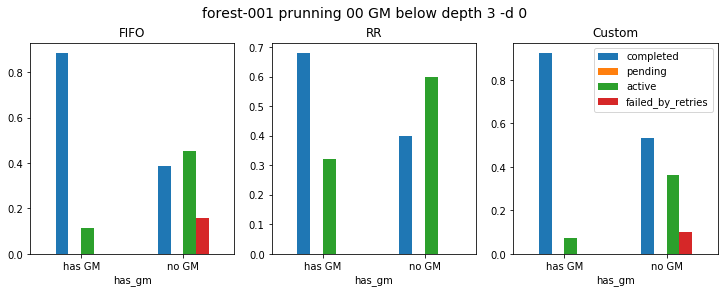

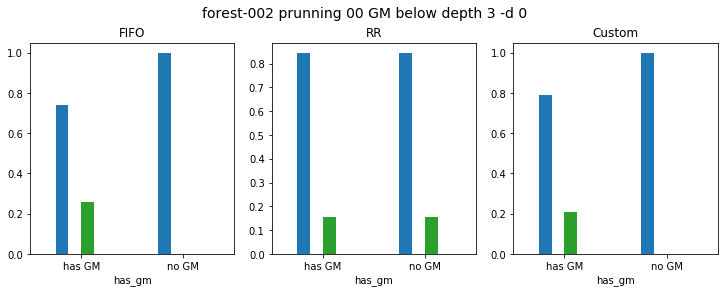

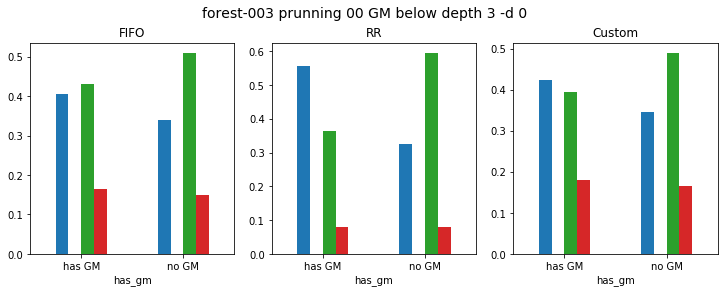

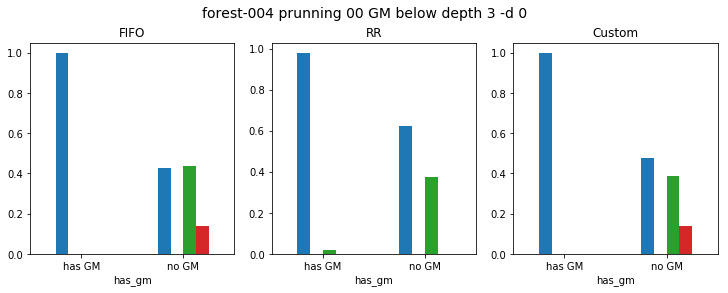

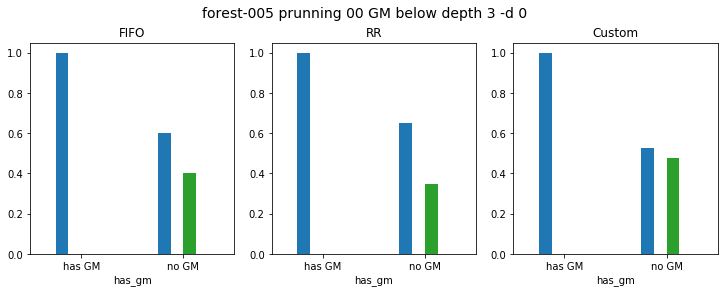

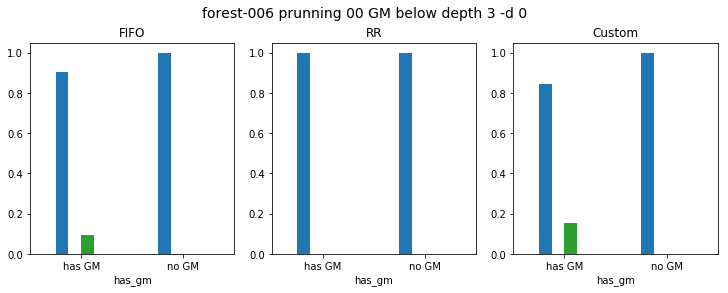

Empty 'DataFrame': no numeric data to plot
forest-007 not found


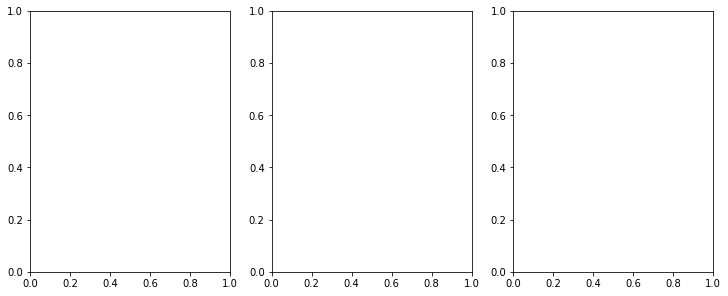

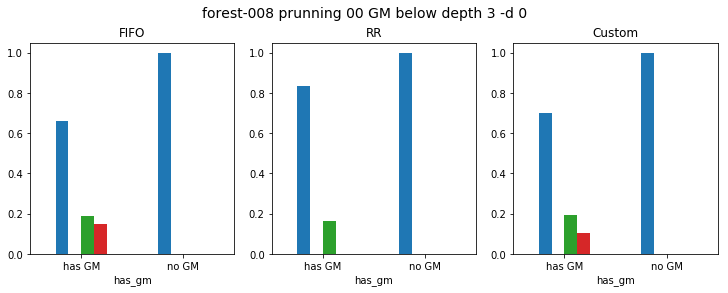

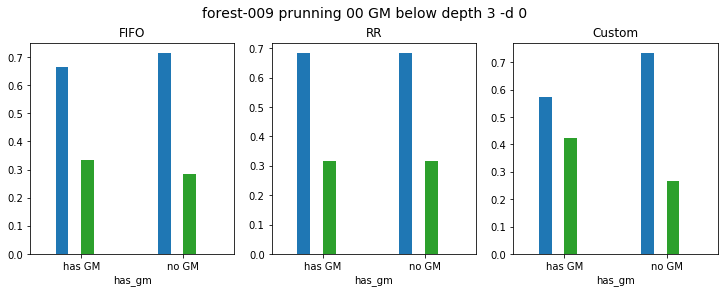

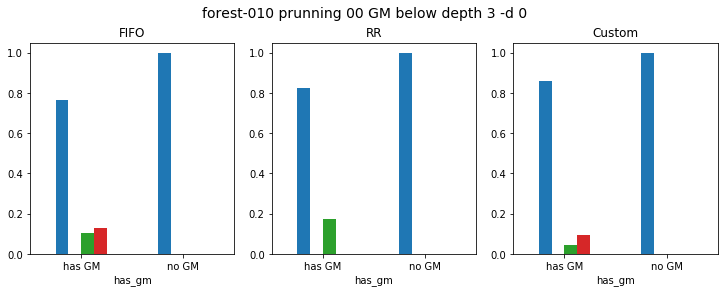

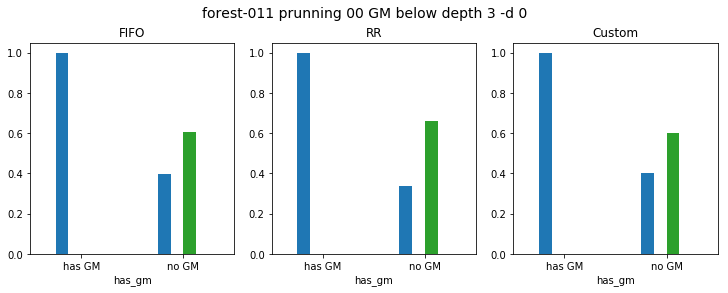

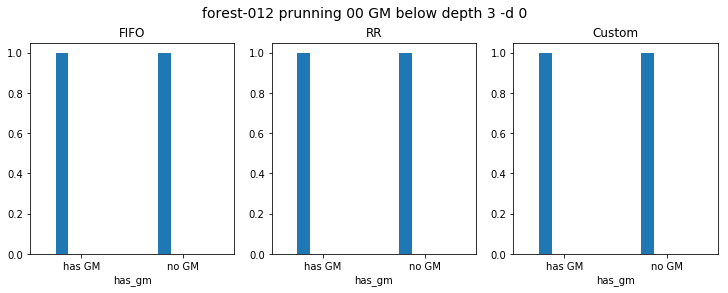

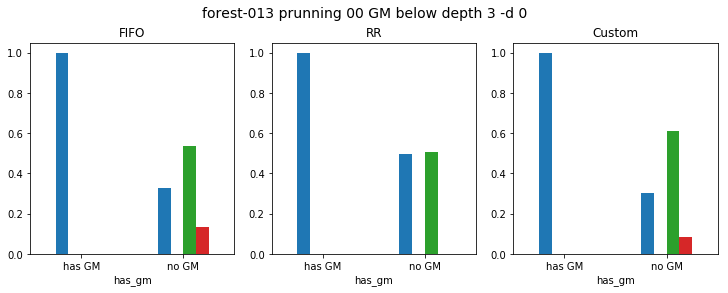

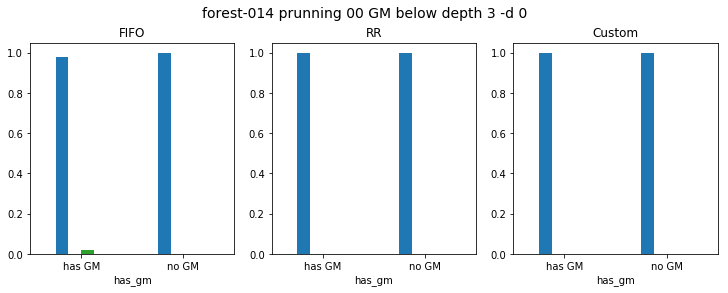

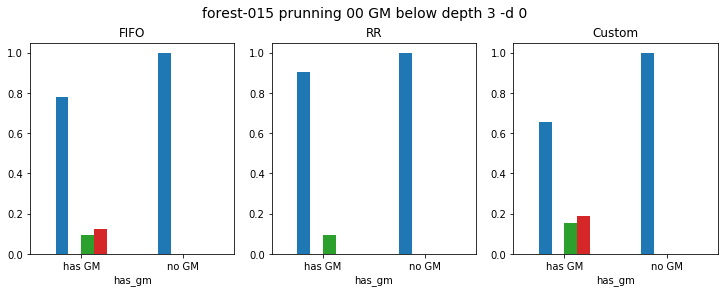

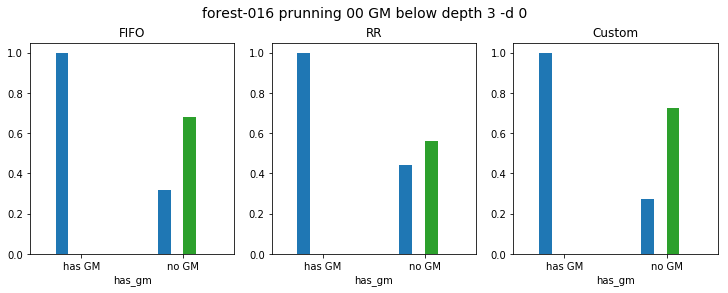

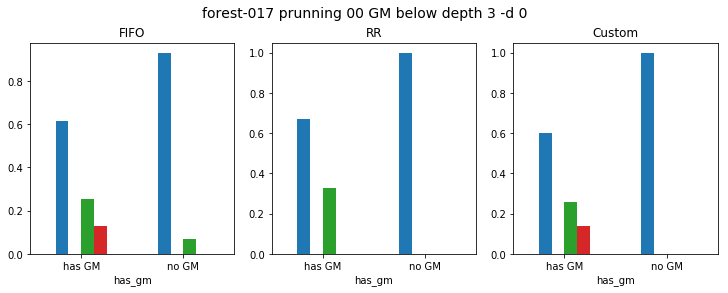

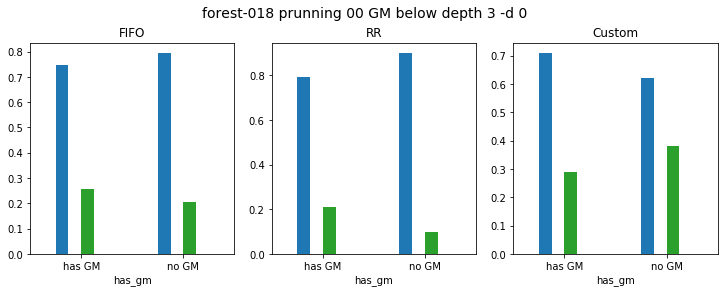

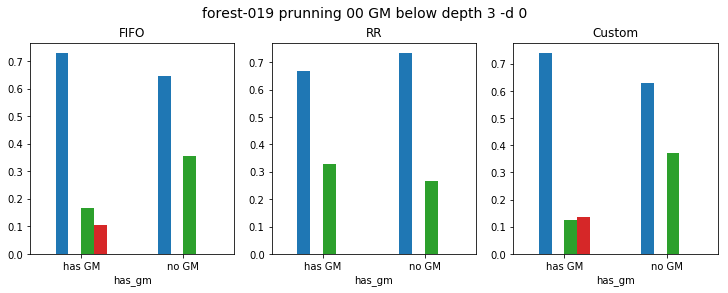

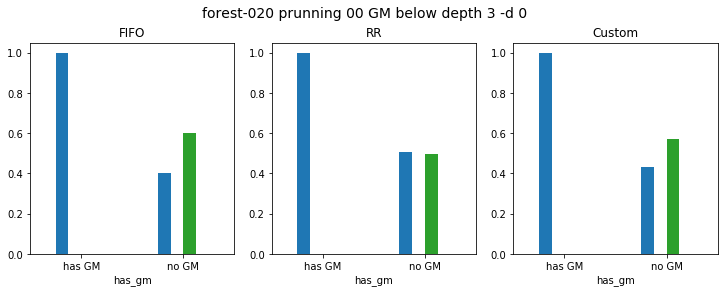

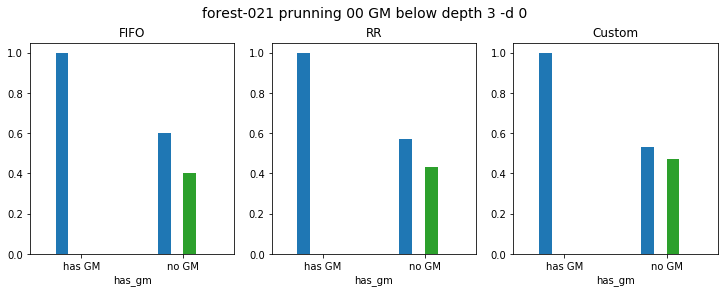

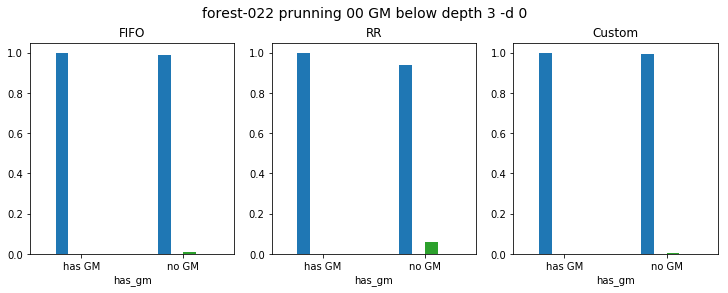

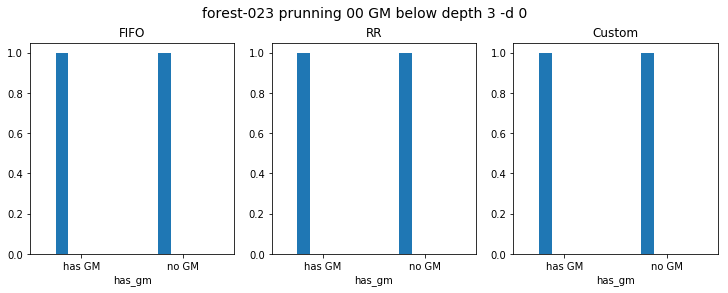

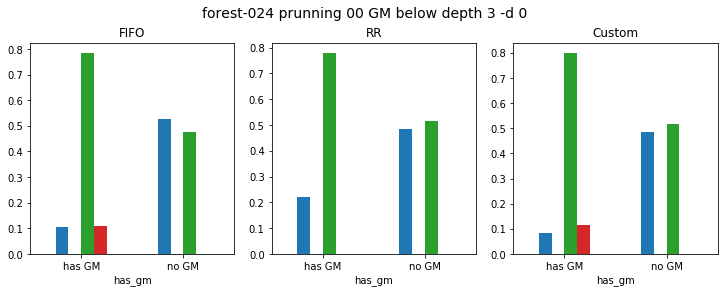

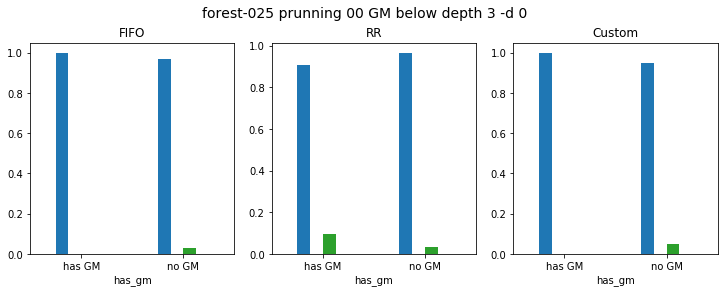

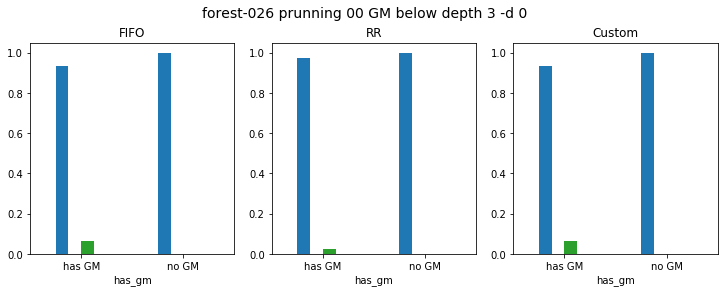

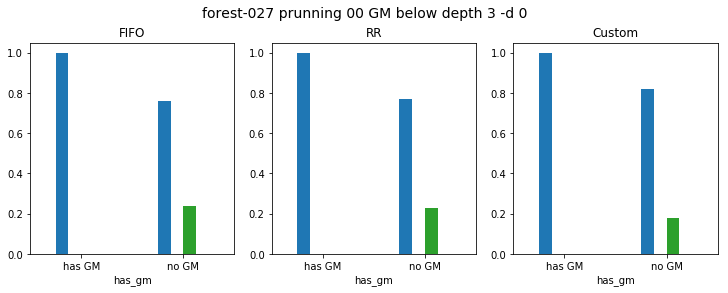

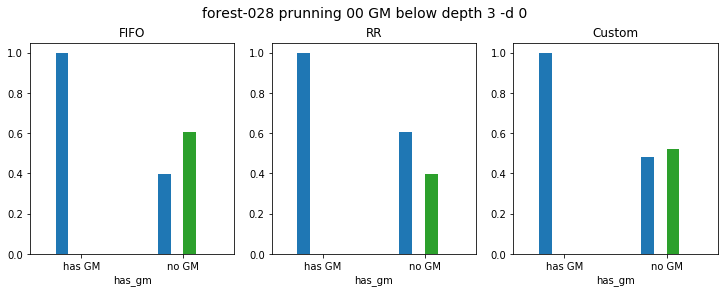

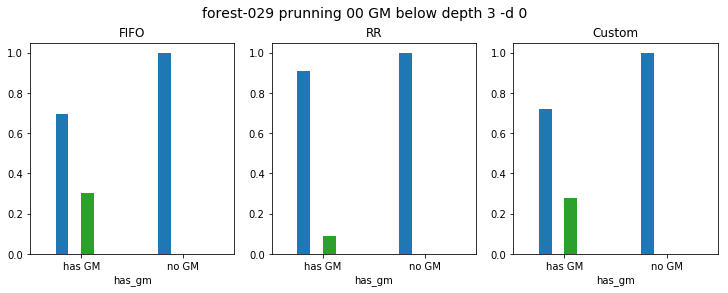

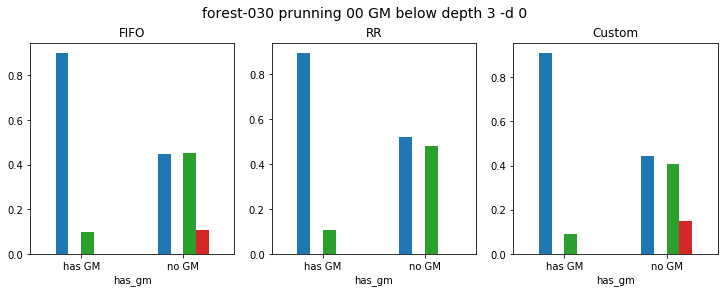

In [ ]:
plot_many3(df00above_00_ff, df00above_00_rr, df00above_00_cus, "FIFO", "RR", "Custom", "above00", "prunning 00 GM below depth 3 -d 0")

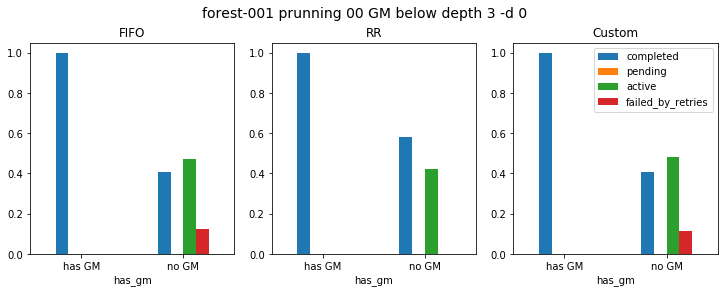

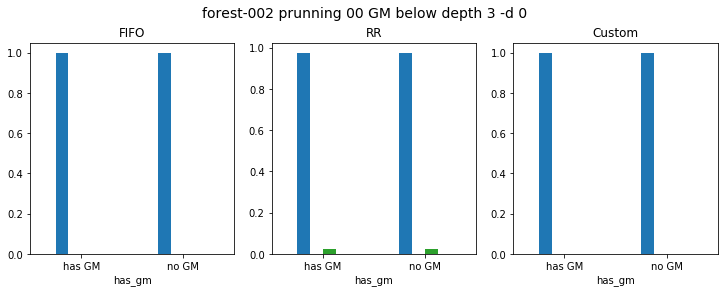

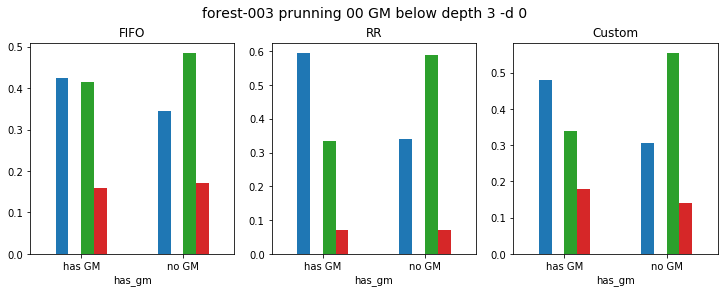

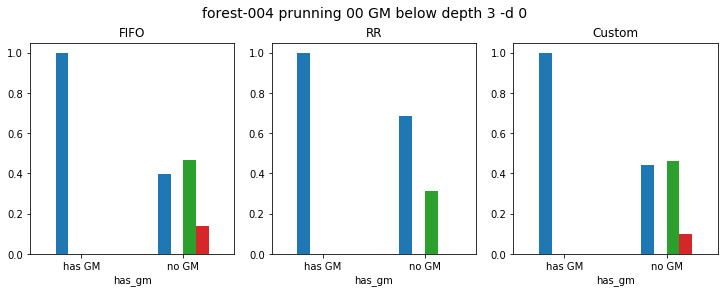

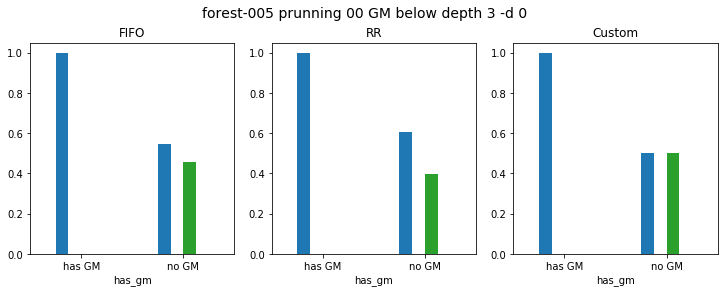

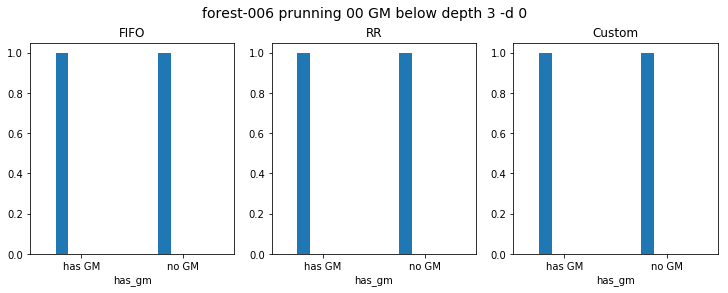

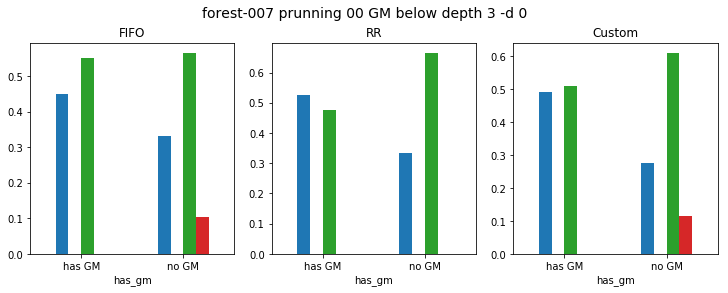

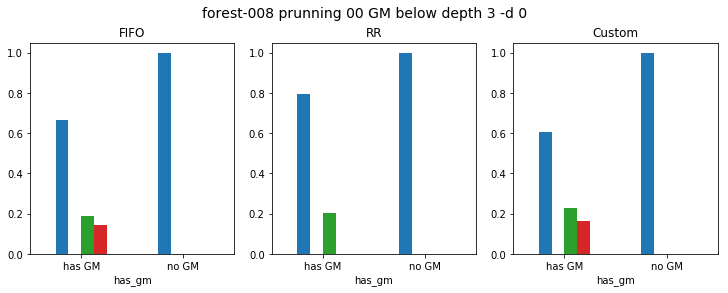

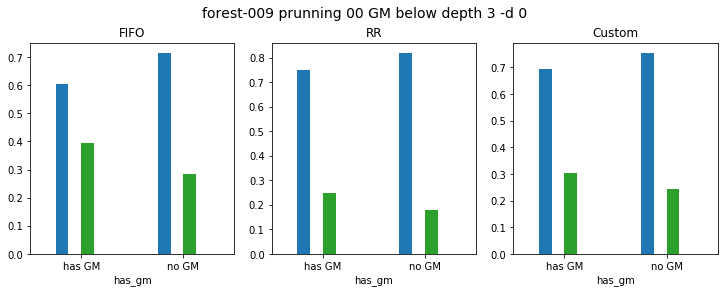

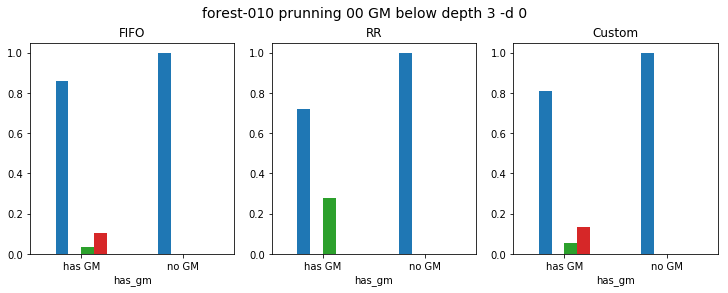

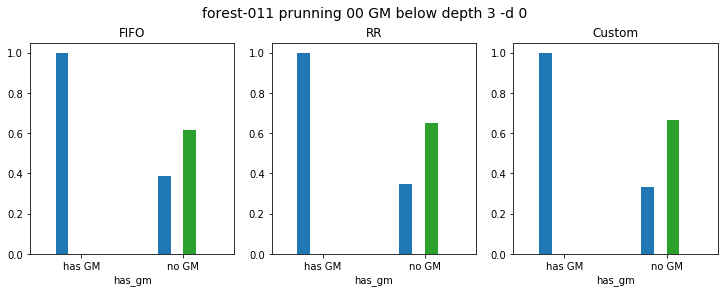

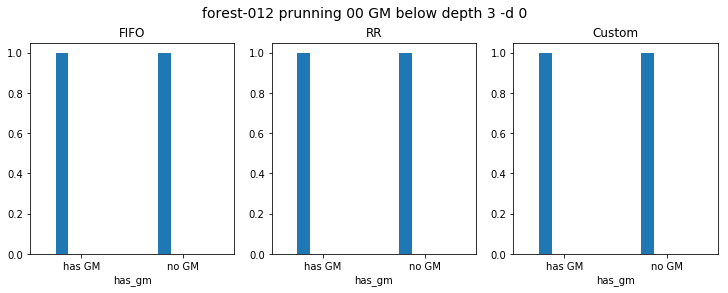

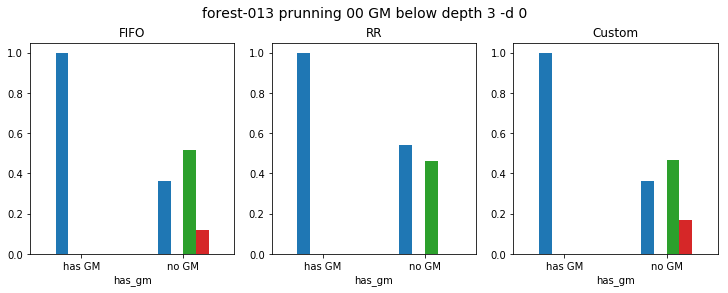

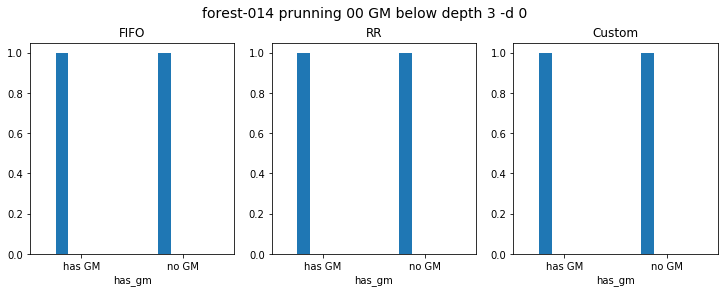

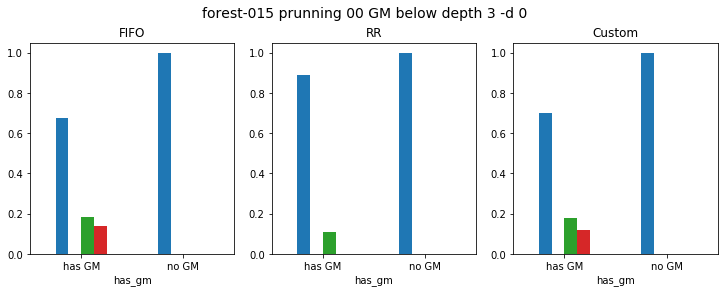

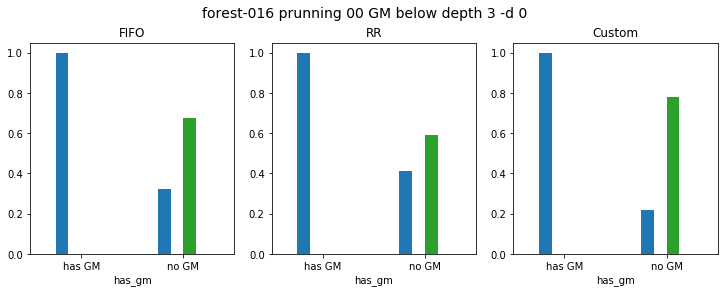

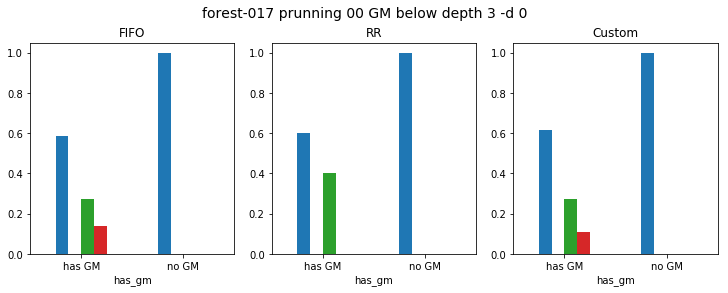

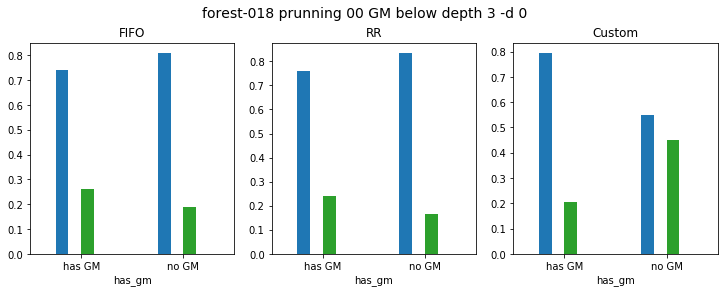

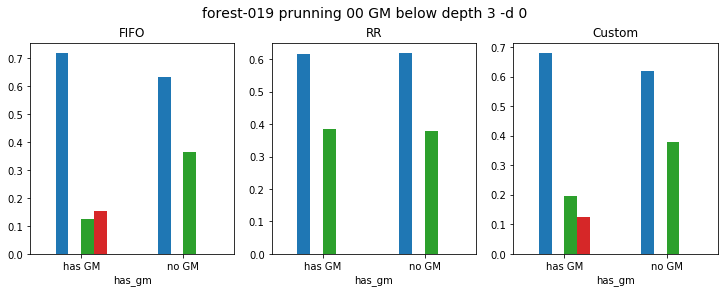

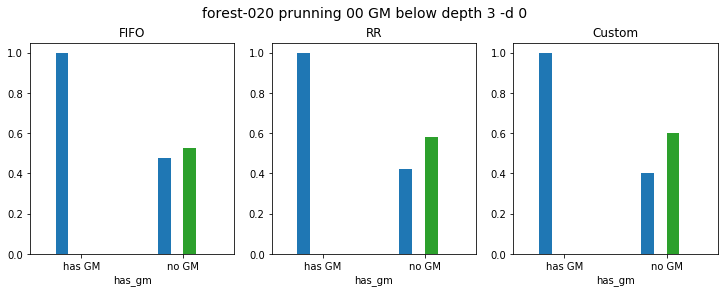

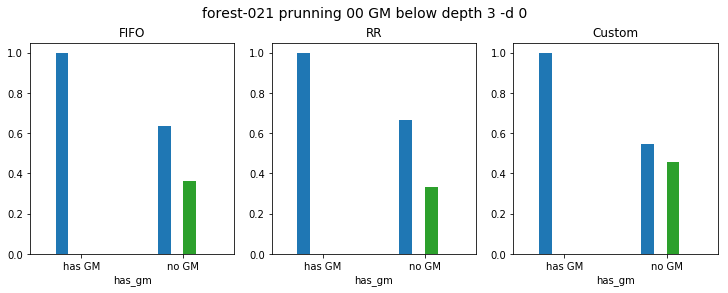

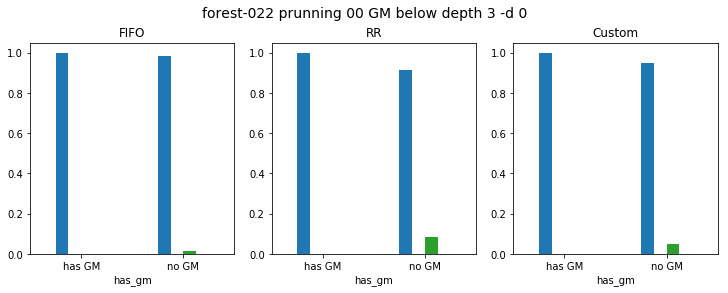

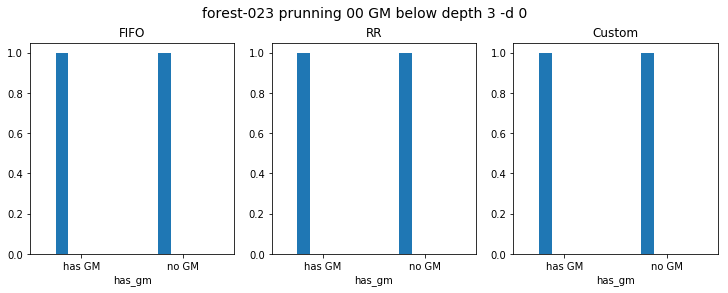

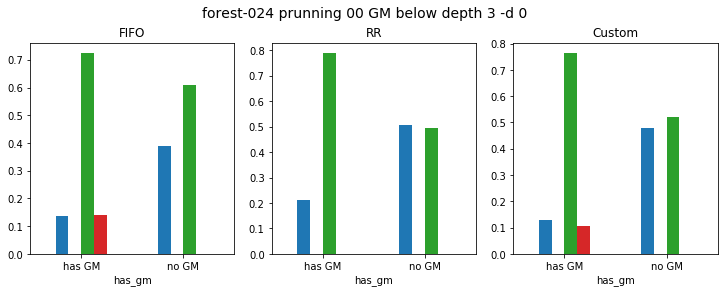

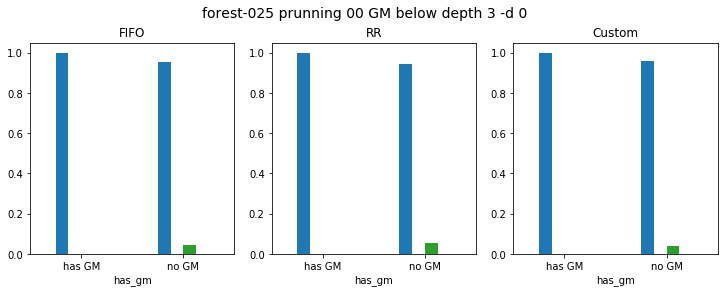

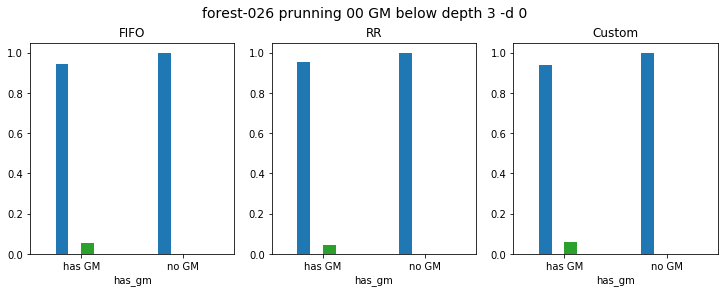

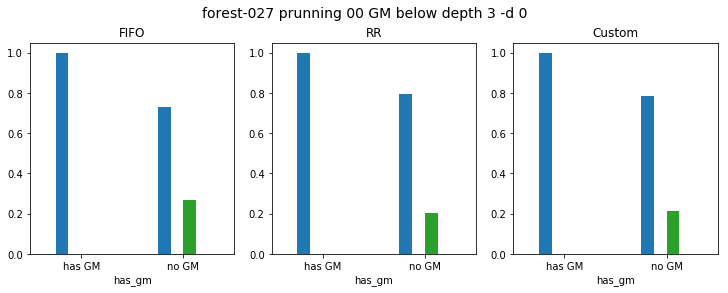

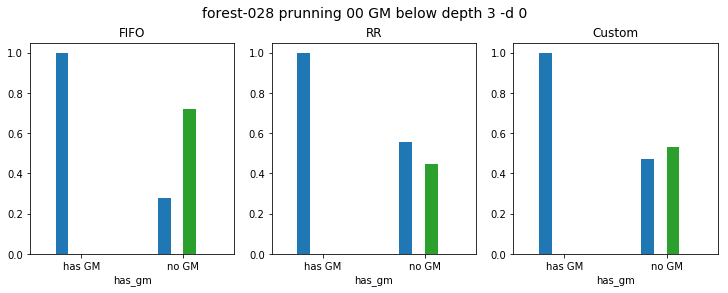

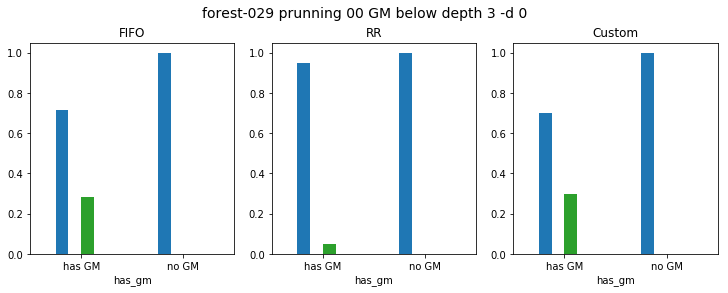

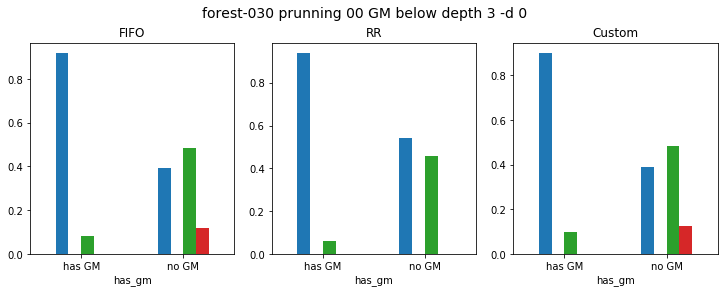

In [ ]:
plot_many3(df00bellow_00_ff, df00bellow_00_rr, df00bellow_00_cus,"FIFO", "RR", "Custom", "below00", "prunning 00 GM below depth 3 -d 0")

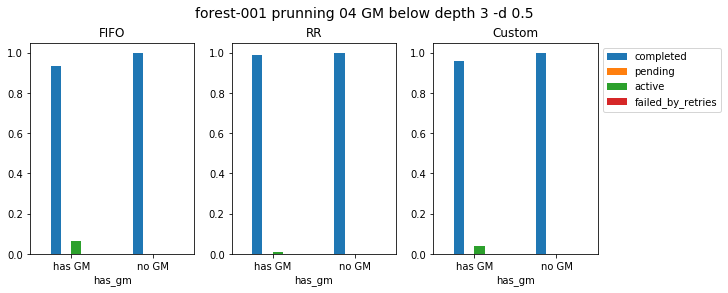

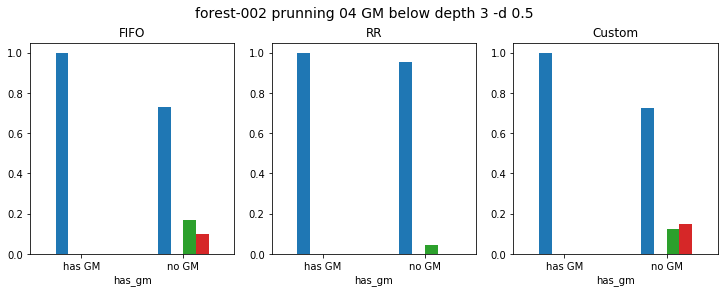

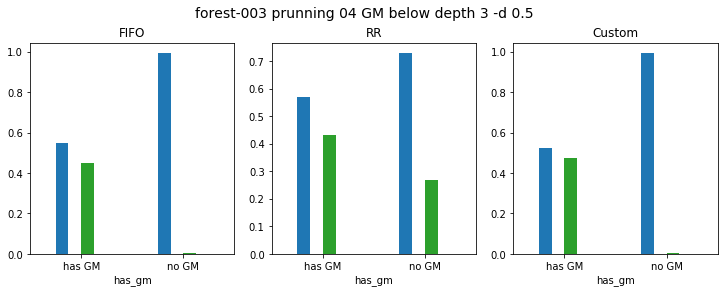

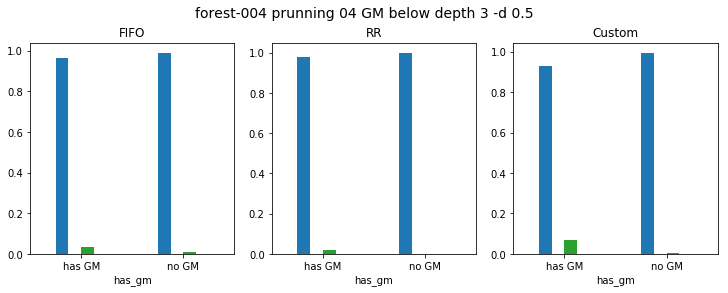

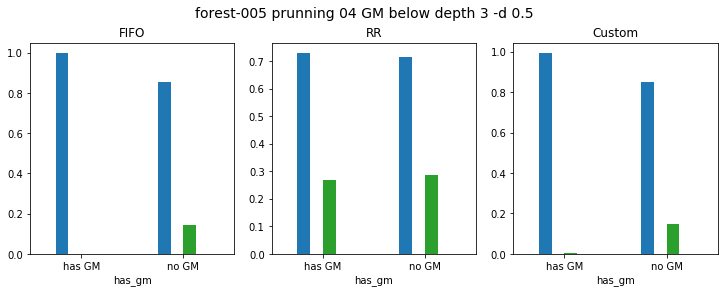

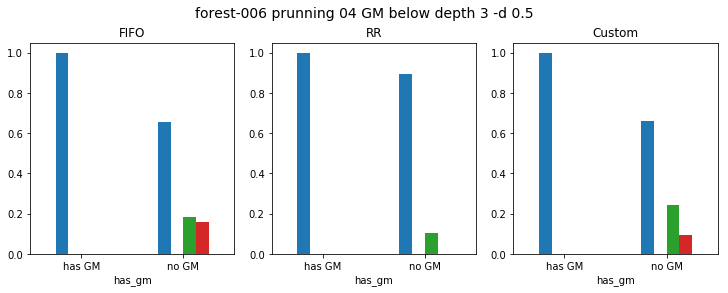

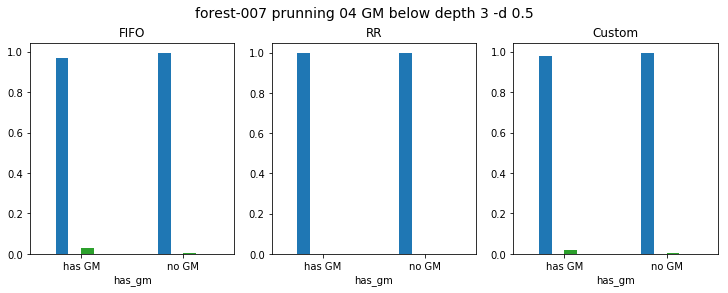

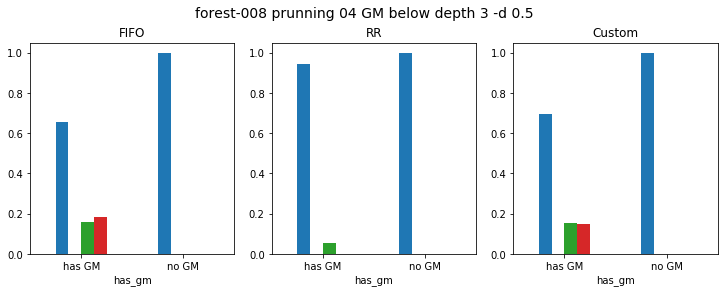

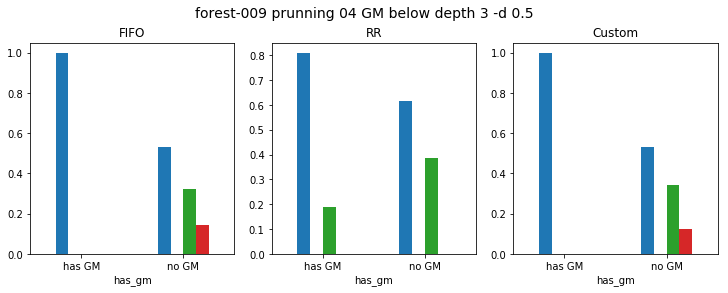

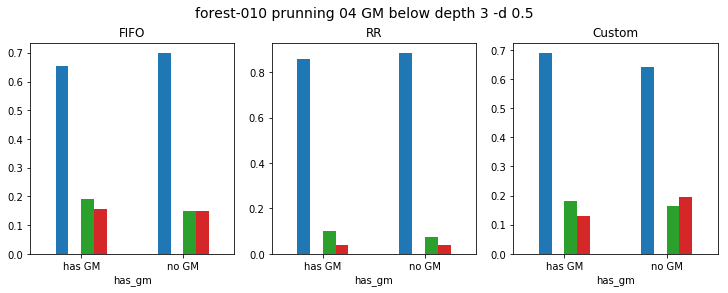

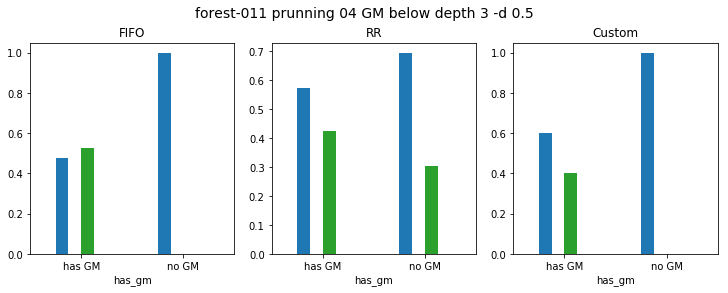

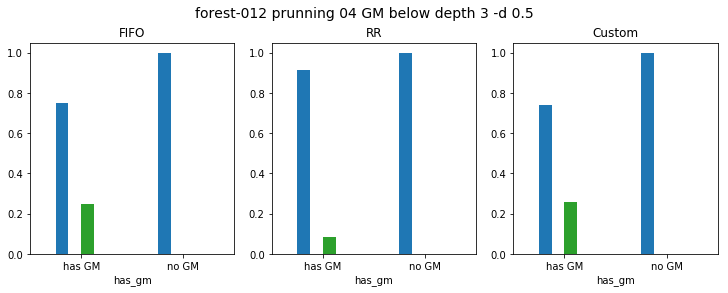

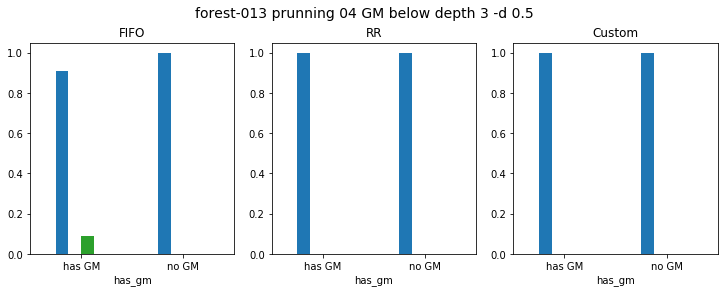

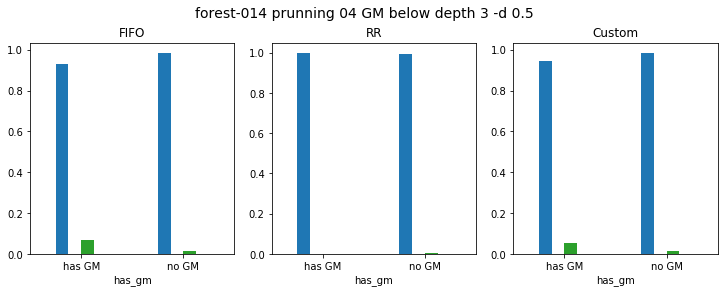

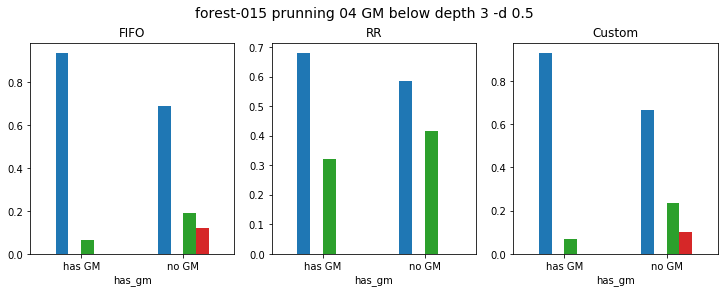

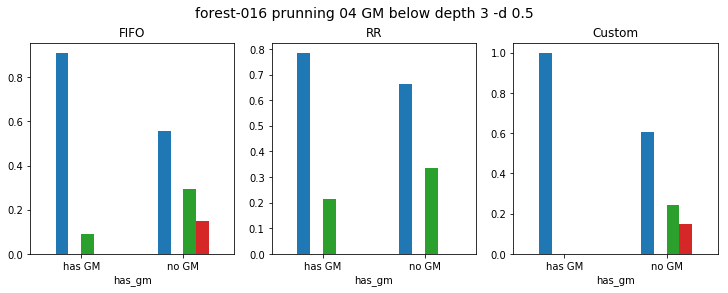

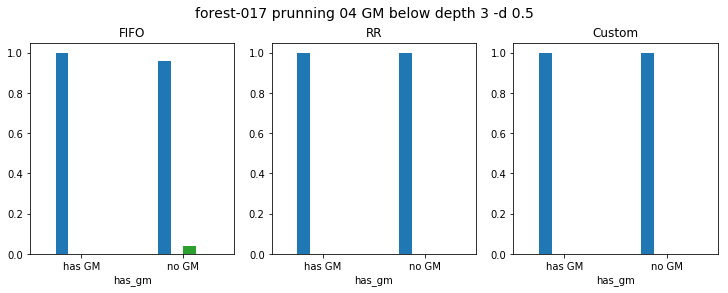

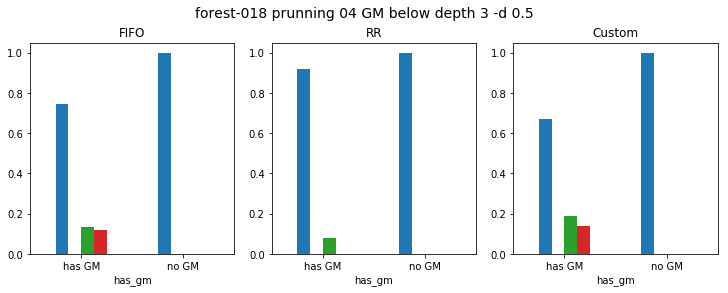

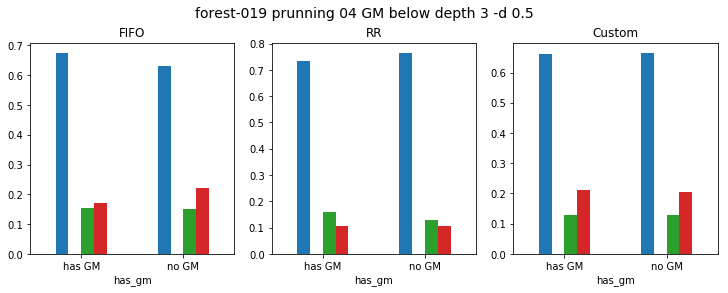

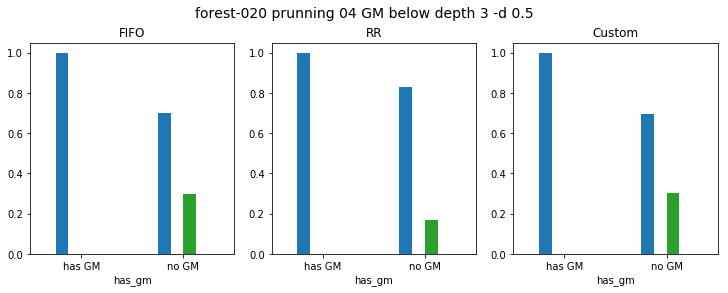

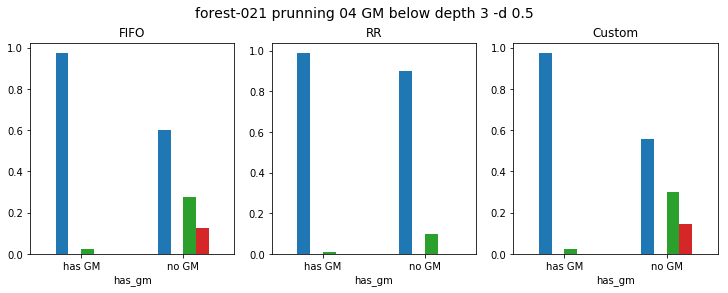

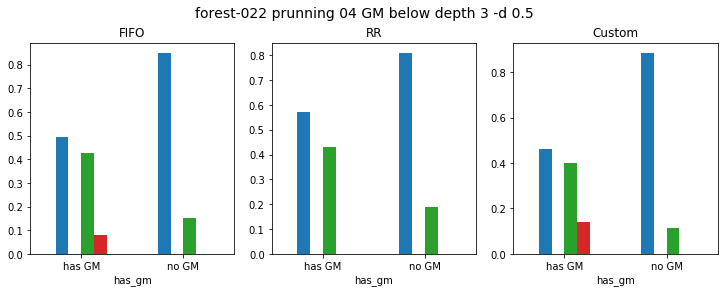

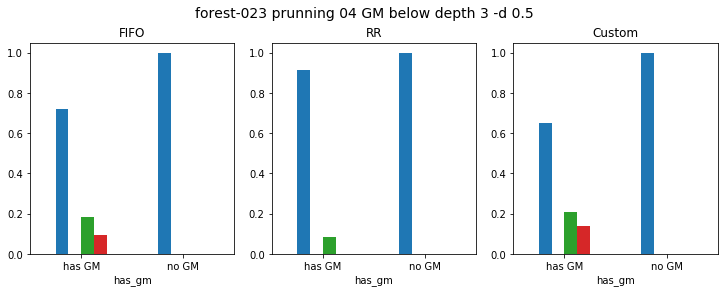

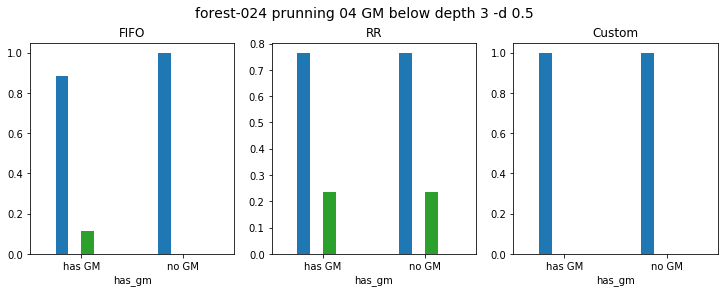

Empty 'DataFrame': no numeric data to plot
forest-025 not found


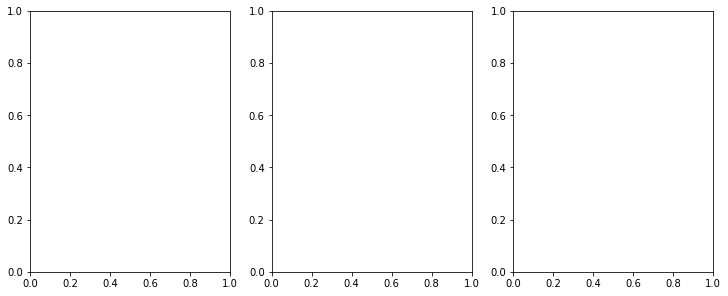

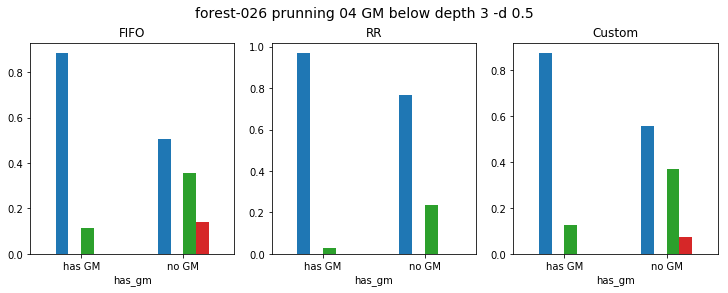

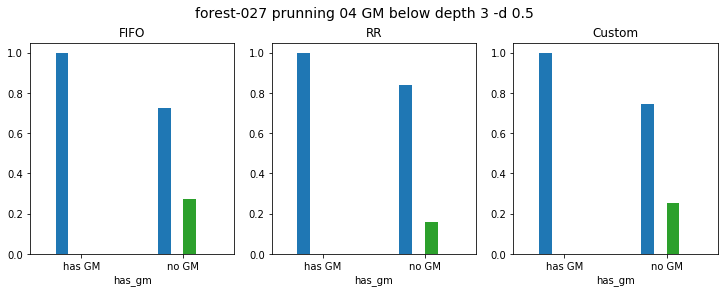

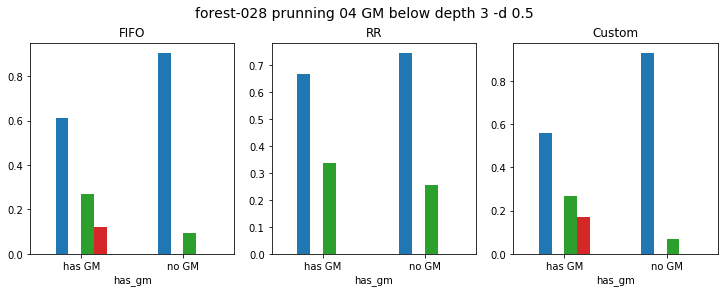

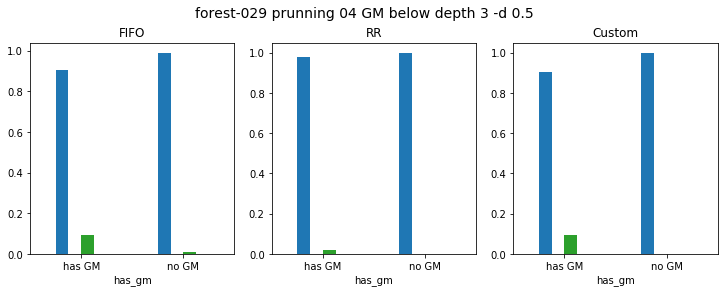

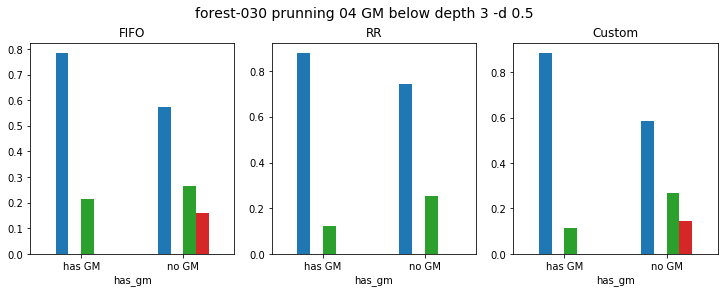

In [ ]:
plot_many3(df04above_05_ff, df04above_05_rr, df04above_05_cus,"FIFO", "RR", "Custom", "above04", "prunning 04 GM below depth 3 -d 0.5")

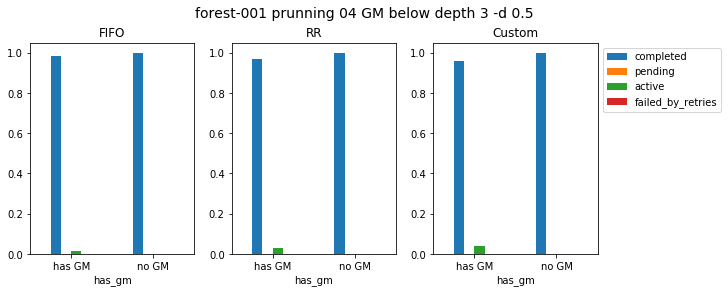

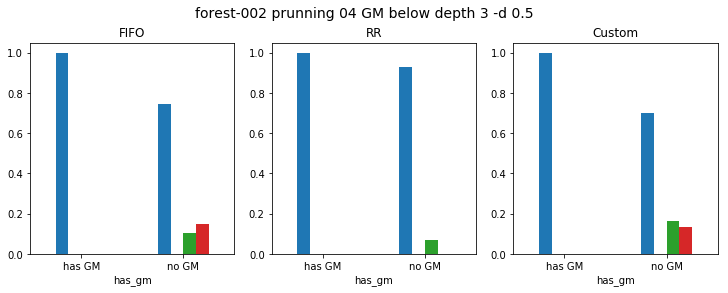

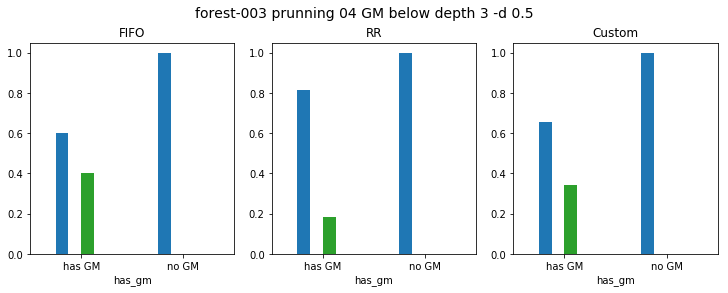

Empty 'DataFrame': no numeric data to plot
forest-004 not found


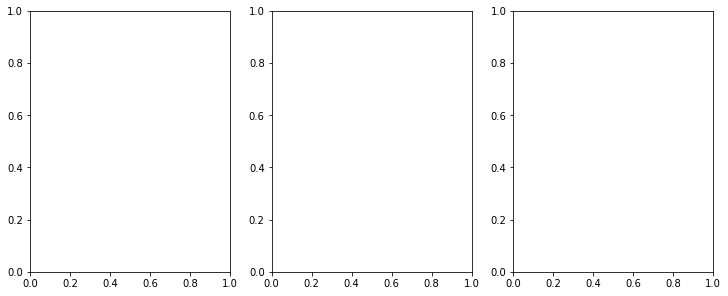

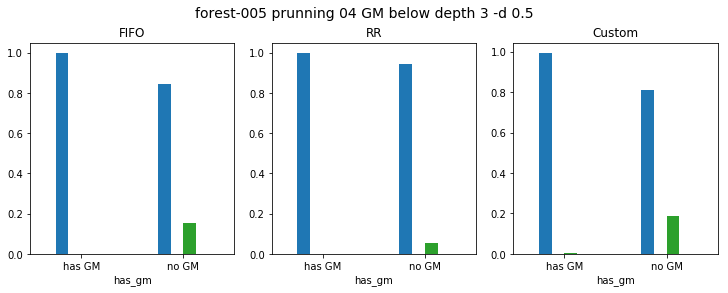

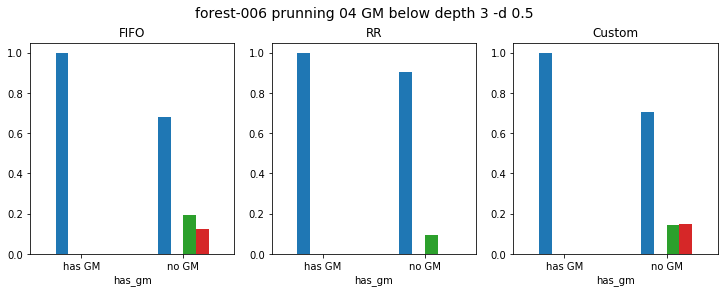

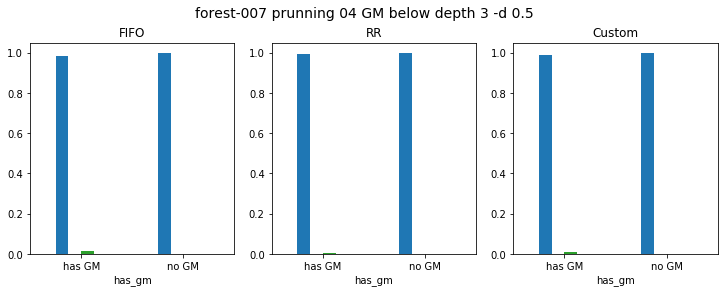

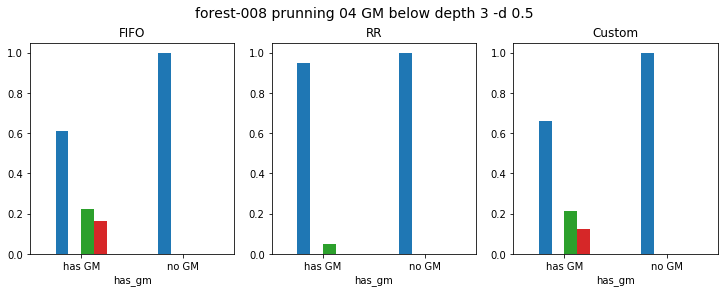

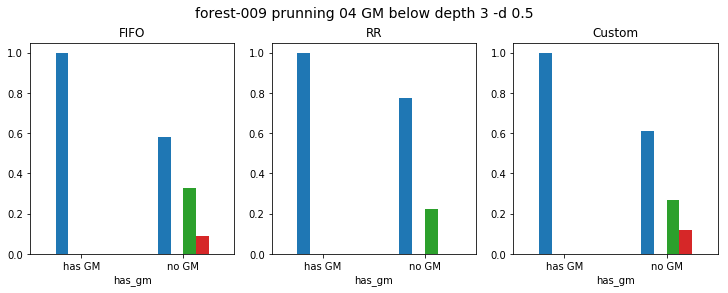

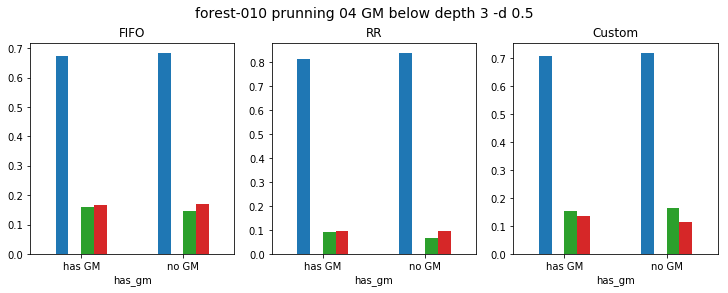

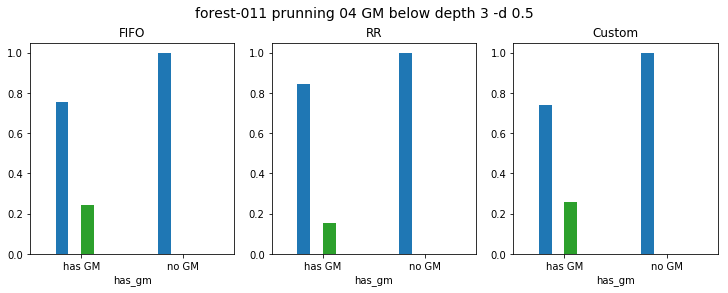

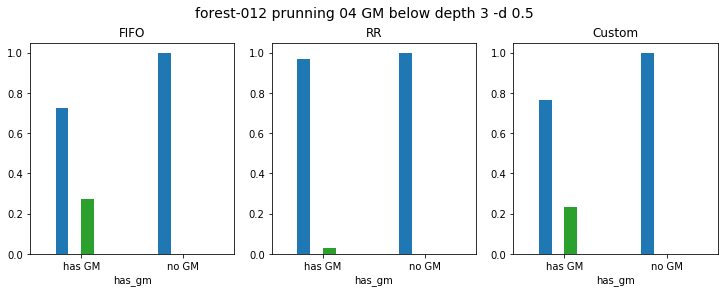

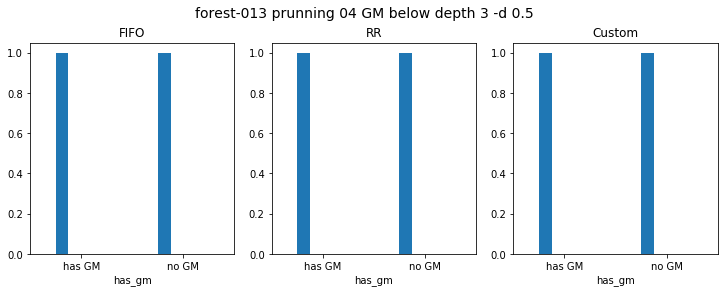

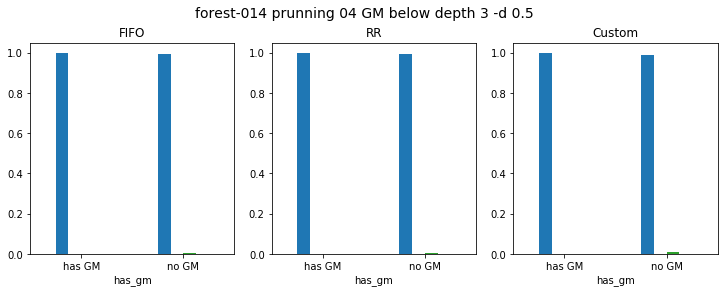

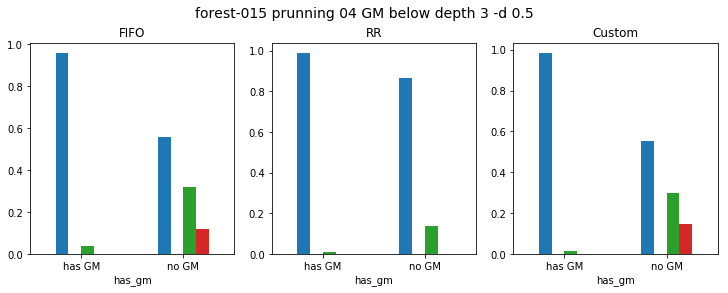

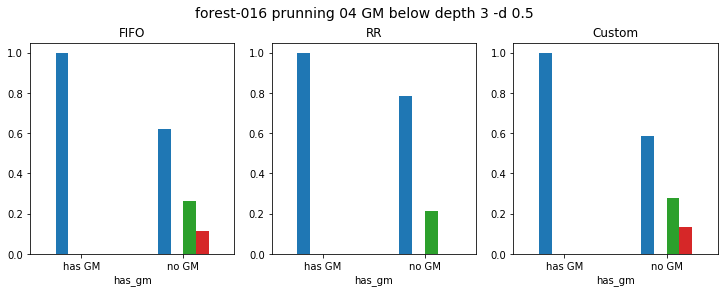

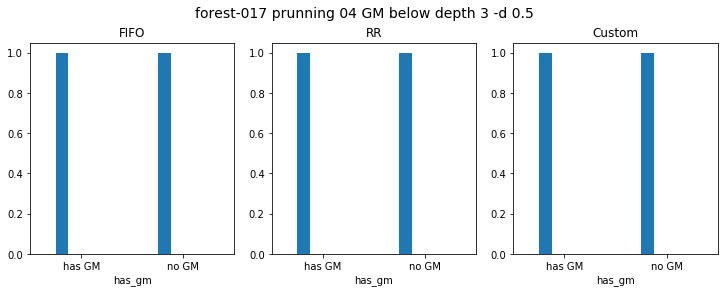

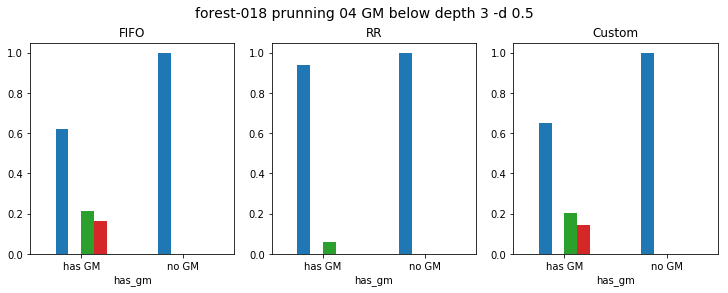

Empty 'DataFrame': no numeric data to plot
forest-019 not found


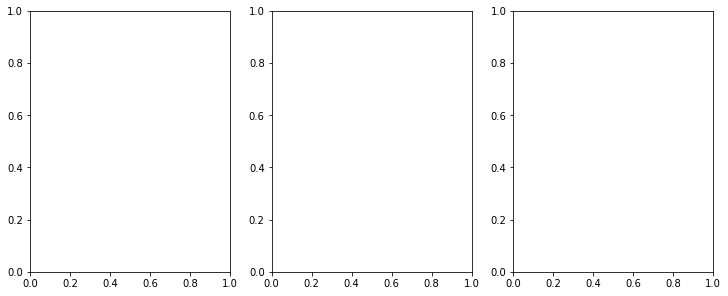

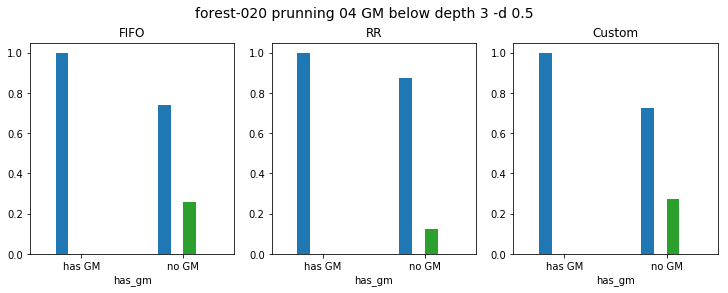

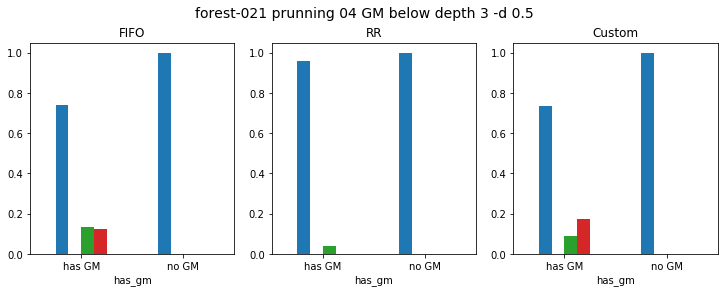

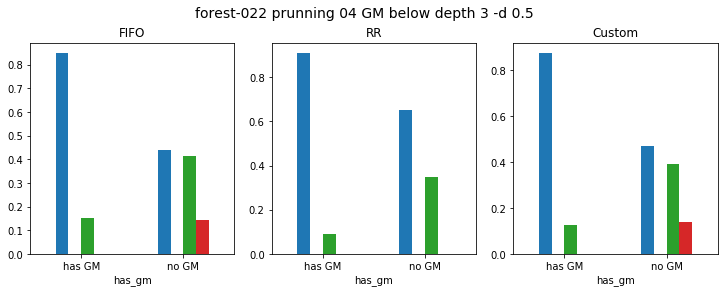

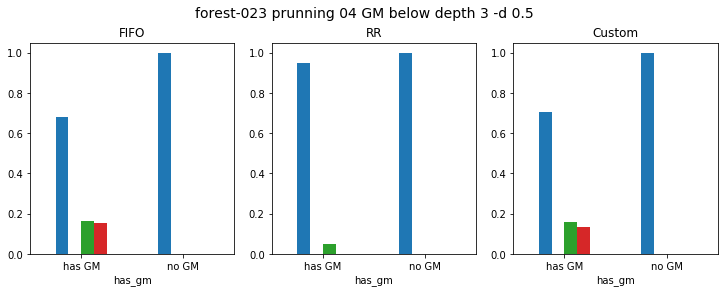

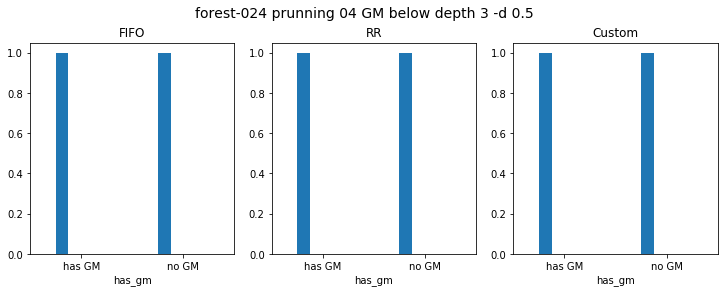

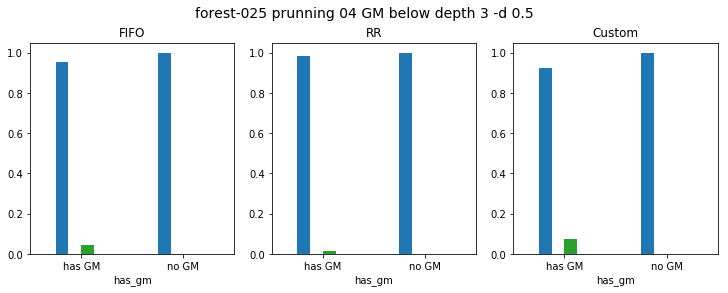

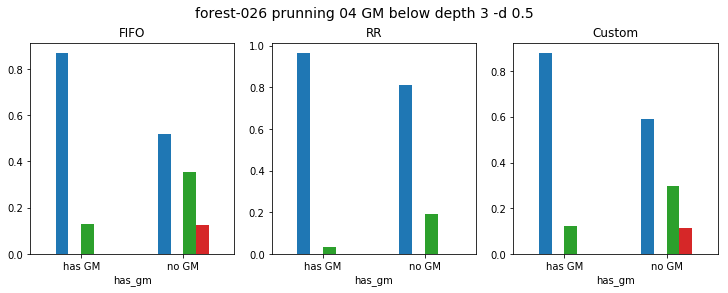

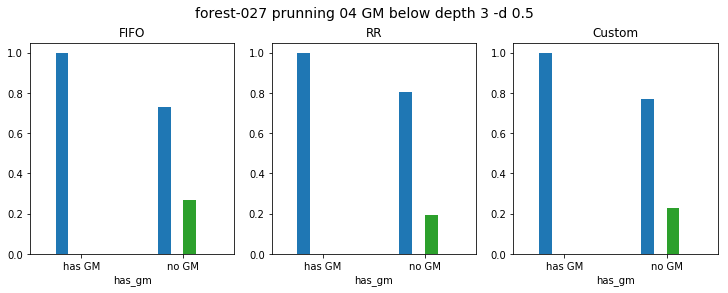

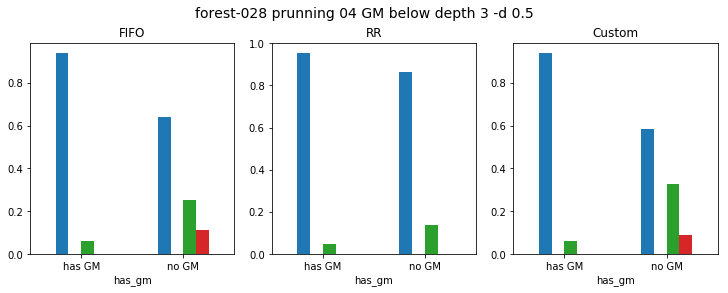

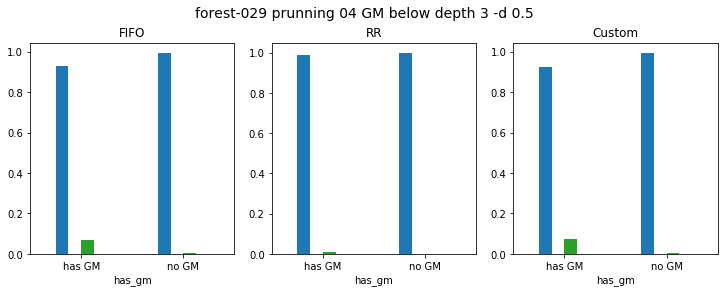

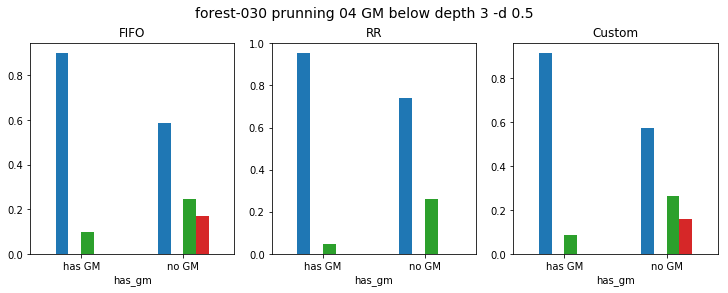

In [ ]:
plot_many3(df04bellow_05_ff, df04bellow_05_rr, df04bellow_05_cus, "FIFO", "RR", "Custom", "below04", "prunning 04 GM below depth 3 -d 0.5")

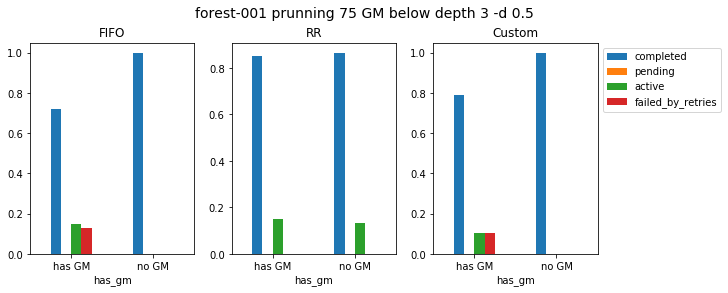

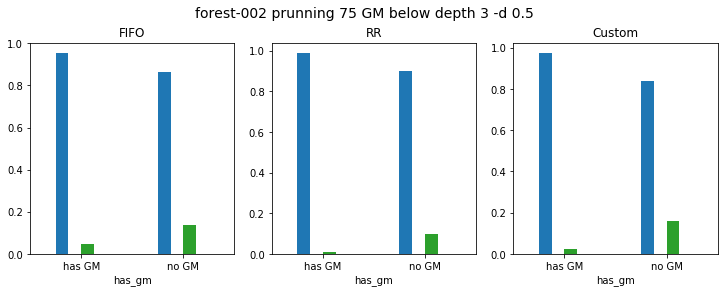

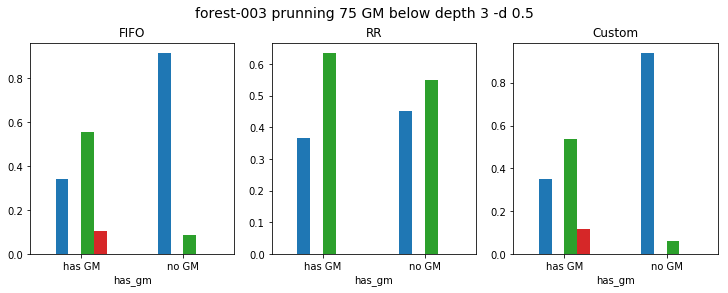

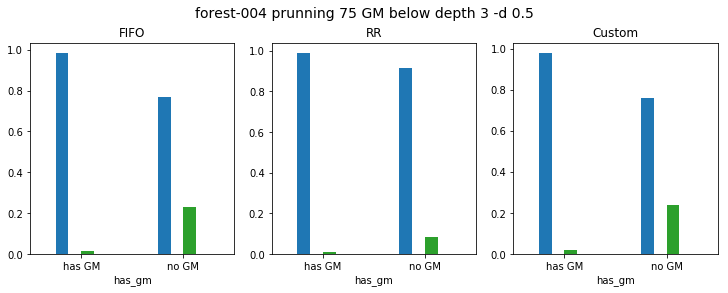

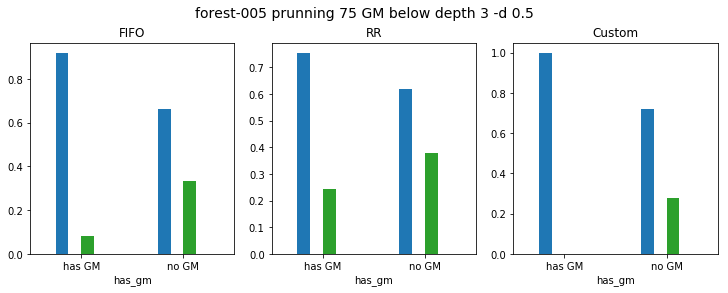

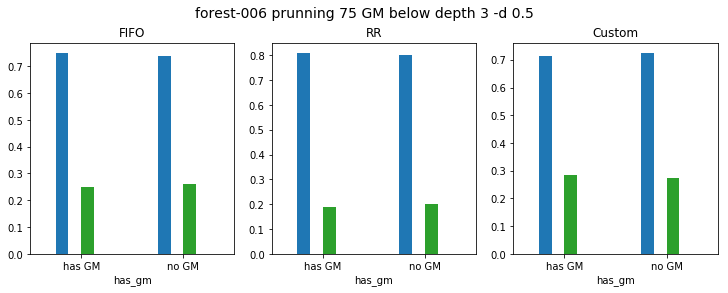

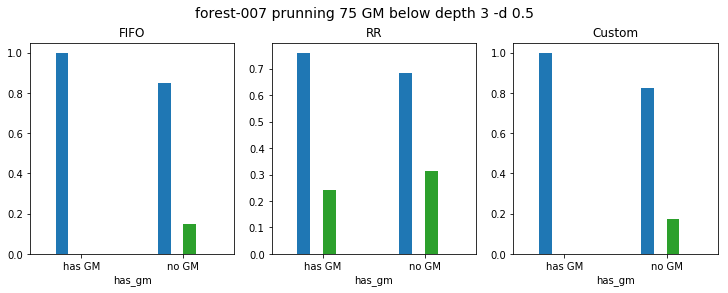

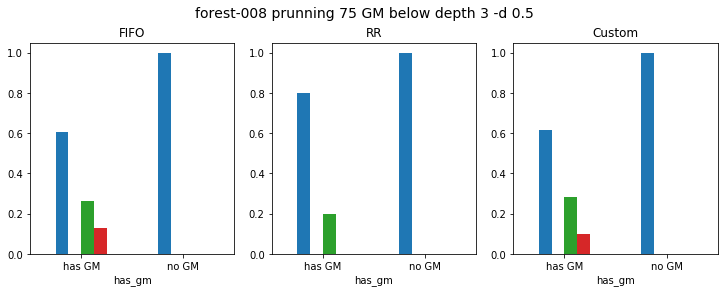

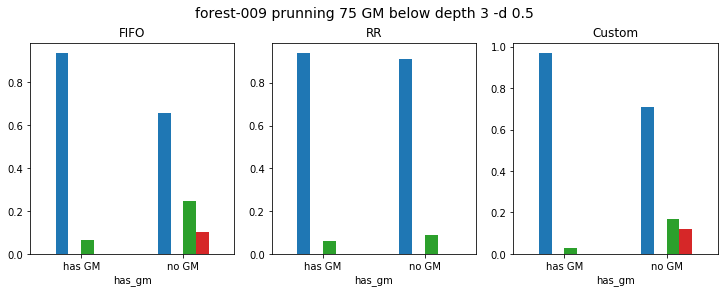

Empty 'DataFrame': no numeric data to plot
forest-010 not found


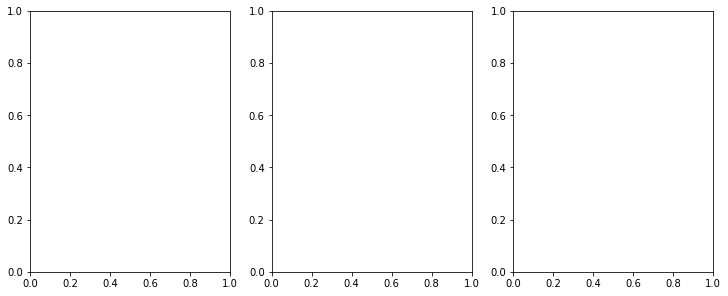

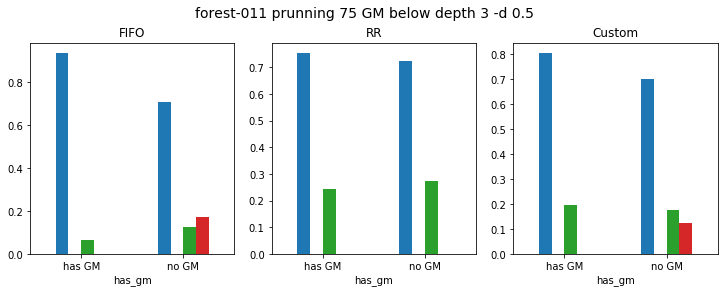

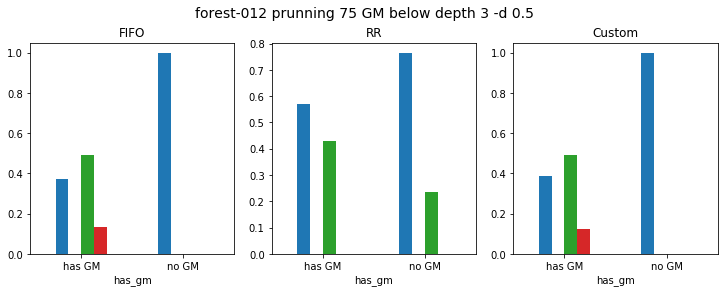

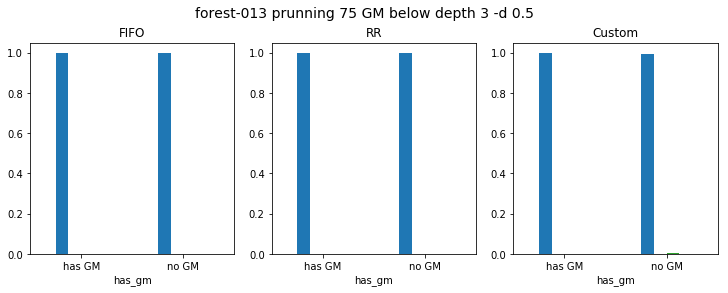

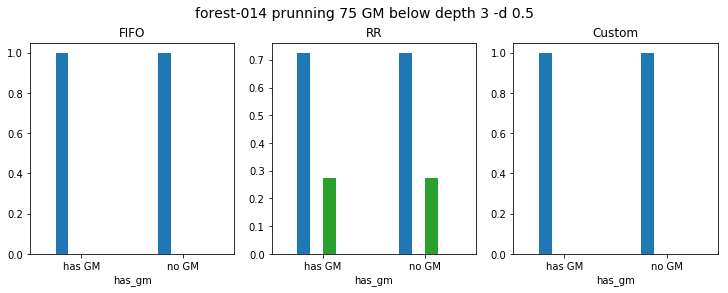

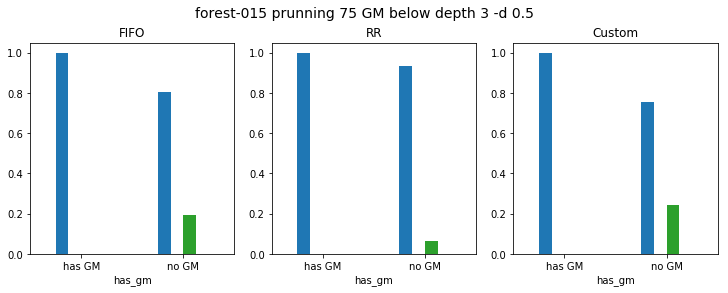

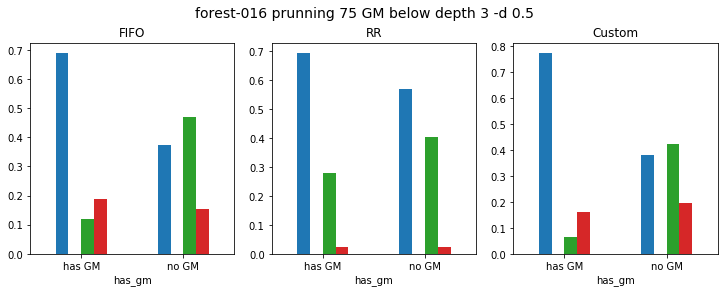

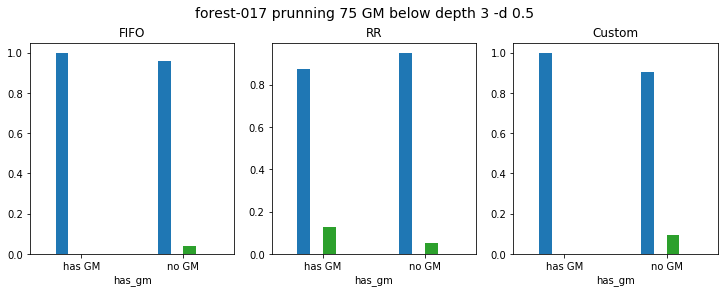

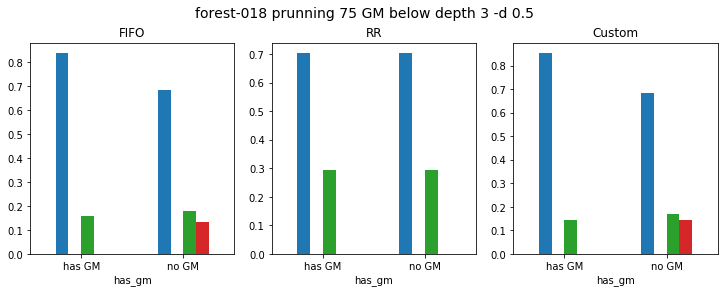

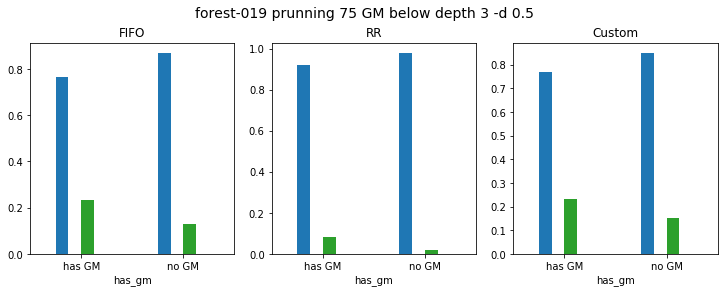

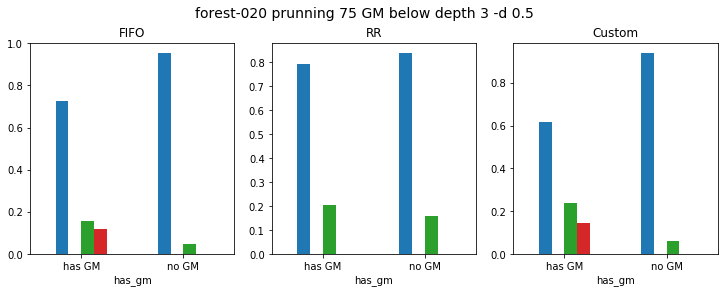

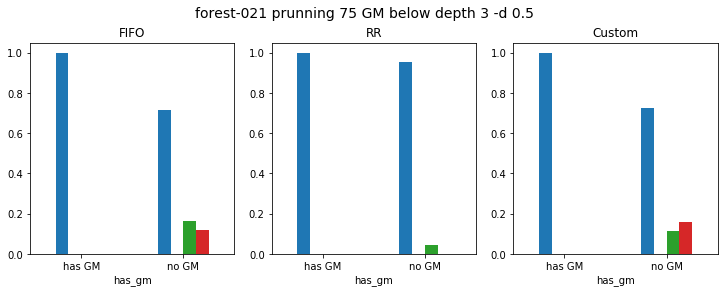

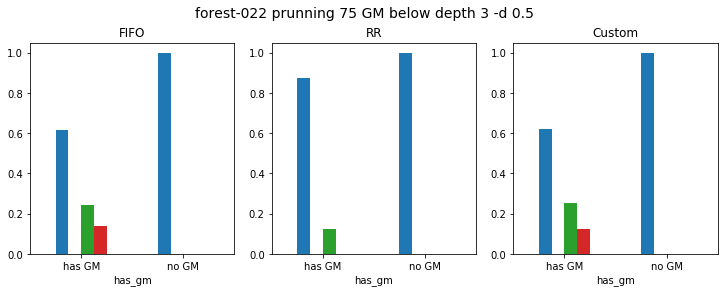

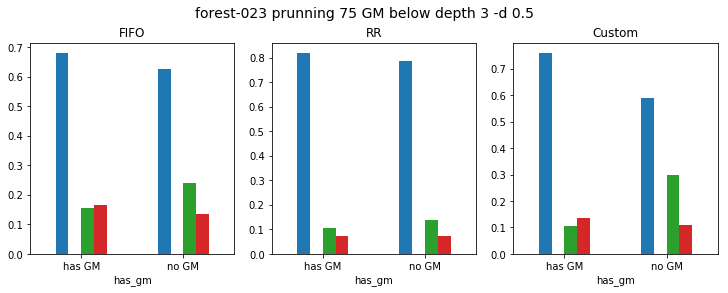

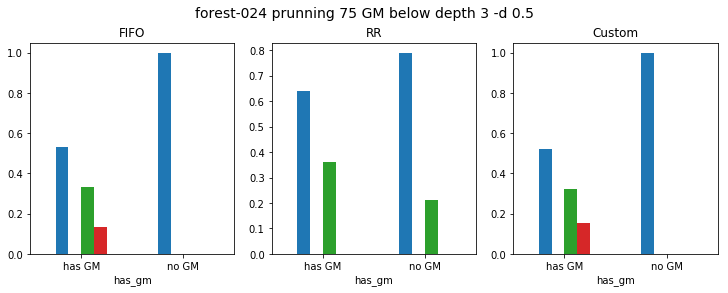

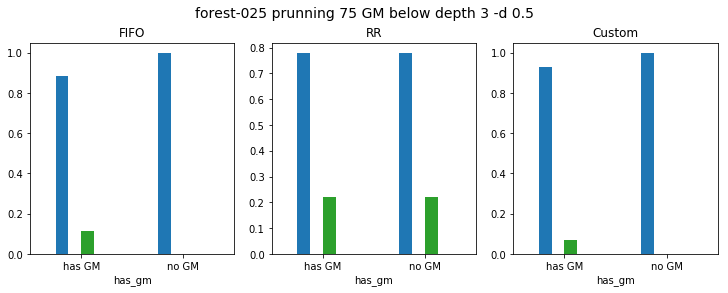

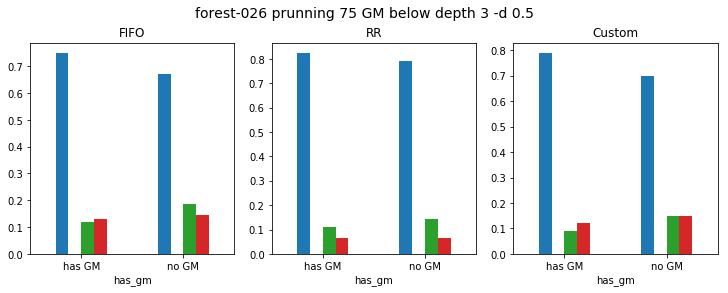

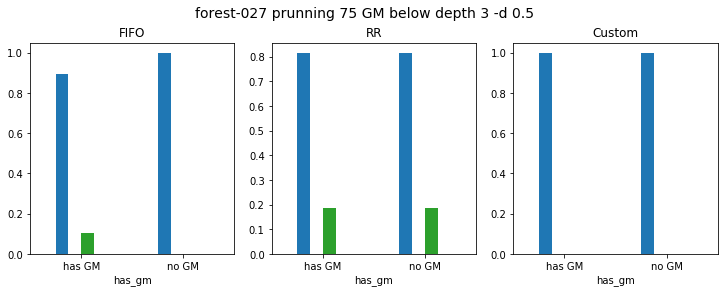

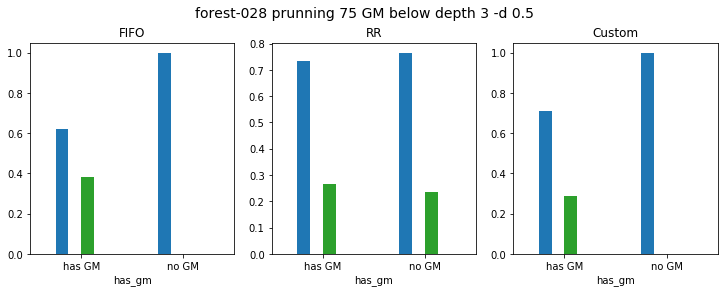

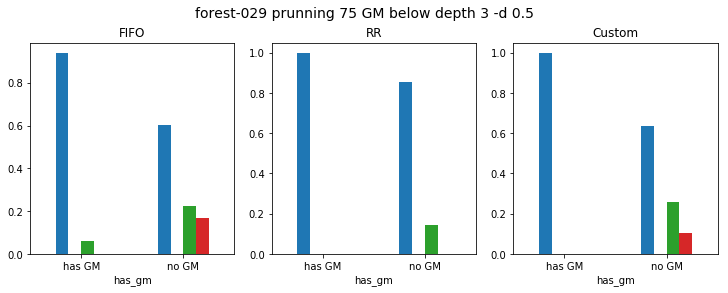

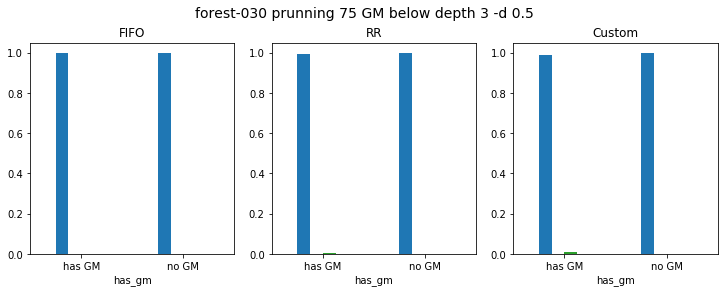

In [ ]:
plot_many3(df75above_05_ff, df75above_05_rr, df75above_05_cus,"FIFO", "RR", "Custom", "above75", "prunning 75 GM below depth 3 -d 0.5")

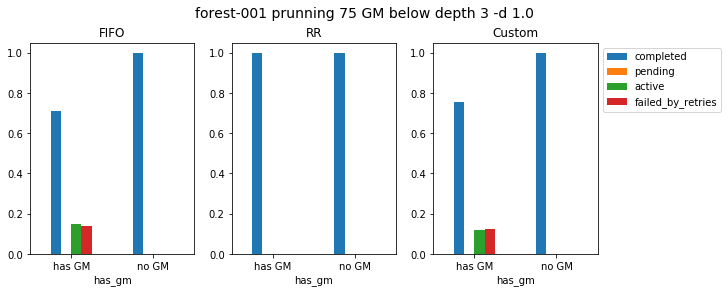

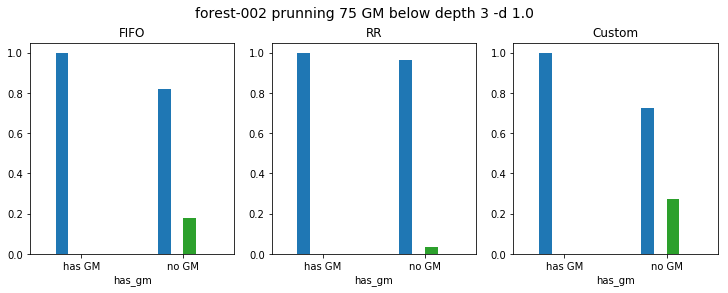

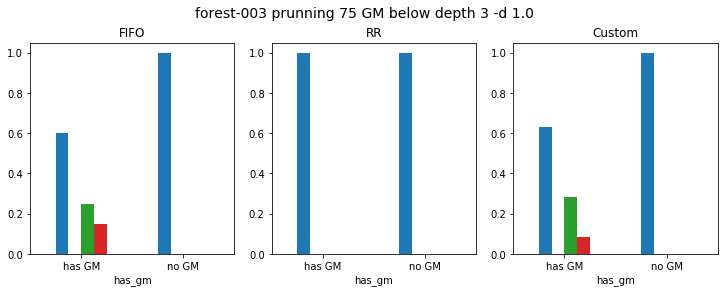

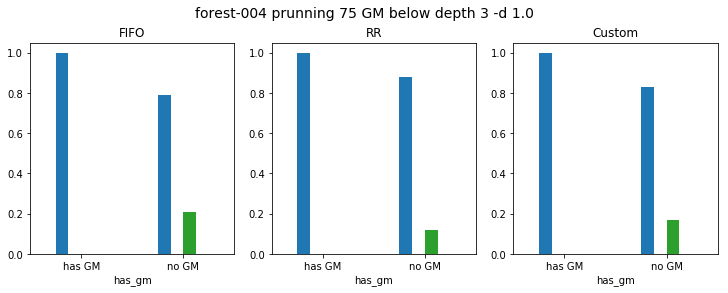

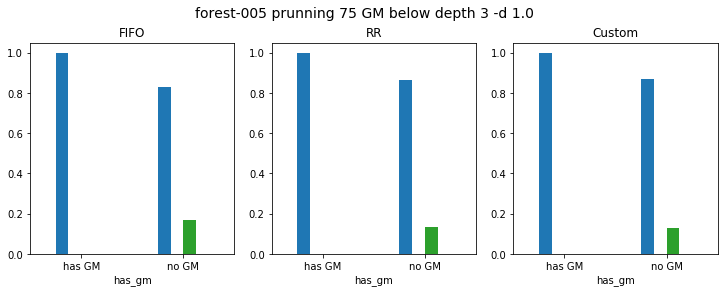

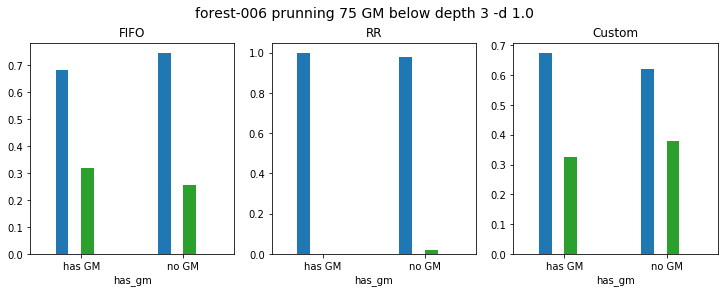

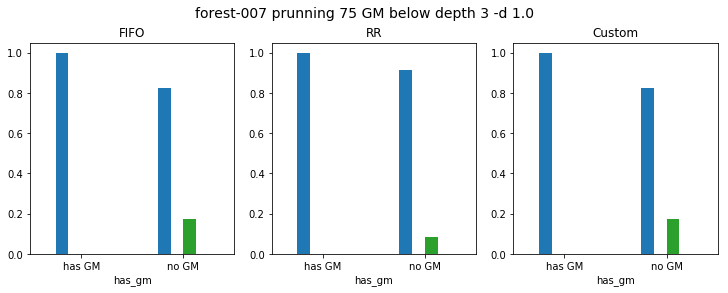

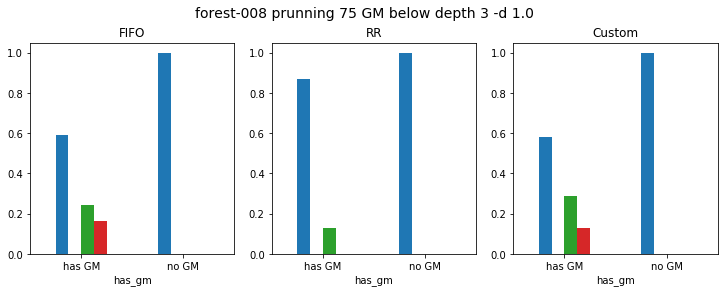

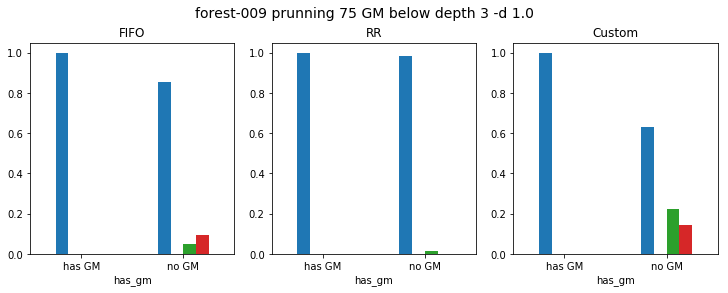

Empty 'DataFrame': no numeric data to plot
forest-010 not found


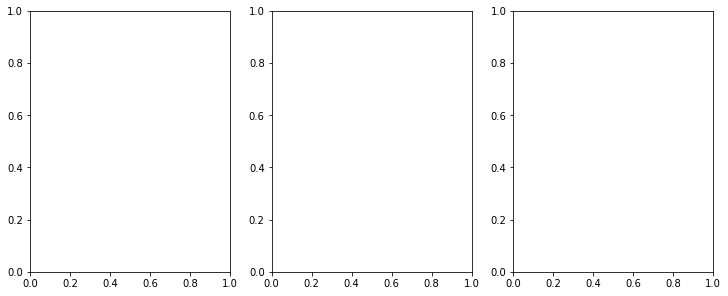

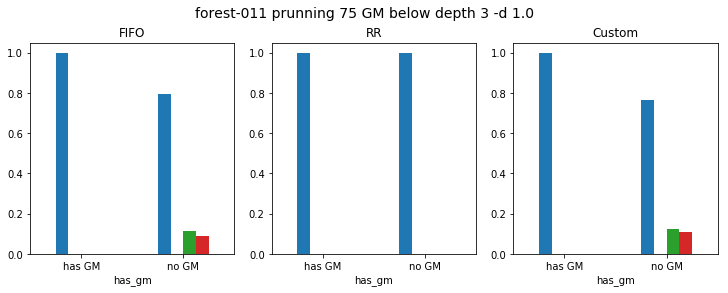

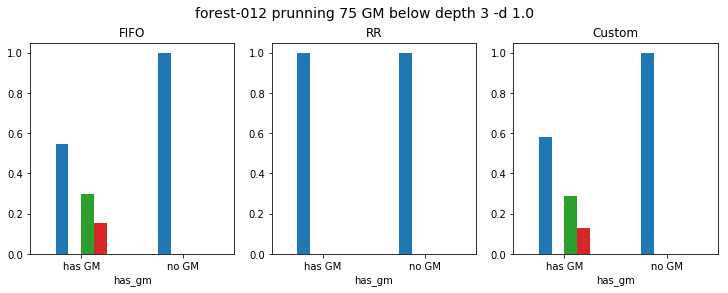

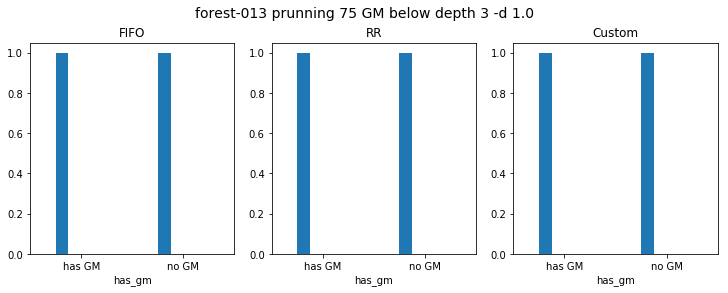

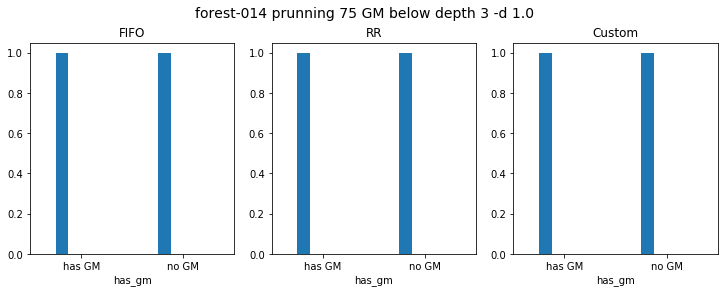

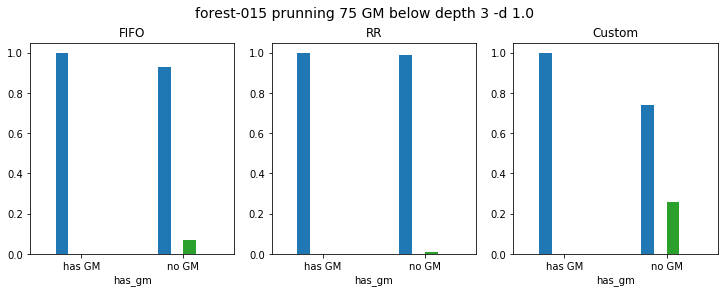

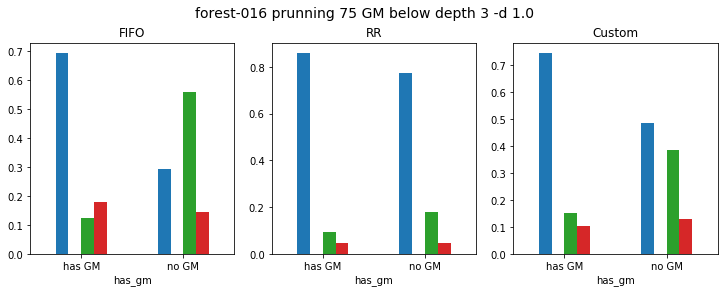

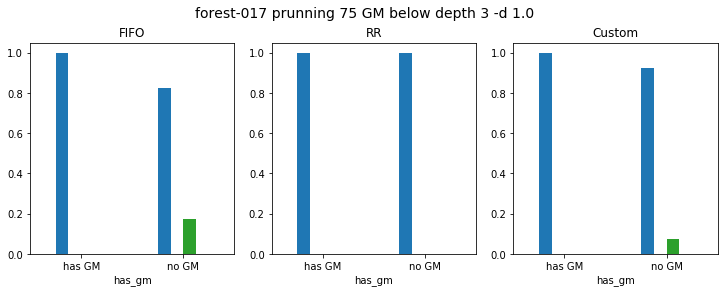

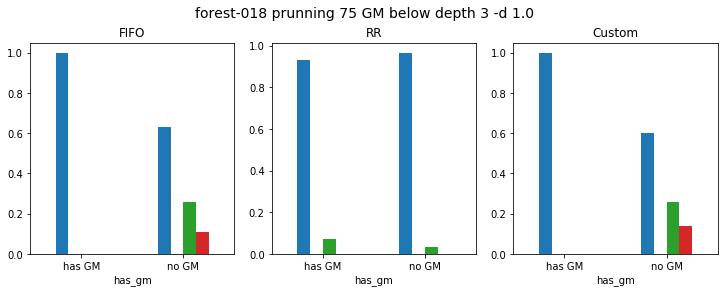

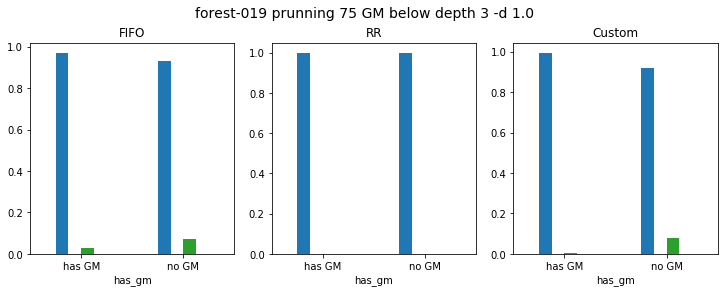

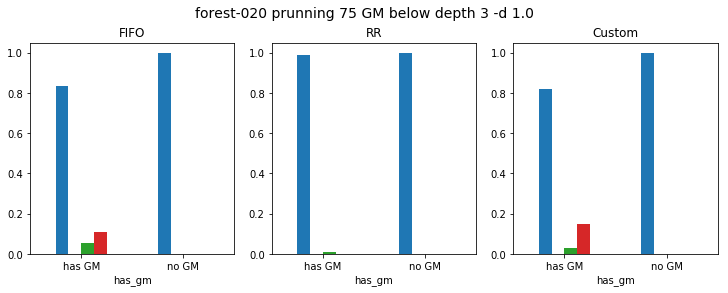

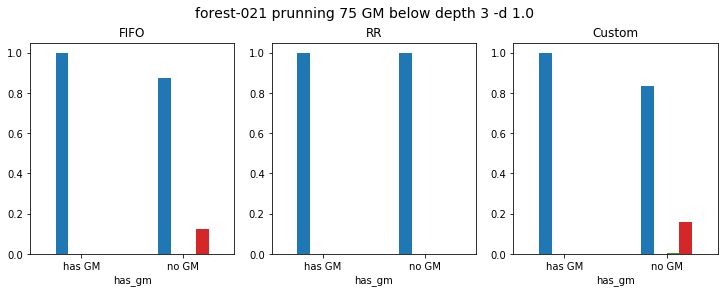

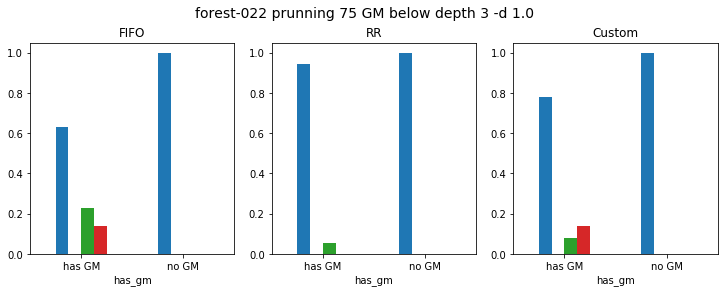

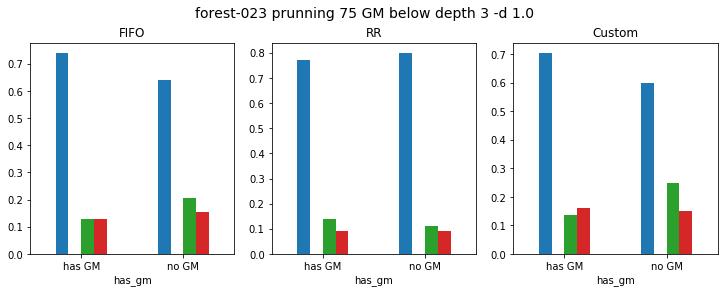

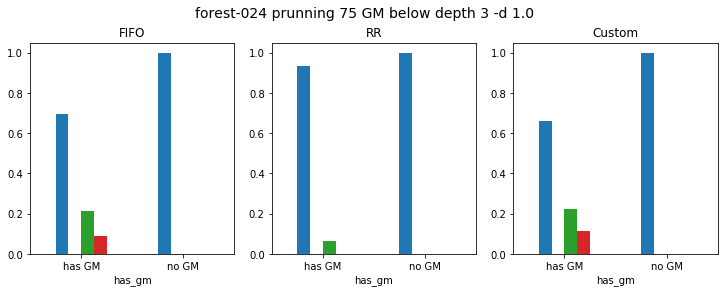

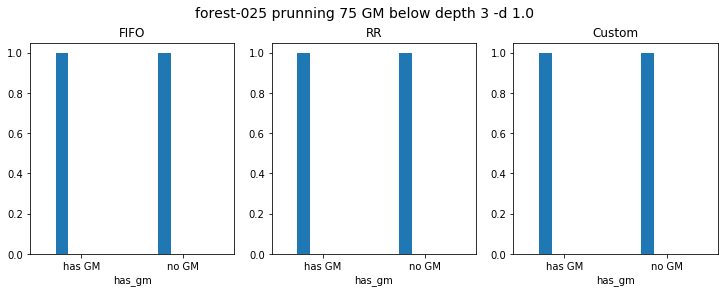

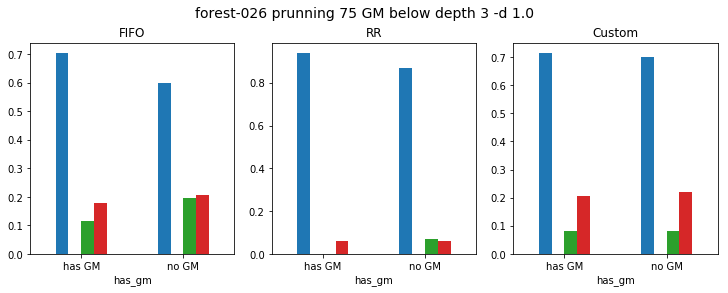

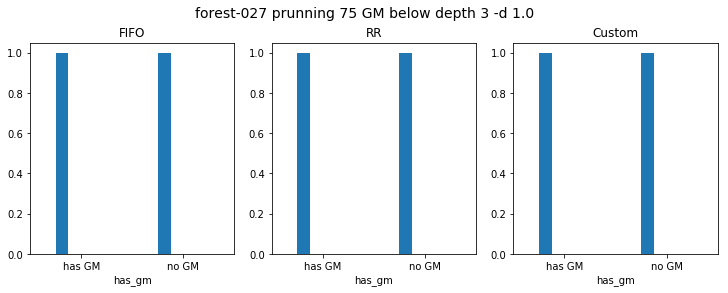

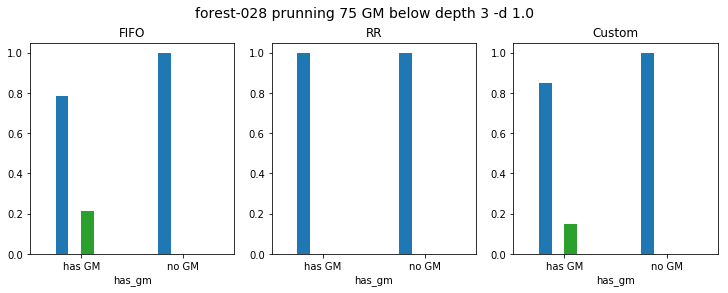

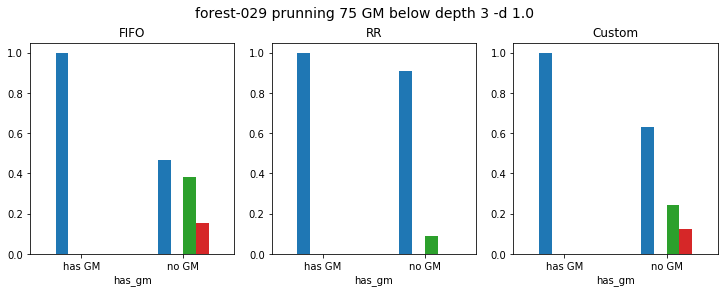

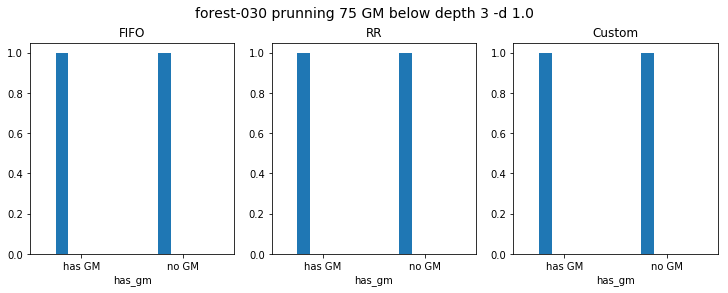

In [ ]:
plot_many3(df75bellow_01_ff, df75bellow_01_rr, df75bellow_01_cus,"FIFO", "RR", "Custom", "below75", "prunning 75 GM below depth 3 -d 1.0")

In [ ]:
def plot_many4(df0, df1, df2, title0, title1, title2, loc, category):
    
    trees = ['T0-G0', 'T1-G0']
    
    for i in range(1,31):
        
        file_name = get_file_name(i)
        
        try:
            df0_copy = df0.copy()
            df1_copy = df1.copy()
            df2_copy = df2.copy()
            
            df0_new = df0_copy[['has_gm','avg_steps']]
            df1_new = df1_copy[['has_gm','avg_steps']]
            df2_new = df2_copy[['has_gm','avg_steps']]
            
#             df0_new = get_proportion_df(df0_copy)
#             df1_new = get_proportion_df(df1_copy)
#             df2_new = get_proportion_df(df2_copy)
            
#             if(tree_loc[i][loc] == 0):
#                 df0_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df0_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
        
#                 df1_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df1_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
                
#                 df2_new["goal_name"].replace('T0-G0', 'T0-G0, has GM', inplace=True)
#                 df2_new["goal_name"].replace('T1-G0', 'T1-G0, no GM', inplace=True)
#             else:
#                 df0_new["goal_name"].replace('T1-G0', 'T1-G0, has GM', inplace=True)
#                 df0_new["goal_name"].replace('T0-G0', 'T0-G0, no GM', inplace=True)
                
#                 df1_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
#                 df1_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                
#                 df2_new["goal_name"].replace('T1-G0', 'T0-G0, has GM', inplace=True)
#                 df2_new["goal_name"].replace('T0-G0', 'T1-G0, no GM', inplace=True)
                

            df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
            df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
            df2_new.drop(df2_new.loc[df2['forest_name']!= file_name].index, inplace=True)

            fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))

            df0_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[0])
            df1_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[1])
            df2_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[2])

            axs[1].set_title(title1)
            axs[0].set_title(title0)
            axs[2].set_title(title2)
            axs[0].get_legend().remove()
            axs[1].get_legend().remove()
            axs[2].get_legend().remove()
            plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
            plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
            fig.suptitle((file_name + " " + category), fontsize=14)
            
            plt.show()
        except Exception as e:
            print(e)
            print(file_name + " not found")

        

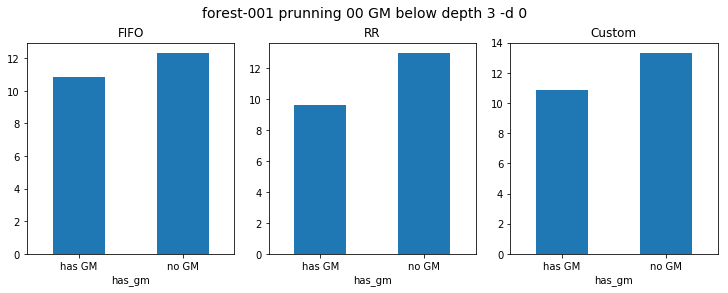

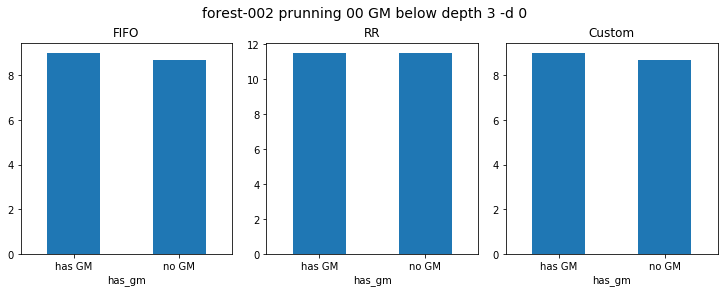

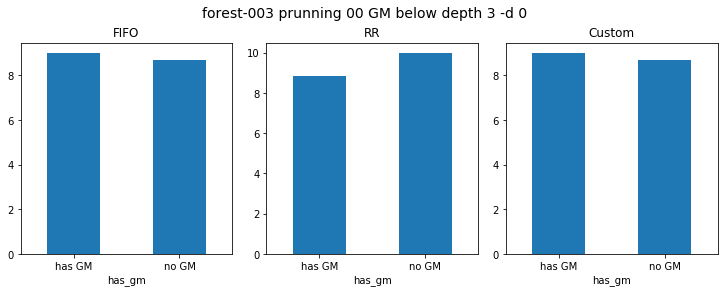

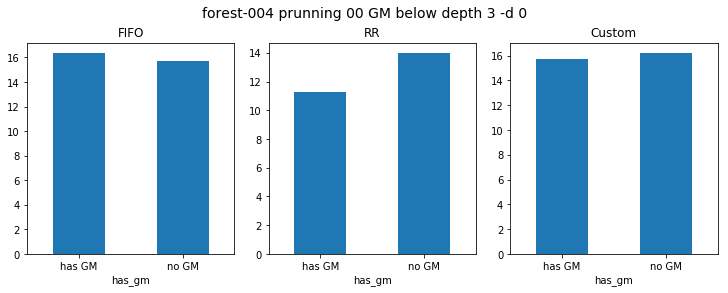

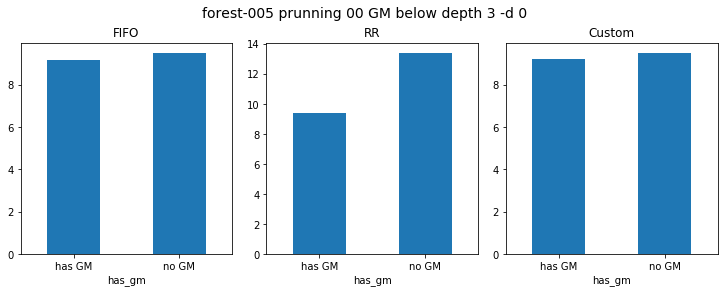

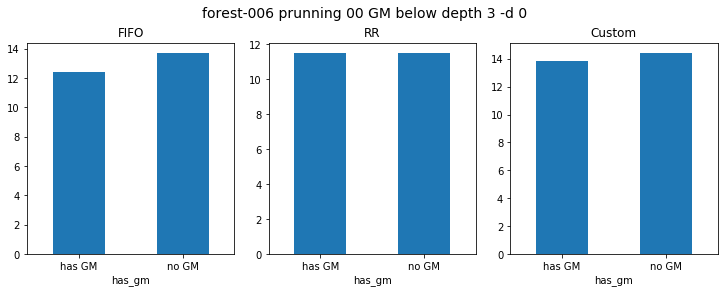

Empty 'DataFrame': no numeric data to plot
forest-007 not found


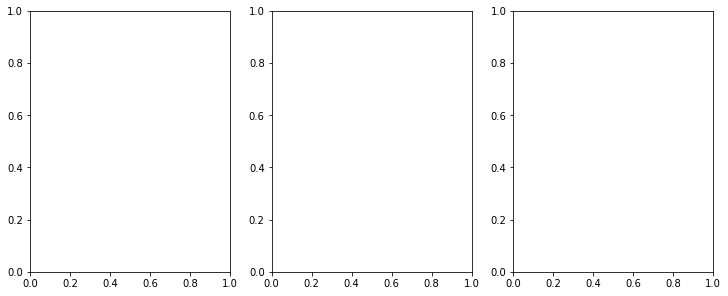

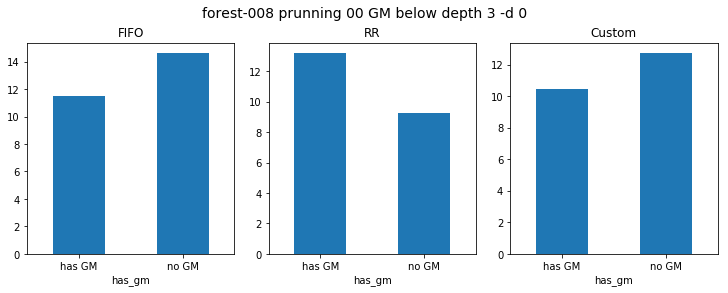

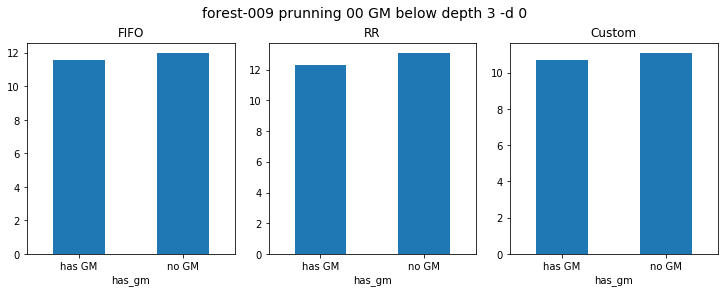

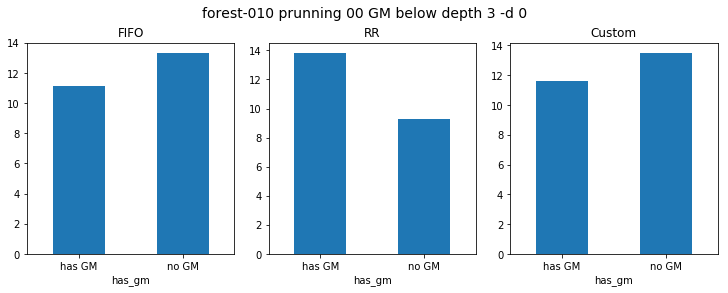

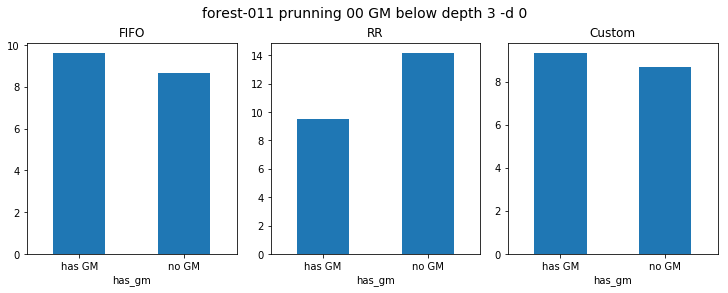

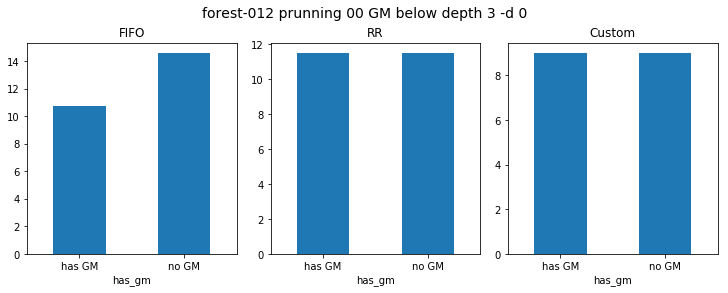

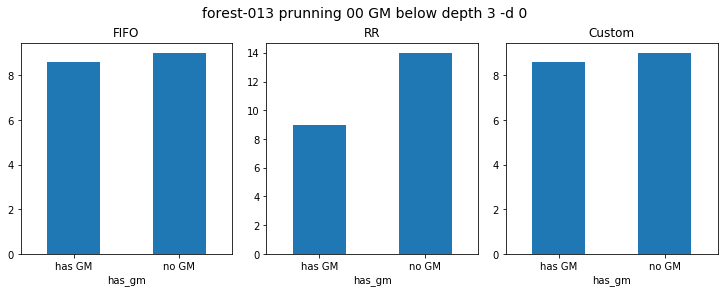

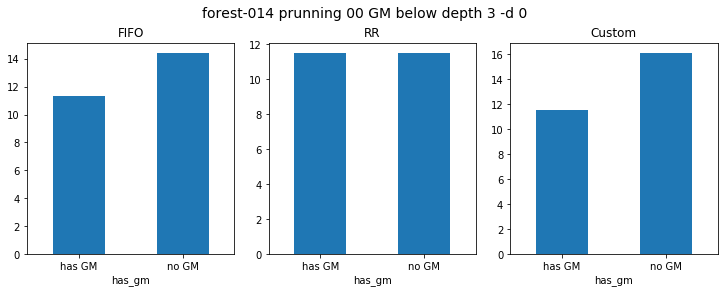

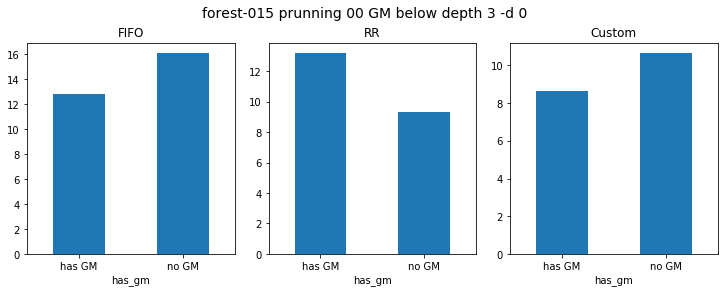

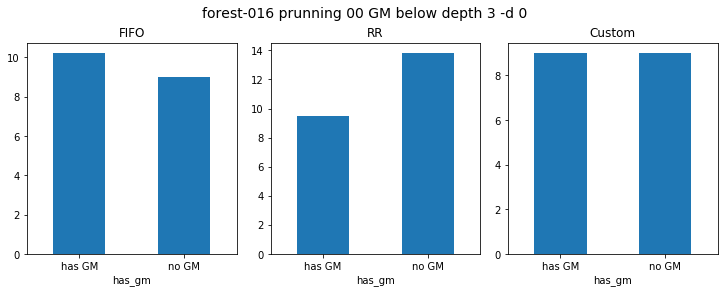

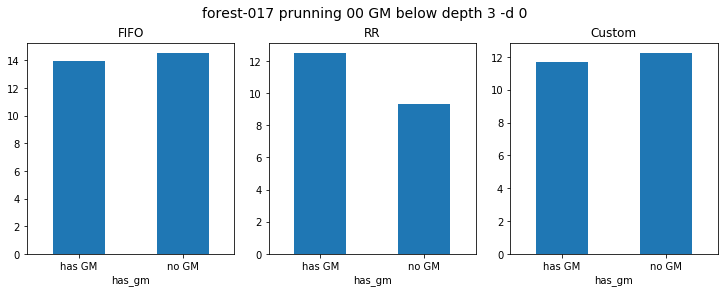

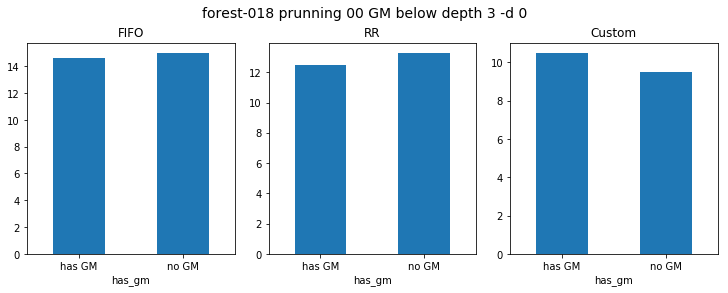

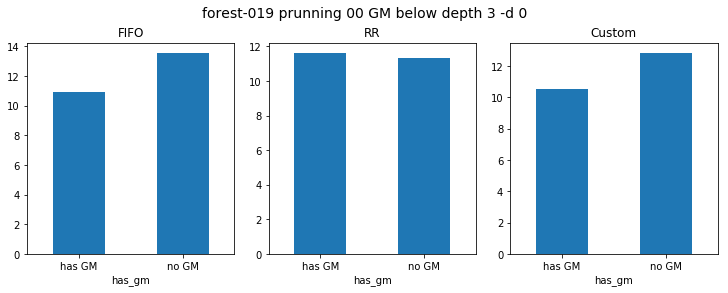

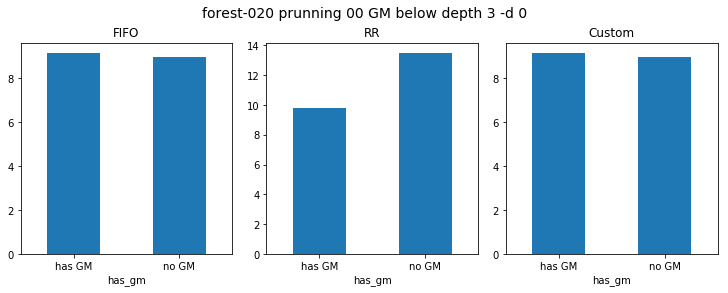

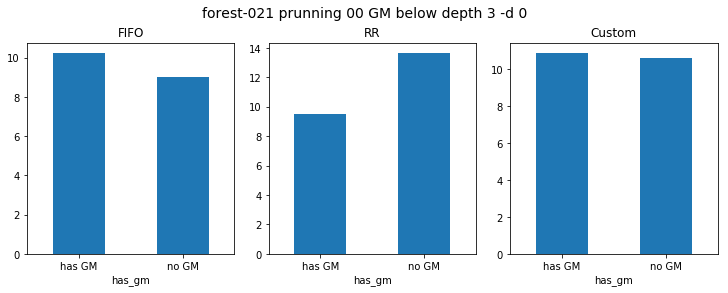

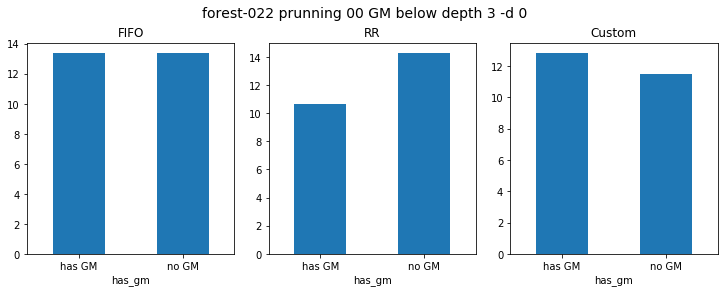

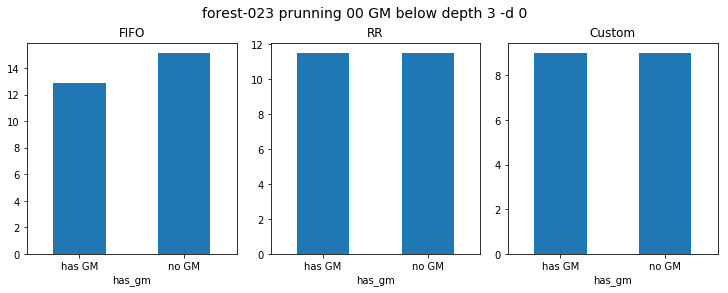

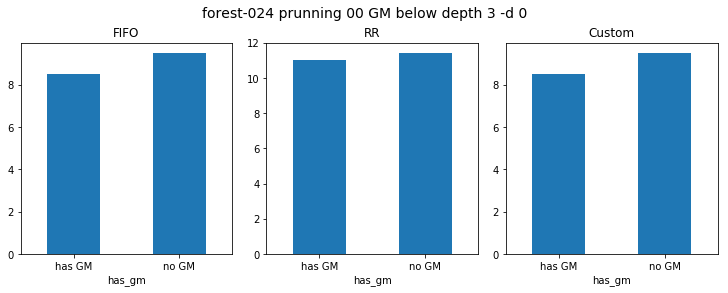

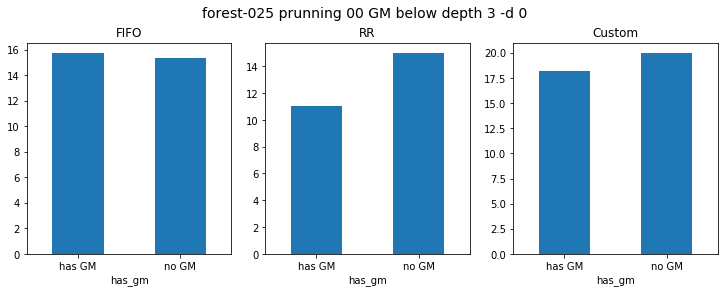

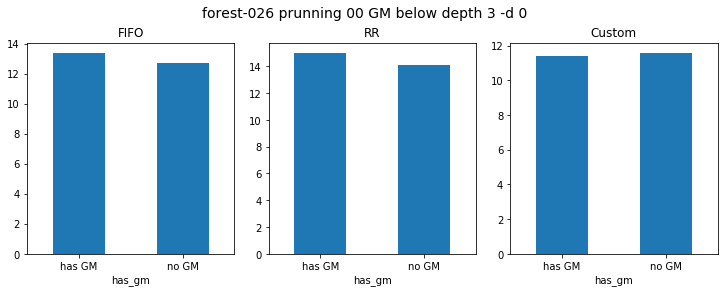

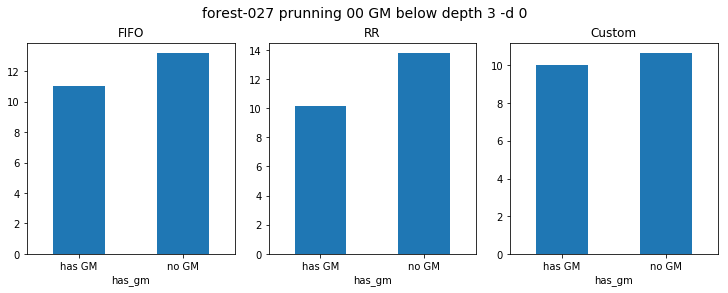

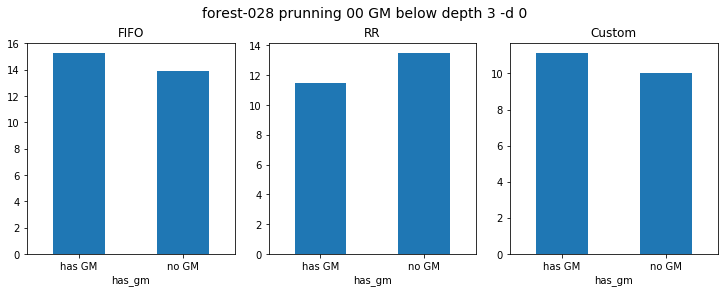

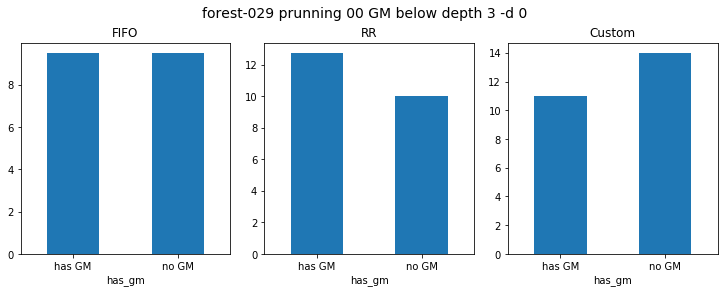

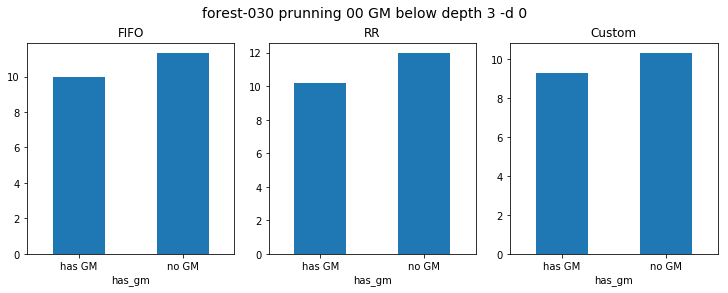

In [ ]:
plot_many4(df00above_00_ff, df00above_00_rr, df00above_00_cus, "FIFO", "RR", "Custom", "above00", "prunning 00 GM below depth 3 -d 0")

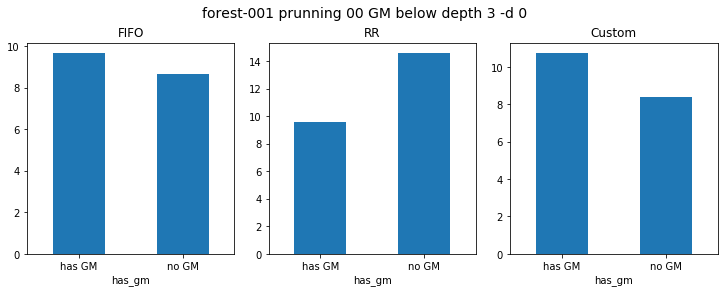

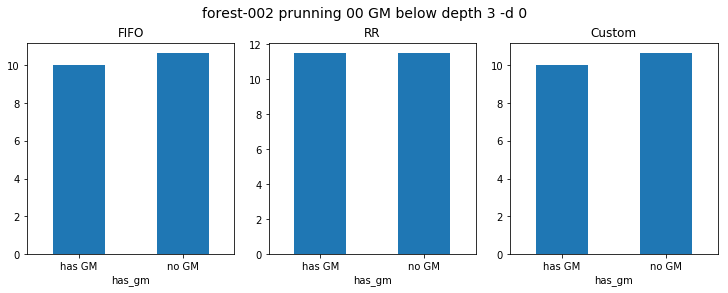

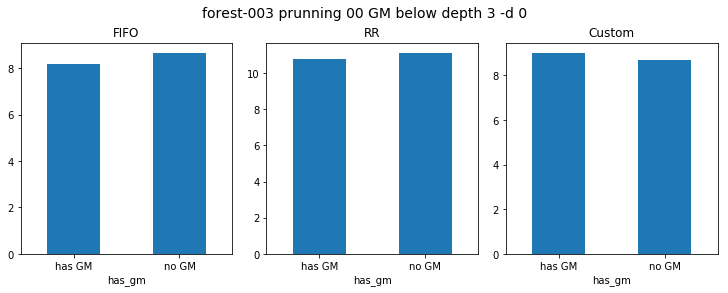

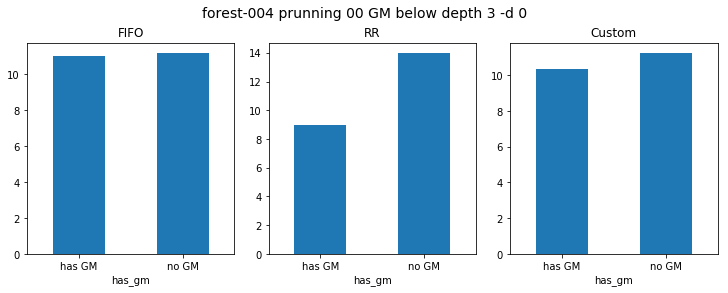

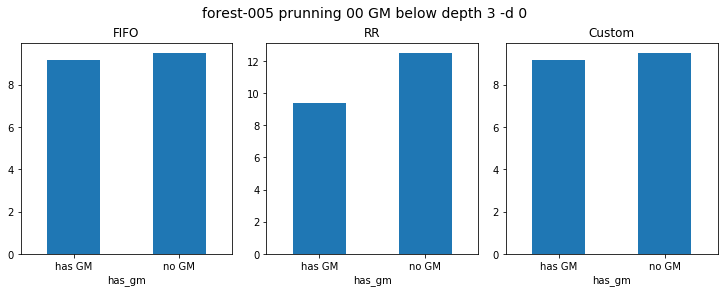

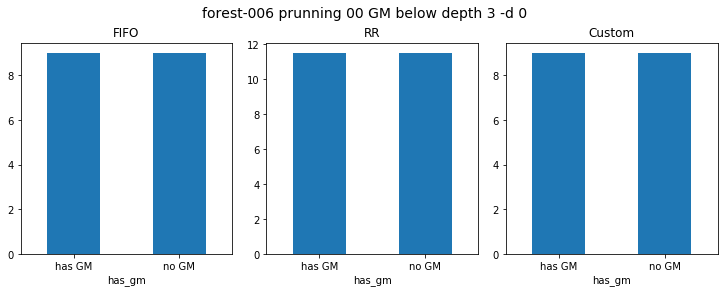

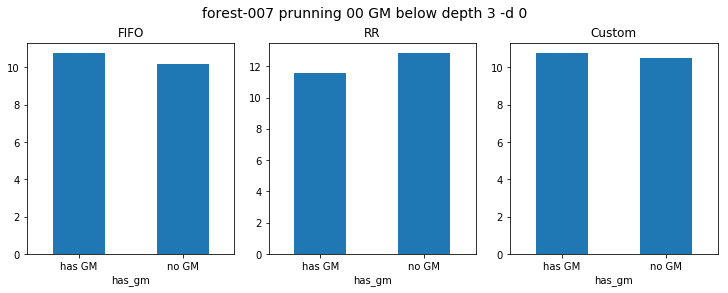

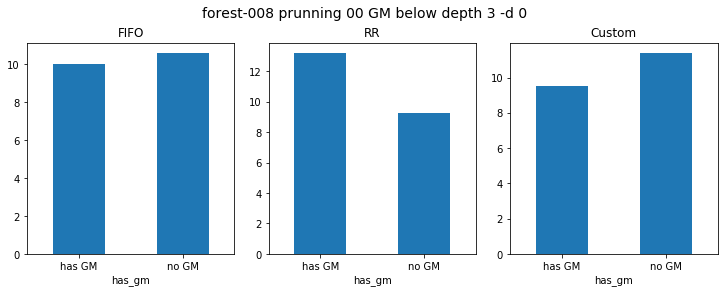

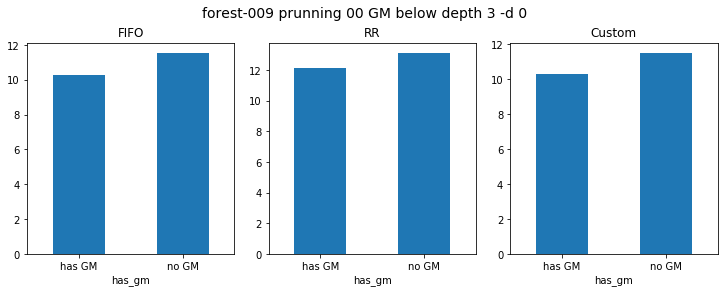

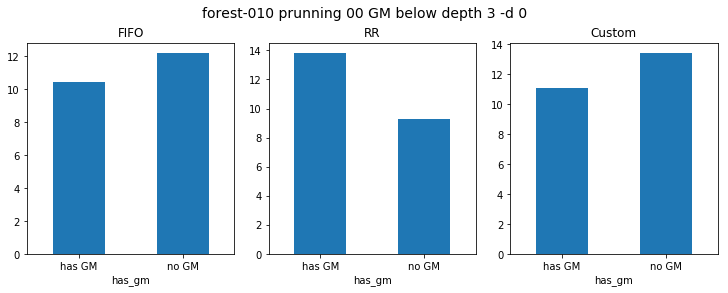

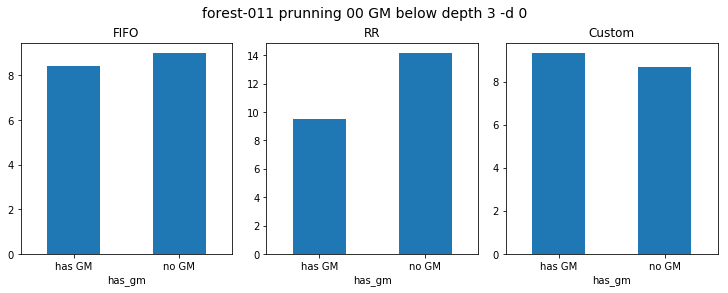

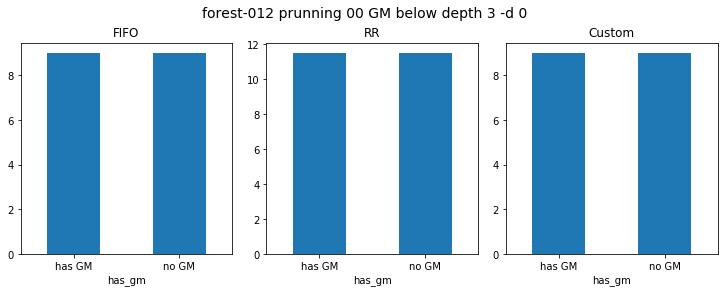

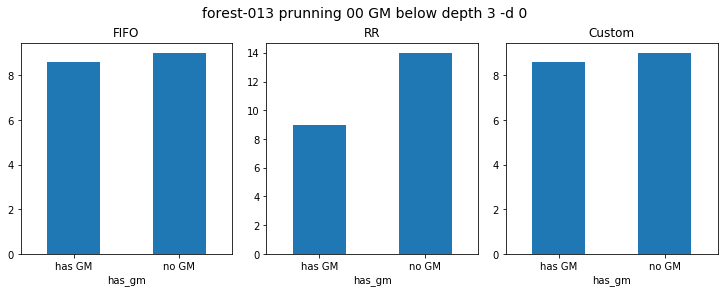

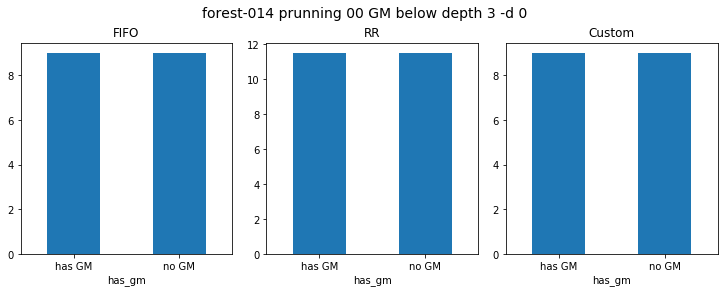

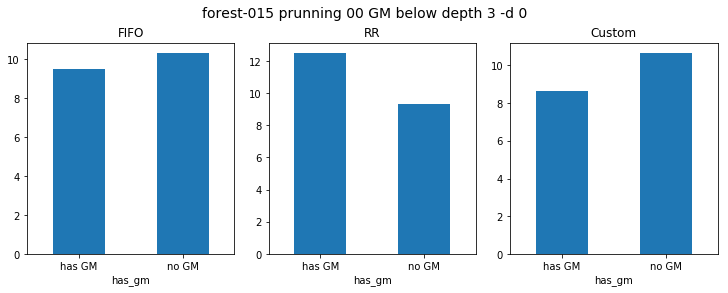

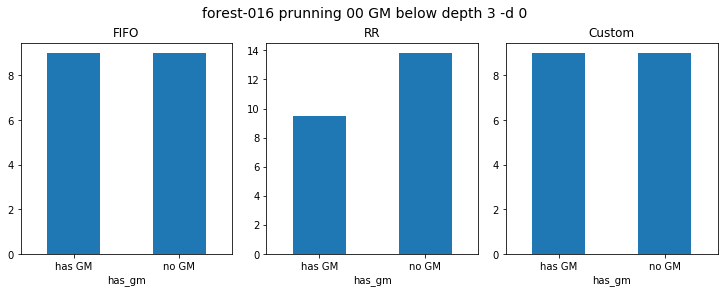

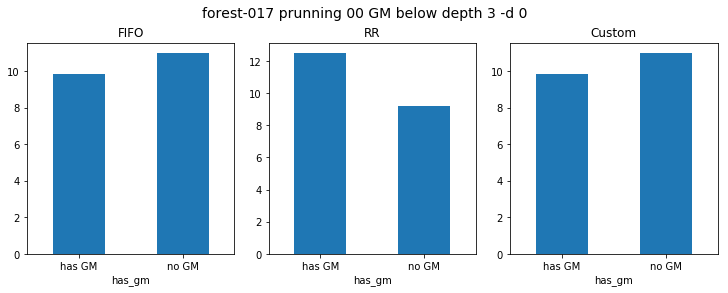

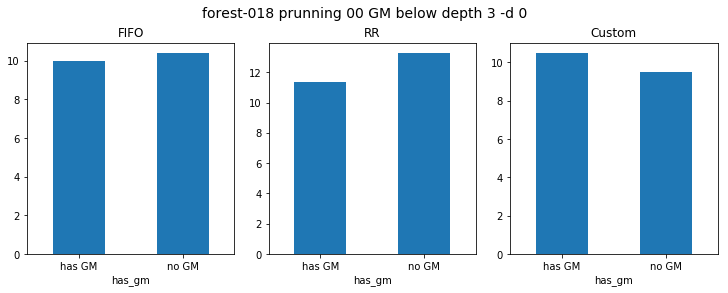

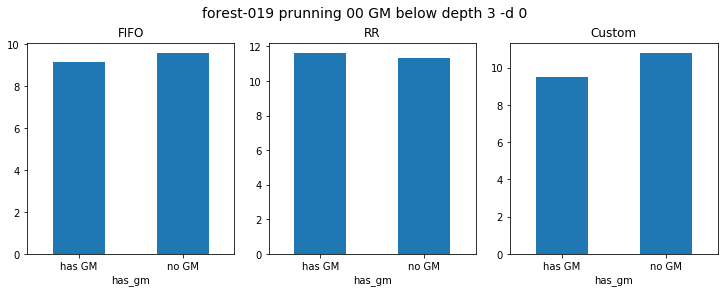

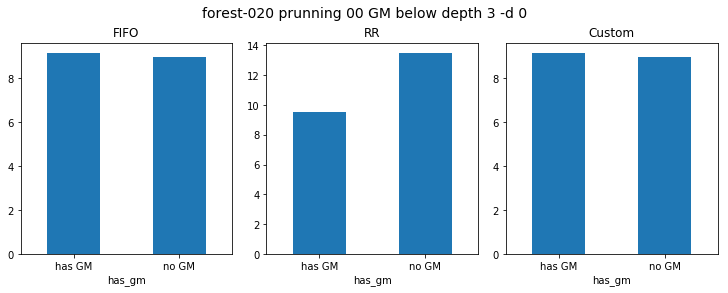

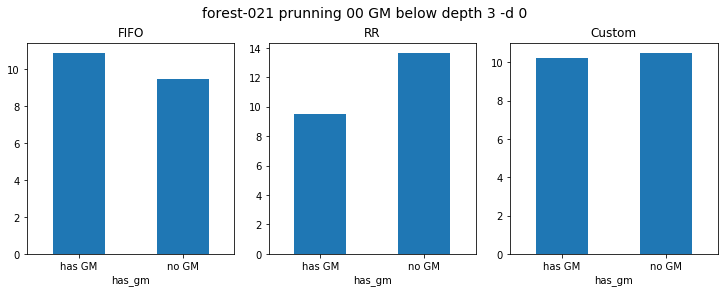

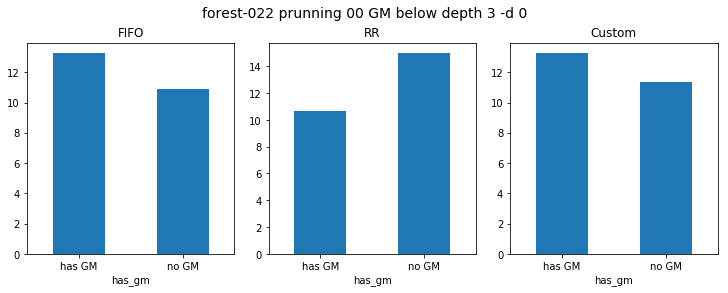

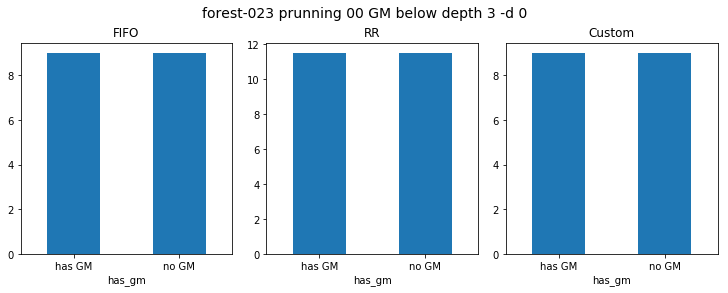

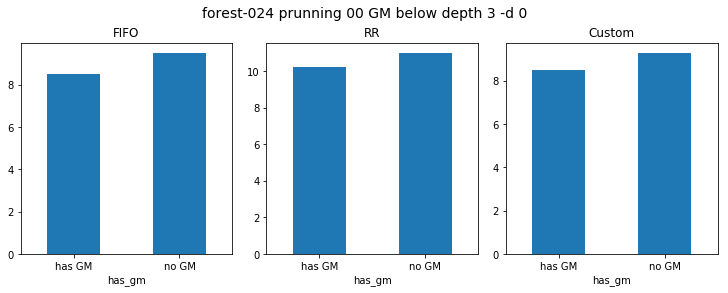

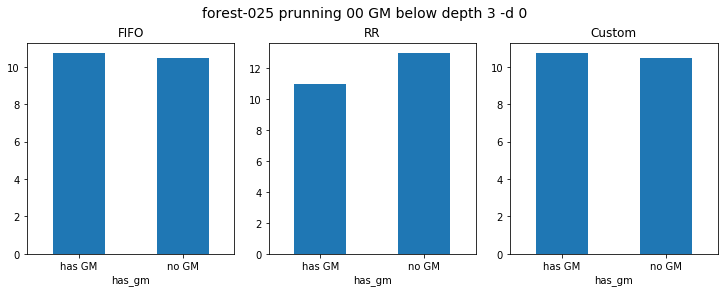

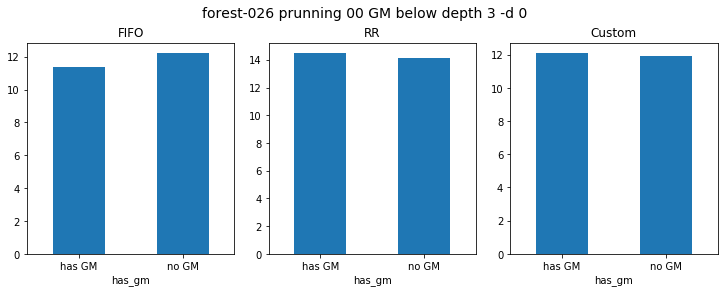

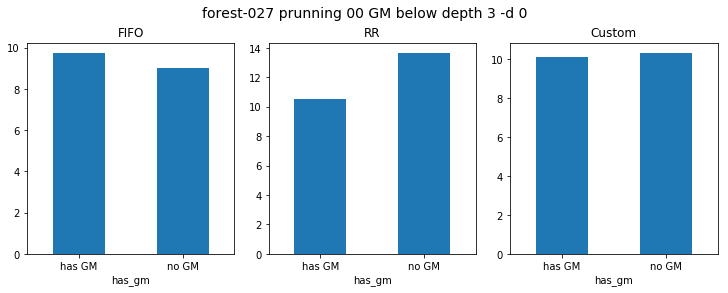

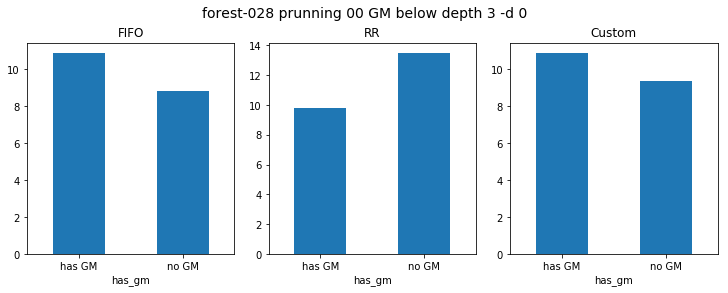

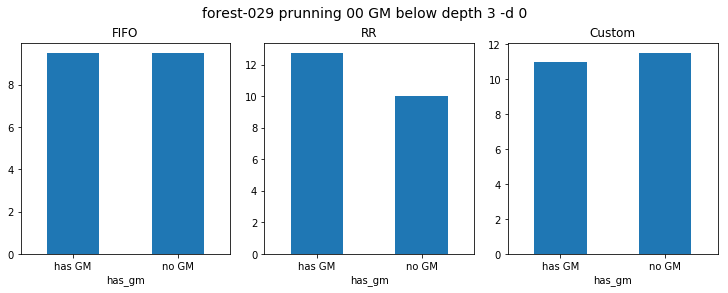

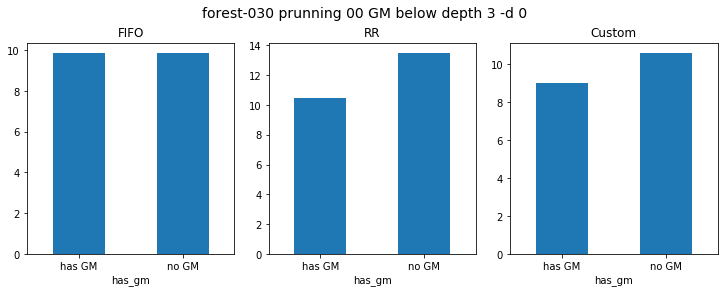

In [ ]:
plot_many4(df00bellow_00_ff, df00bellow_00_rr, df00bellow_00_cus,"FIFO", "RR", "Custom", "below00", "prunning 00 GM below depth 3 -d 0")

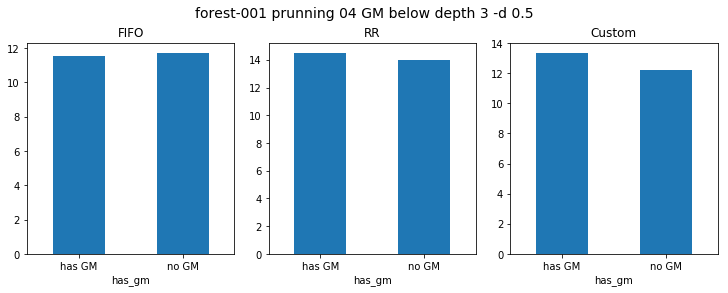

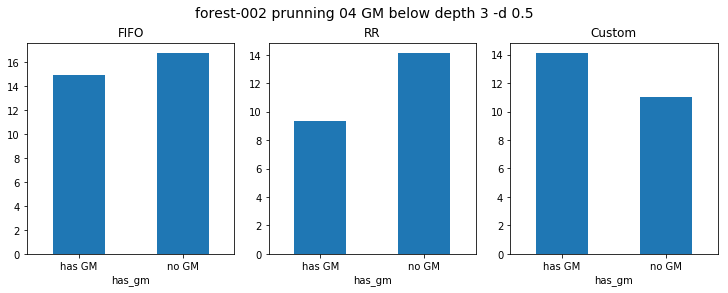

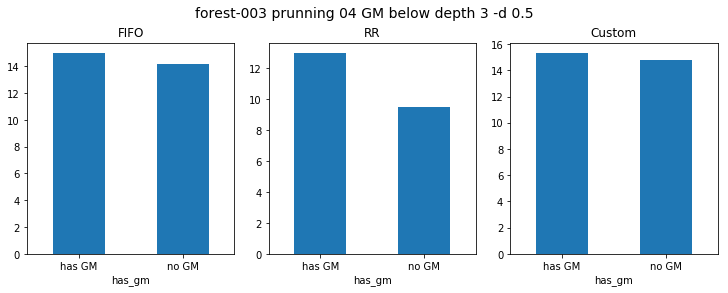

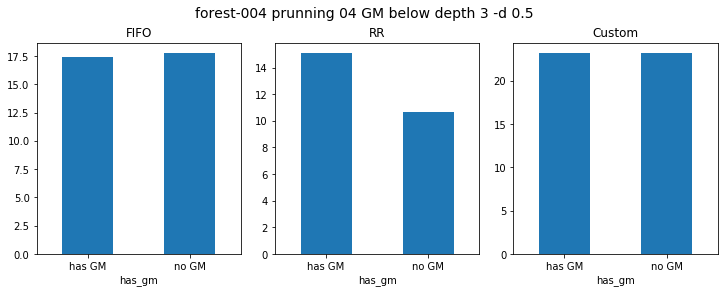

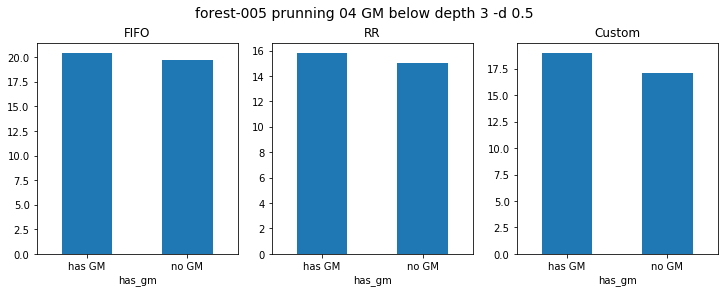

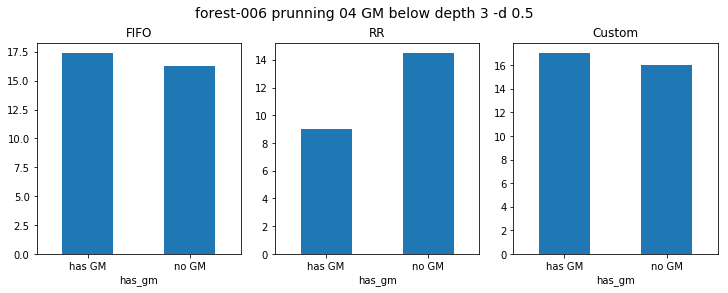

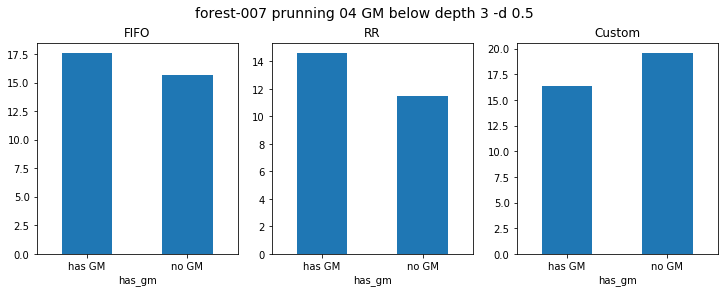

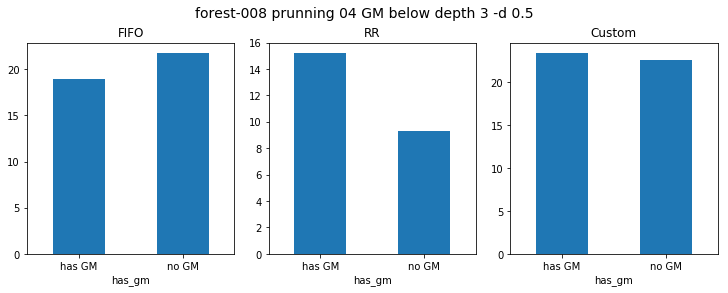

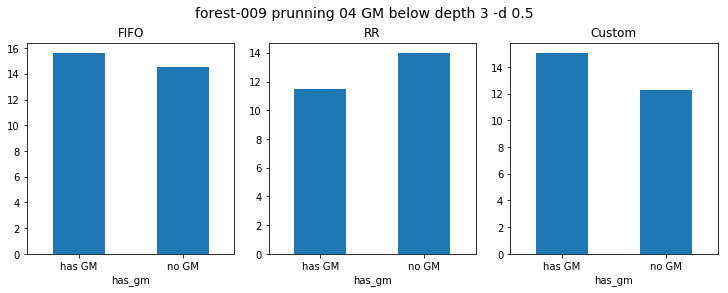

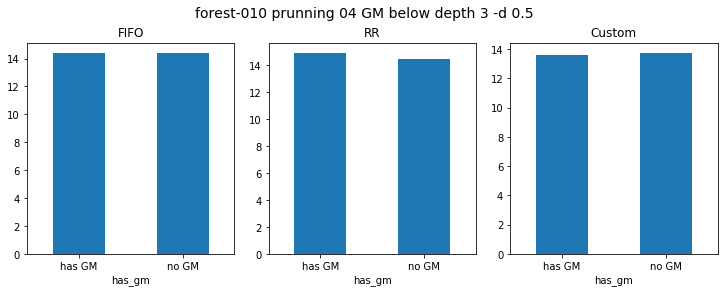

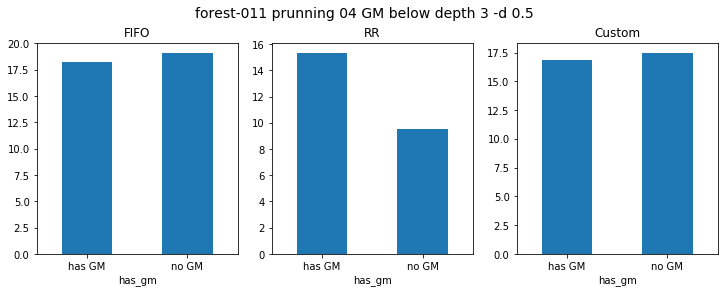

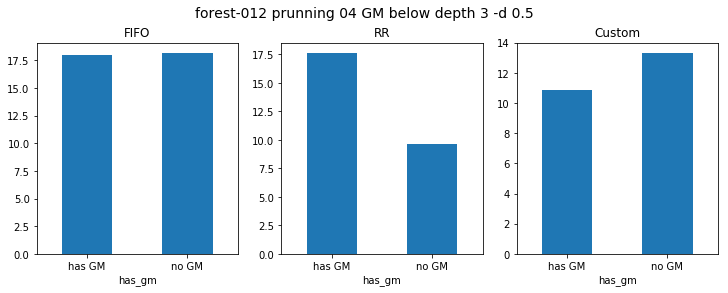

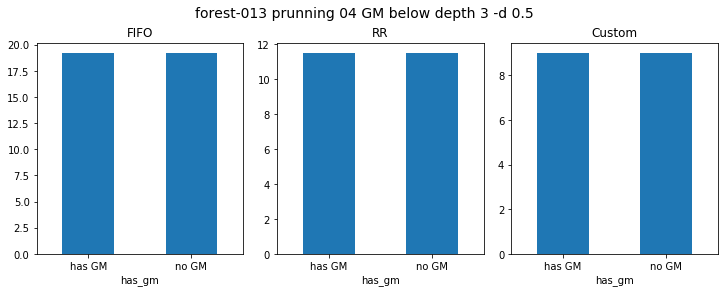

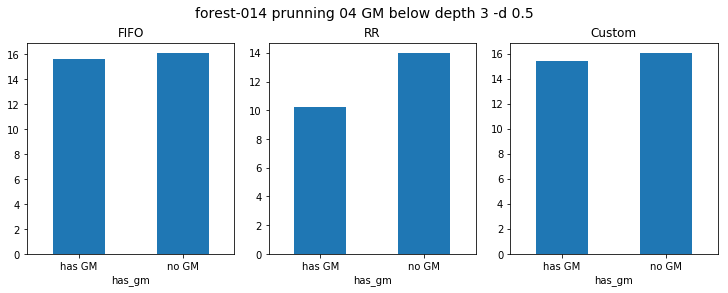

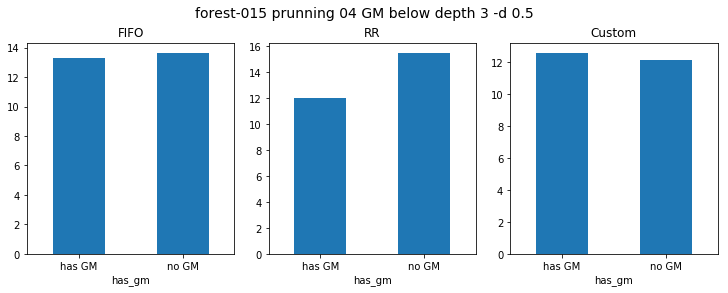

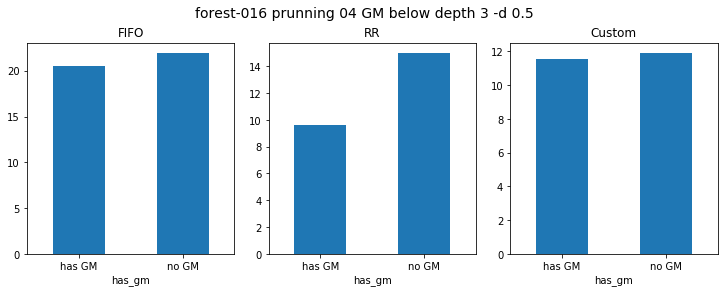

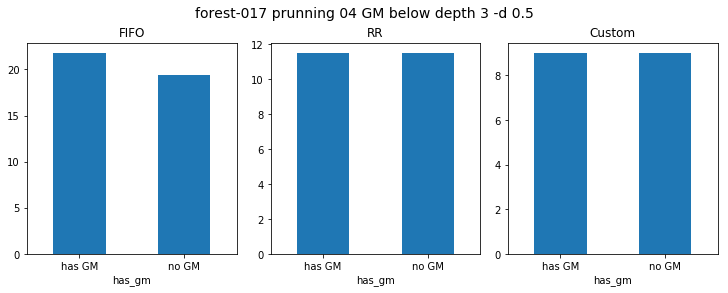

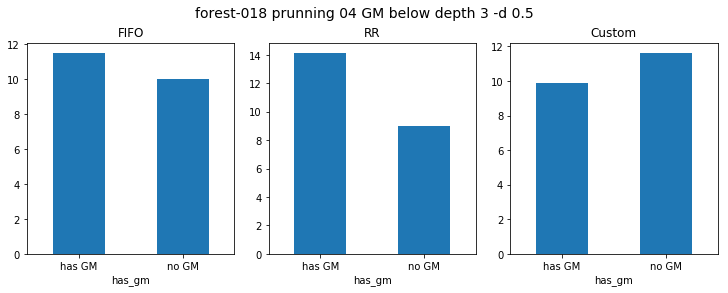

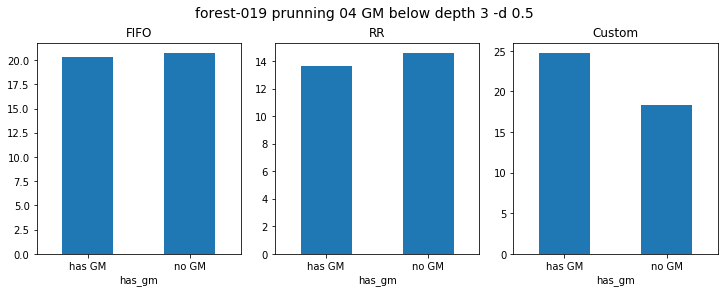

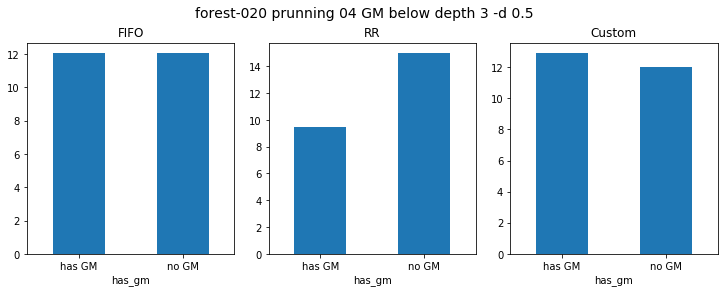

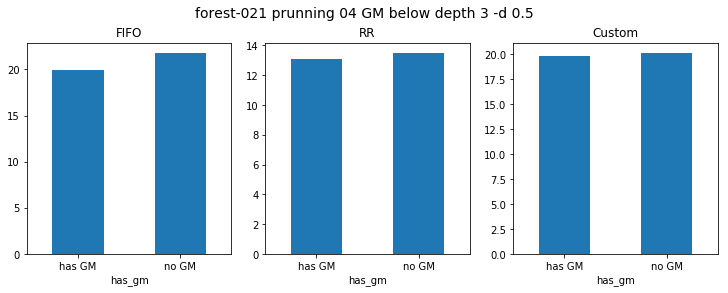

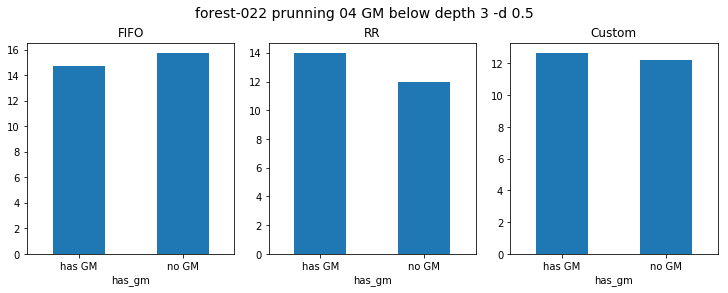

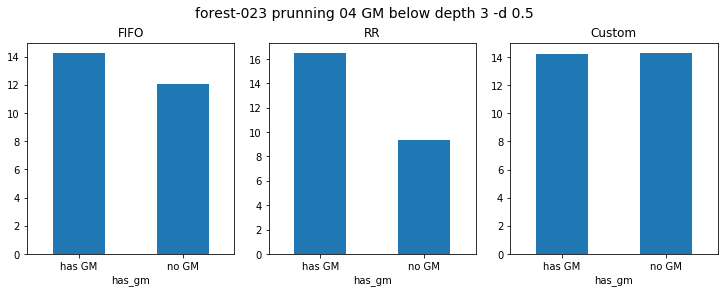

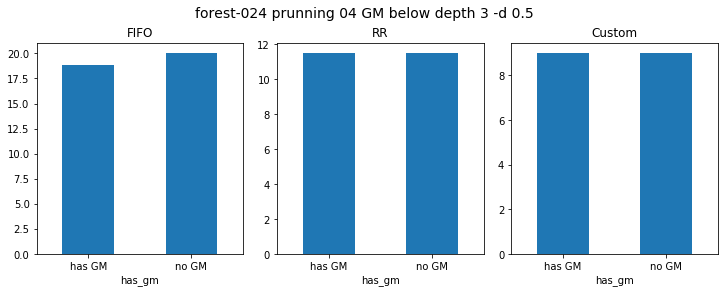

Empty 'DataFrame': no numeric data to plot
forest-025 not found


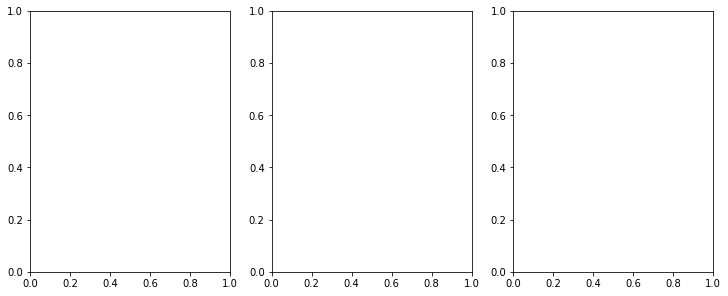

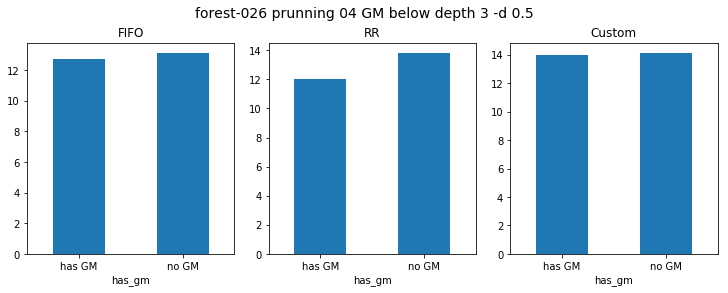

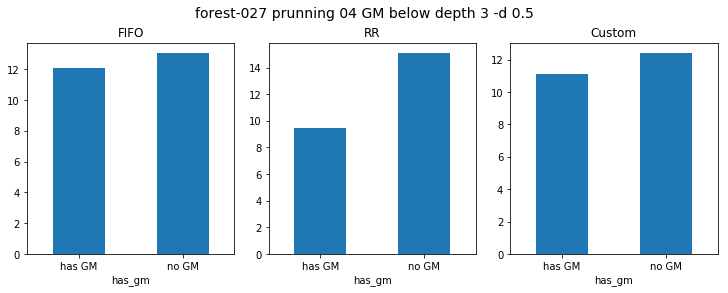

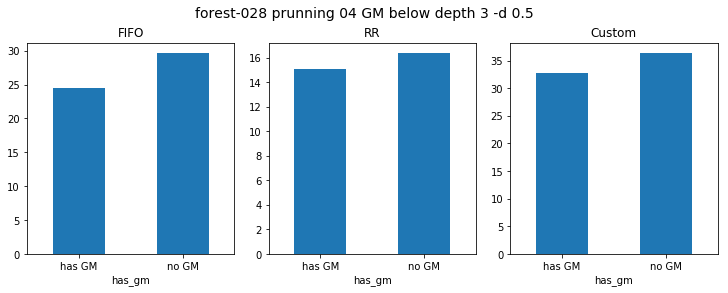

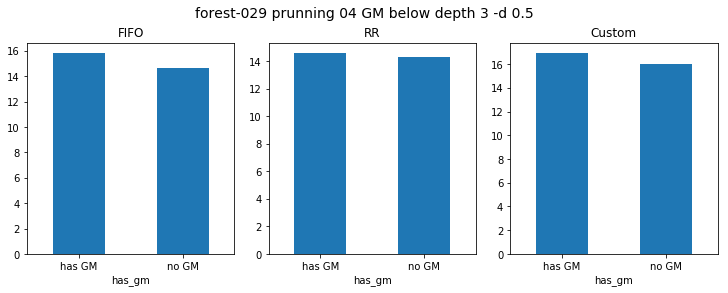

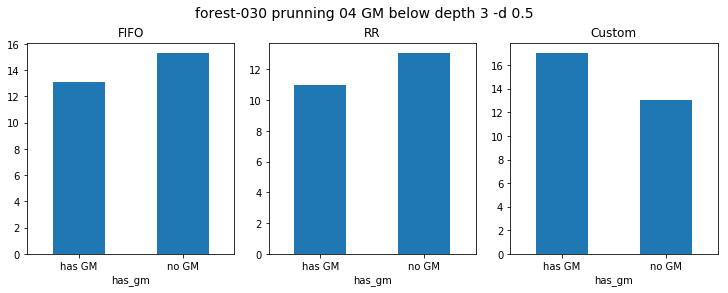

In [ ]:
plot_many4(df04above_05_ff, df04above_05_rr, df04above_05_cus,"FIFO", "RR", "Custom", "above04", "prunning 04 GM below depth 3 -d 0.5")

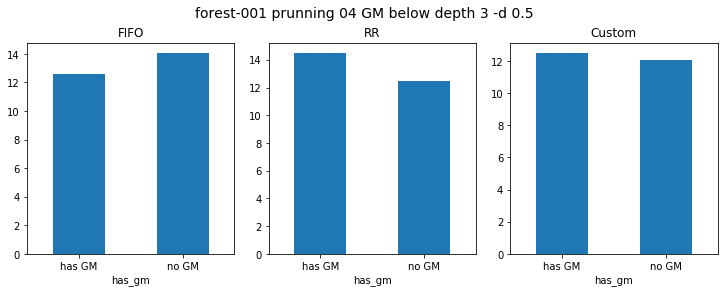

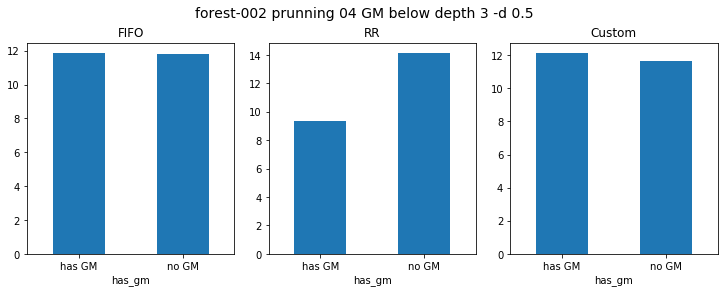

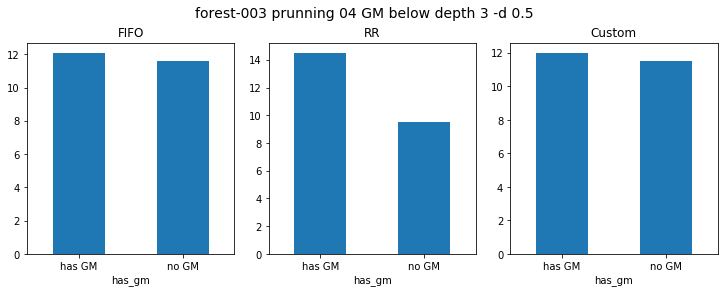

Empty 'DataFrame': no numeric data to plot
forest-004 not found


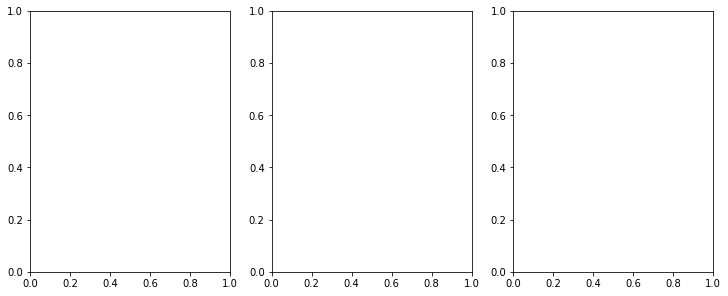

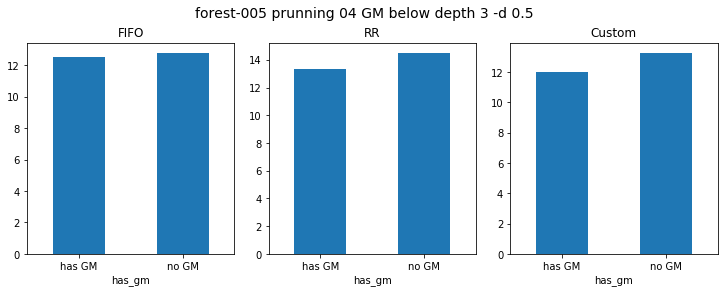

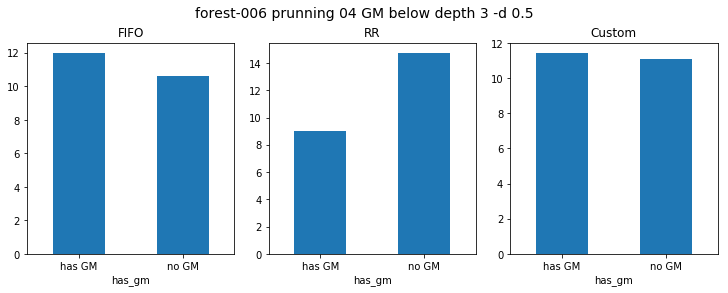

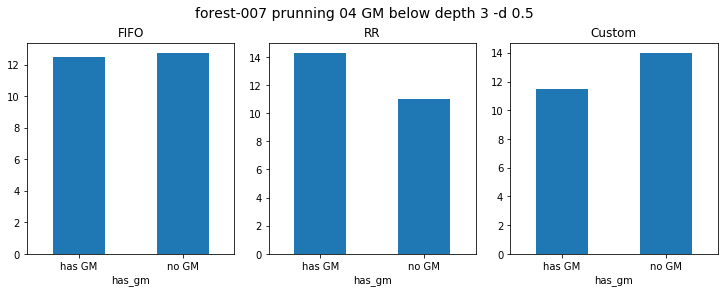

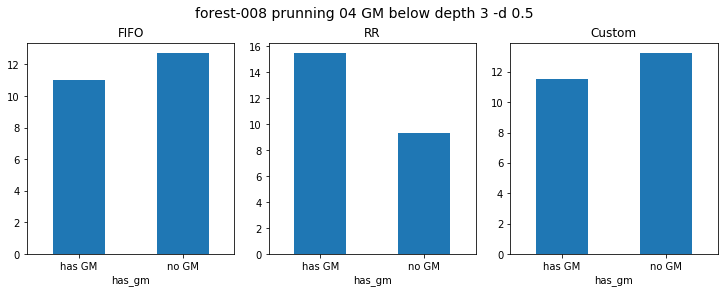

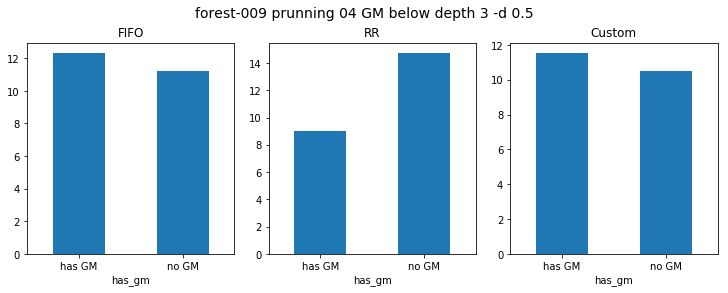

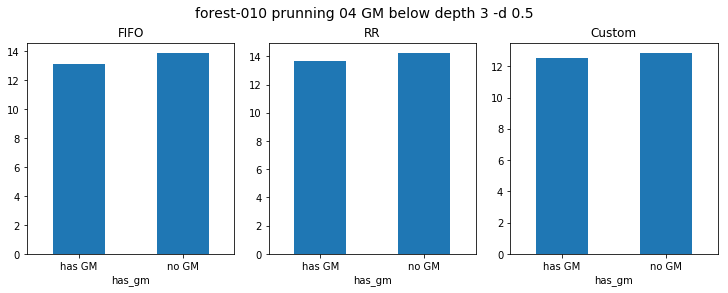

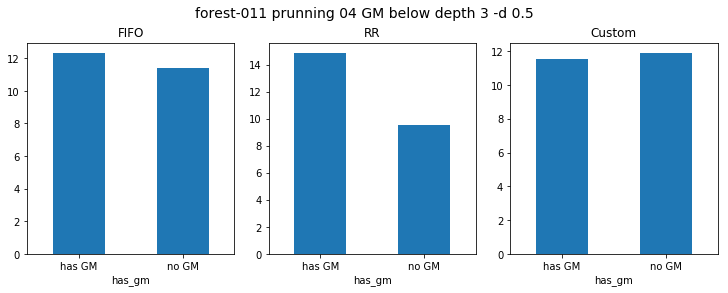

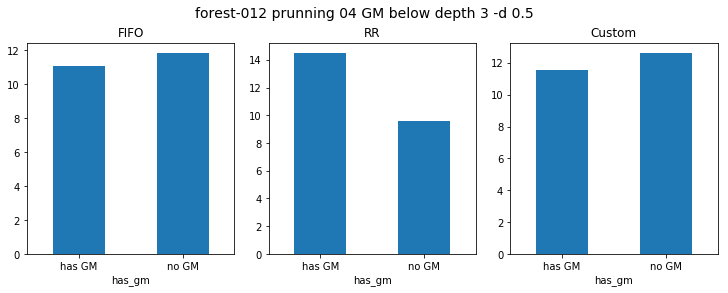

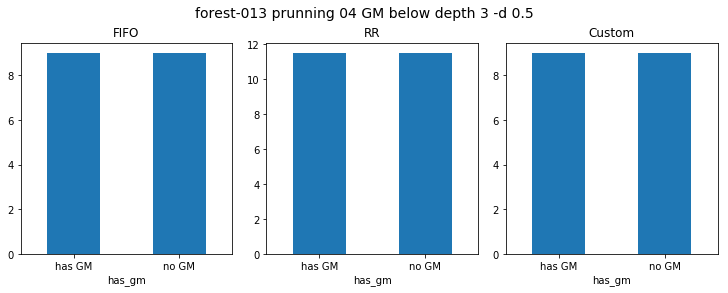

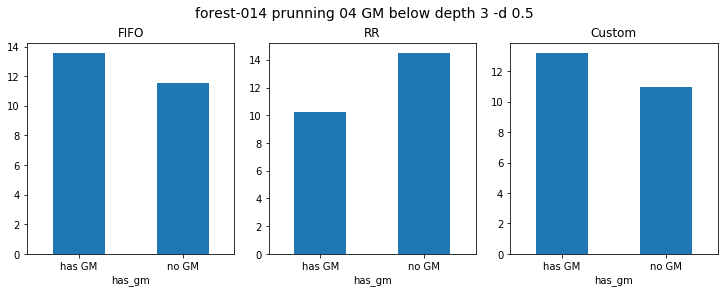

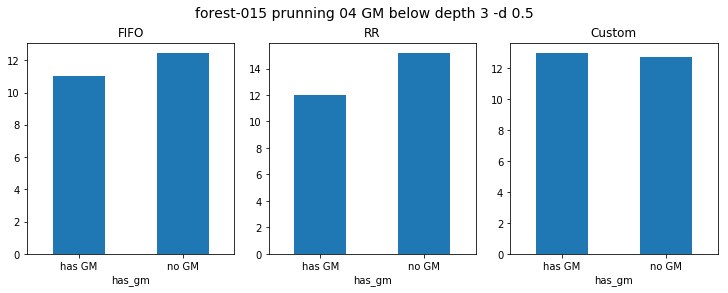

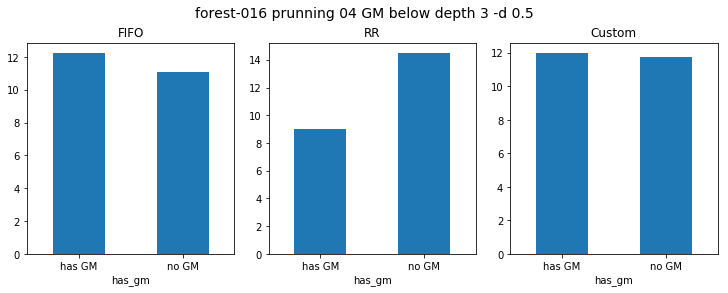

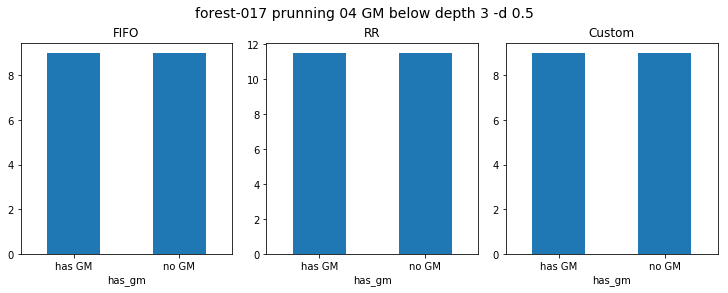

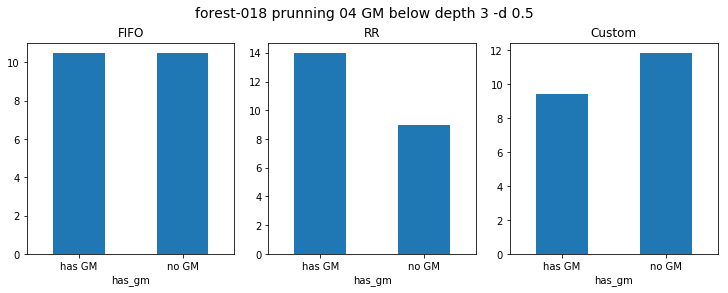

Empty 'DataFrame': no numeric data to plot
forest-019 not found


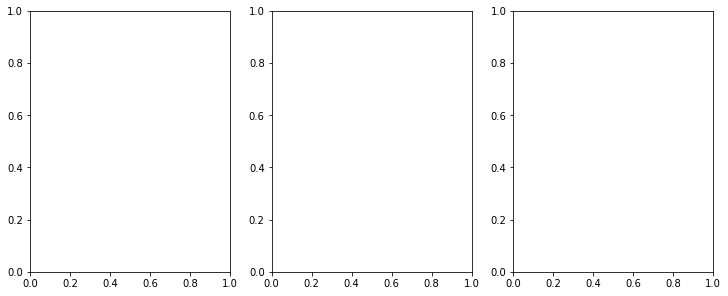

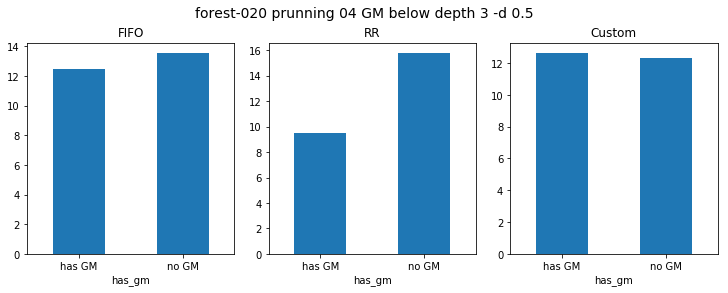

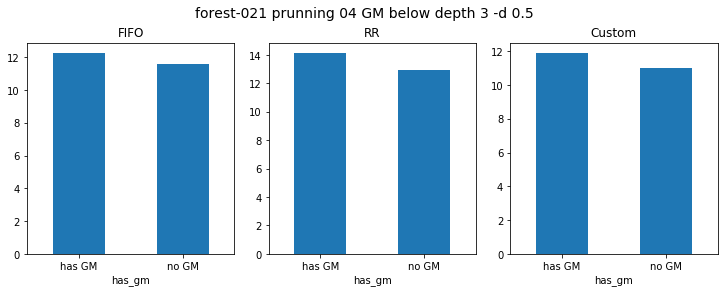

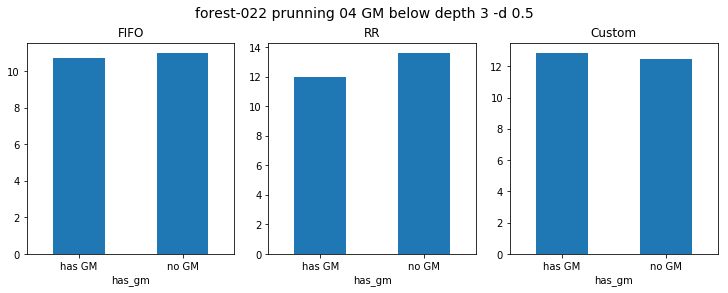

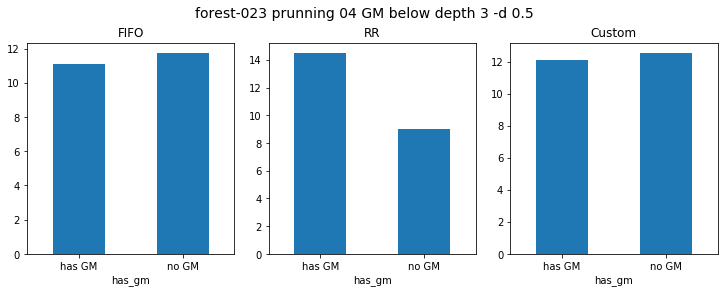

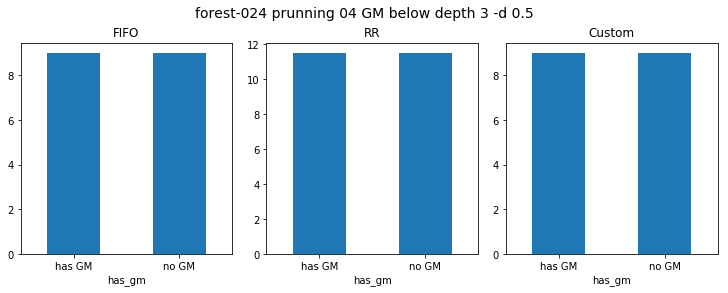

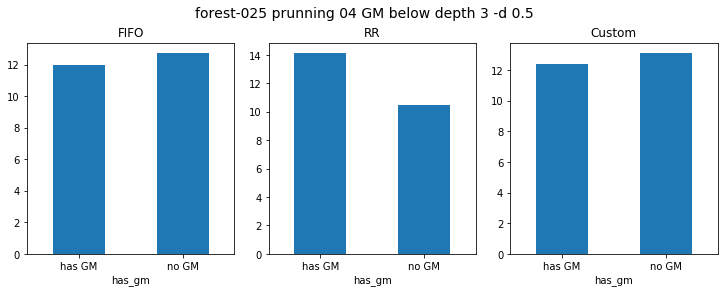

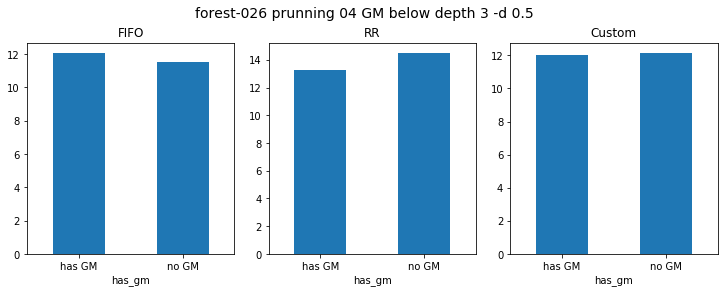

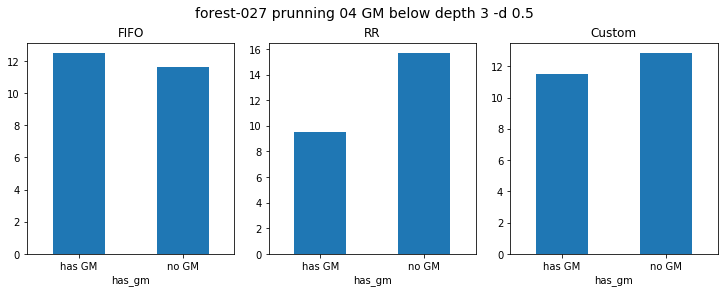

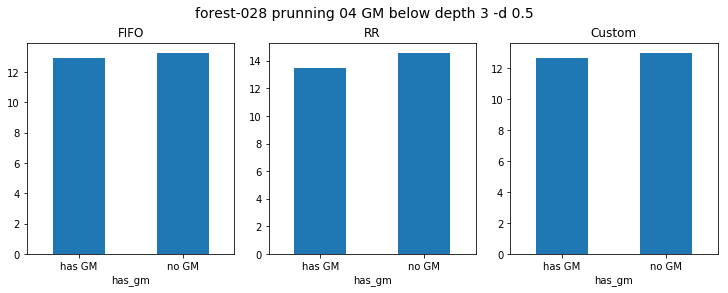

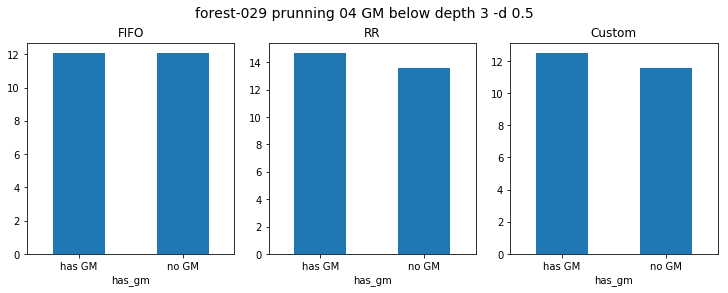

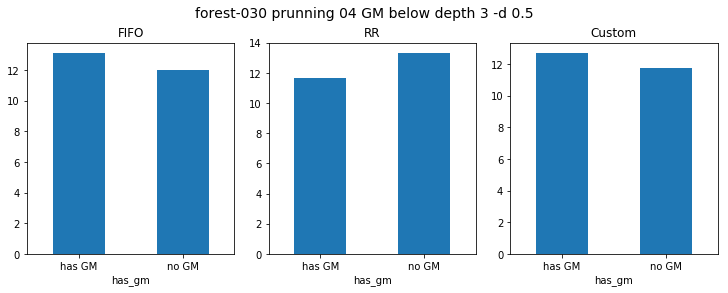

In [ ]:
plot_many4(df04bellow_05_ff, df04bellow_05_rr, df04bellow_05_cus, "FIFO", "RR", "Custom", "below04", "prunning 04 GM below depth 3 -d 0.5")

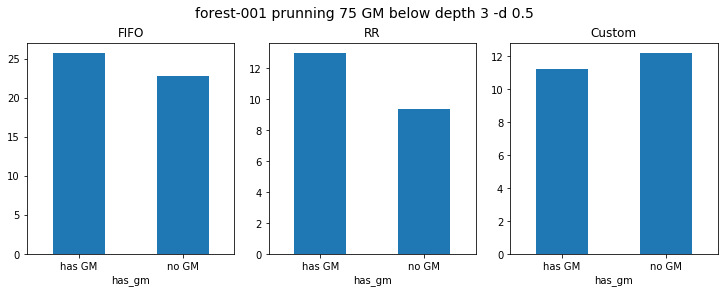

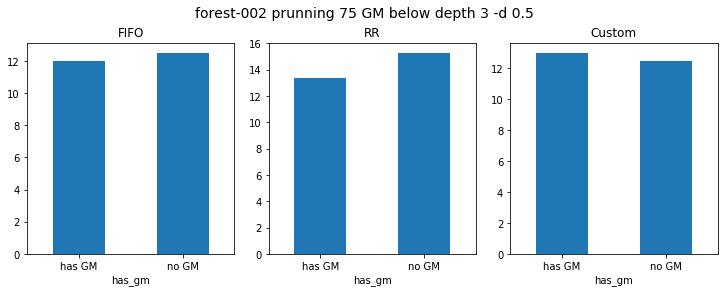

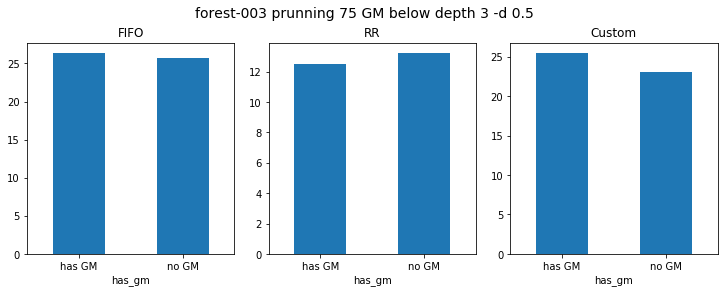

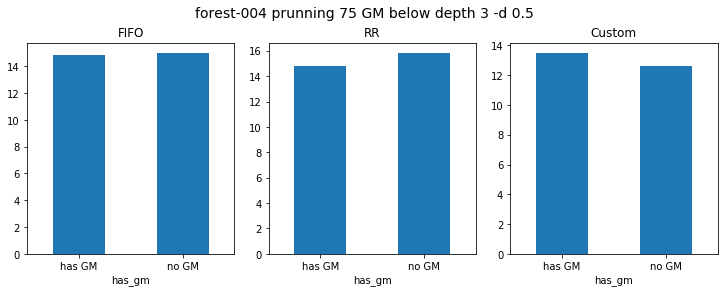

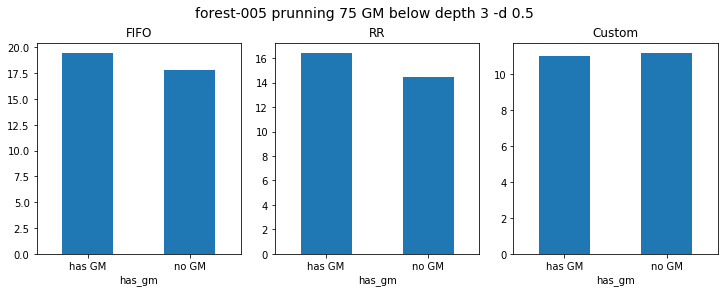

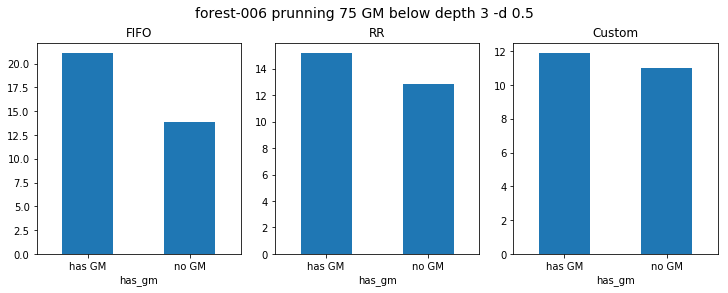

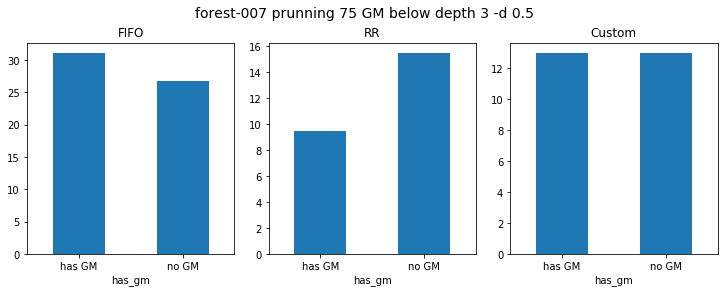

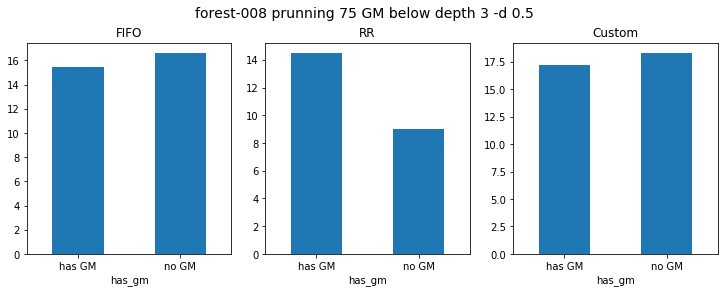

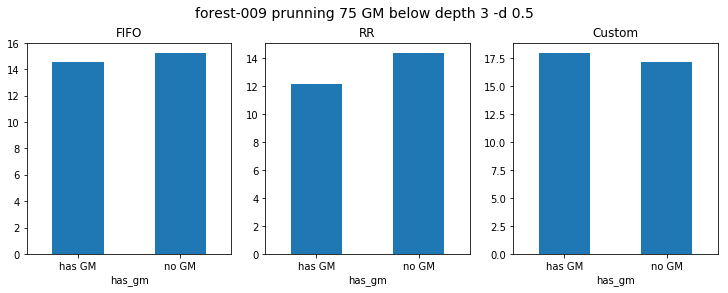

Empty 'DataFrame': no numeric data to plot
forest-010 not found


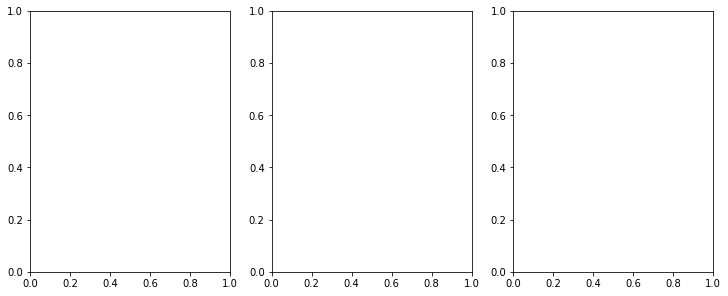

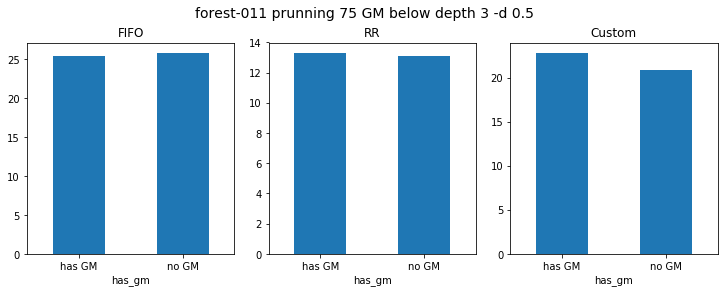

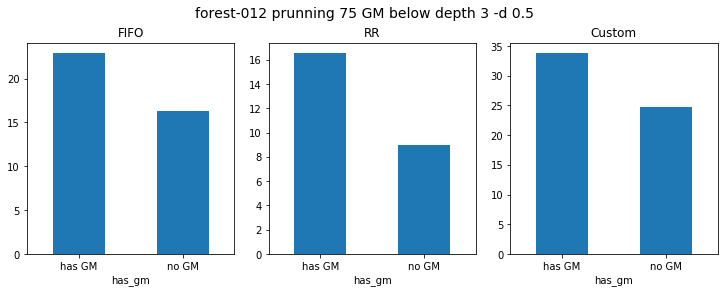

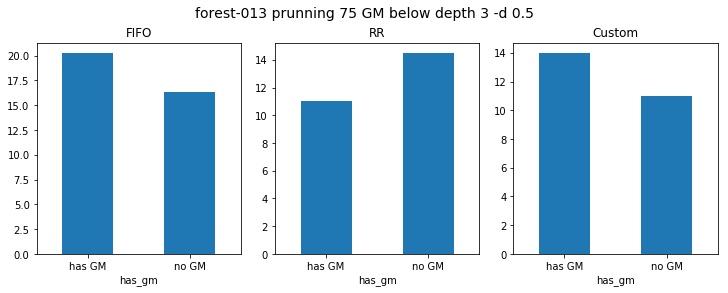

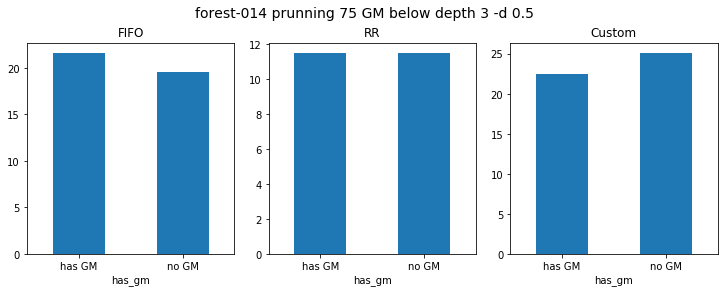

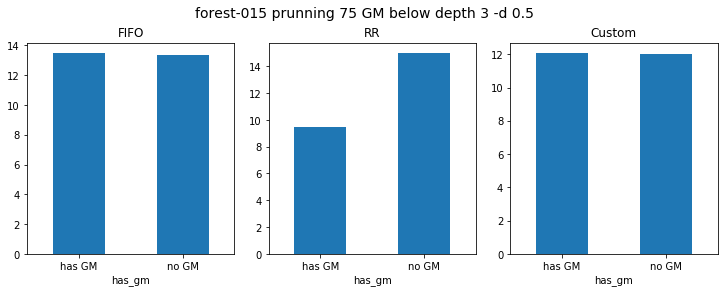

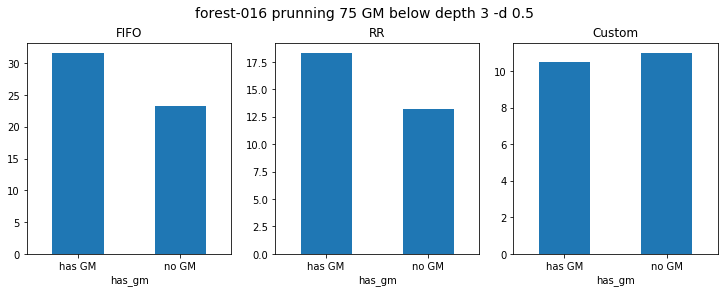

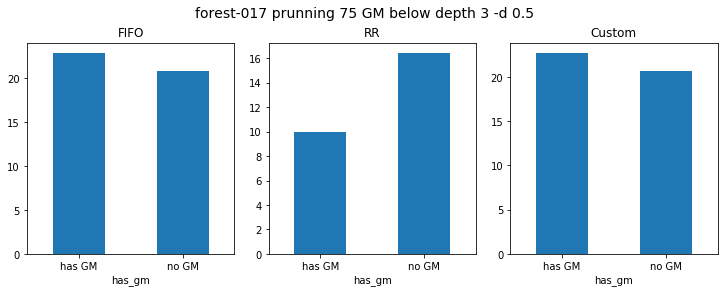

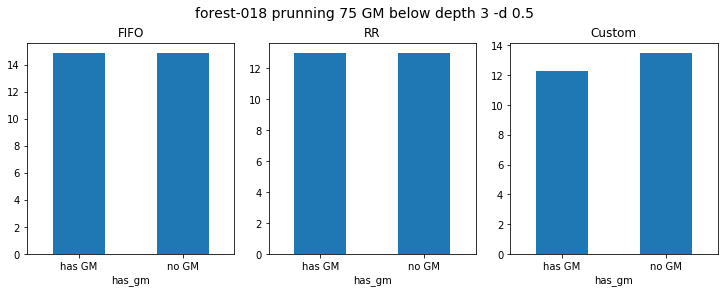

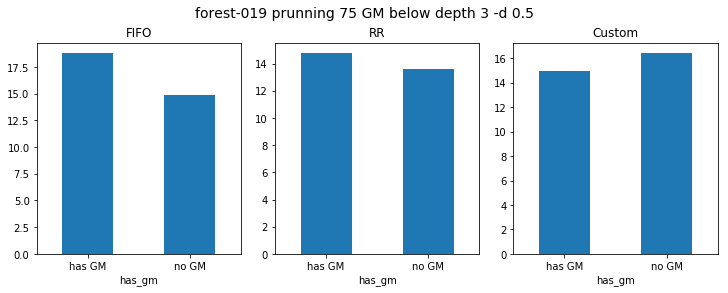

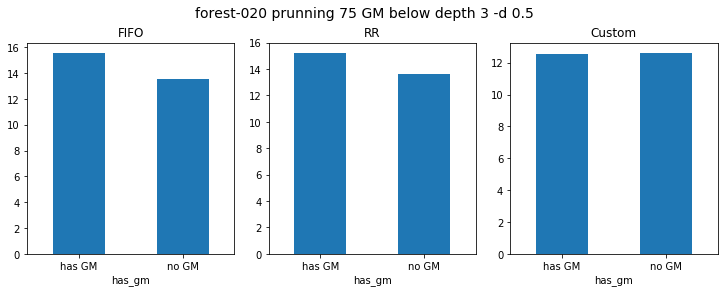

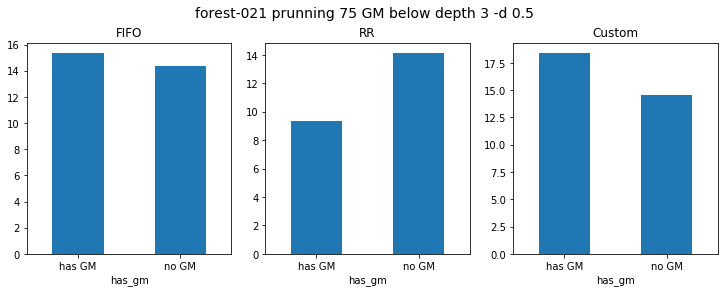

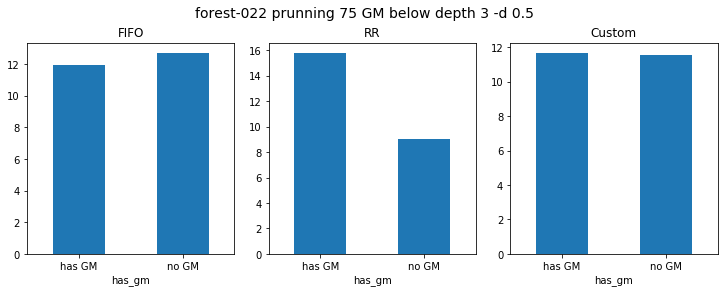

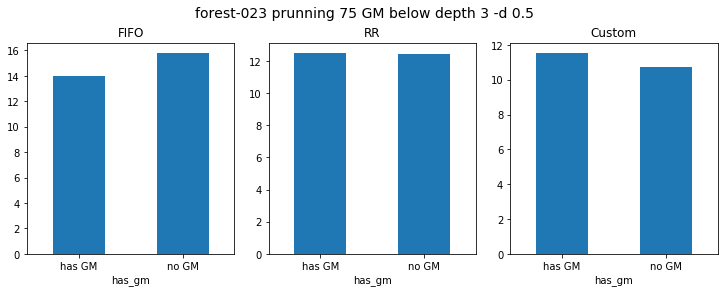

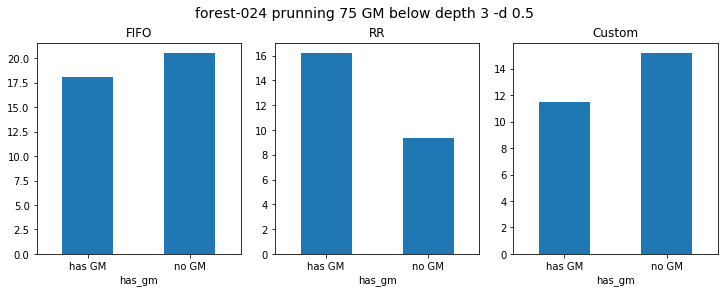

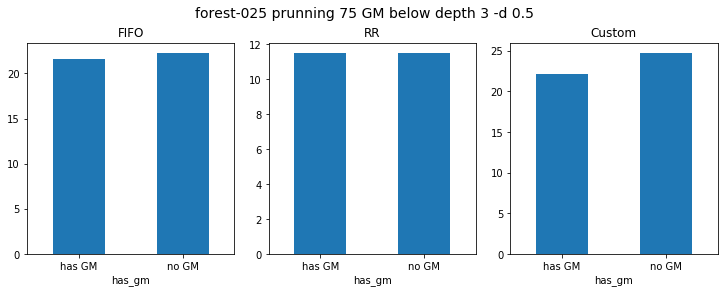

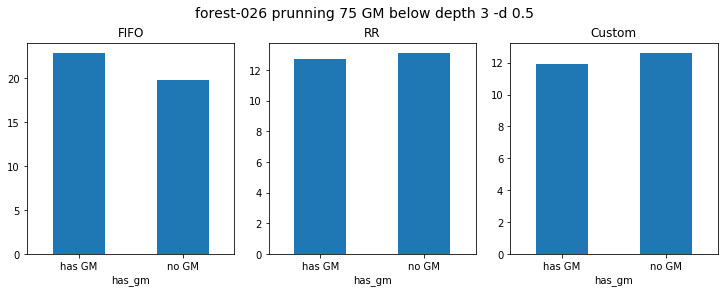

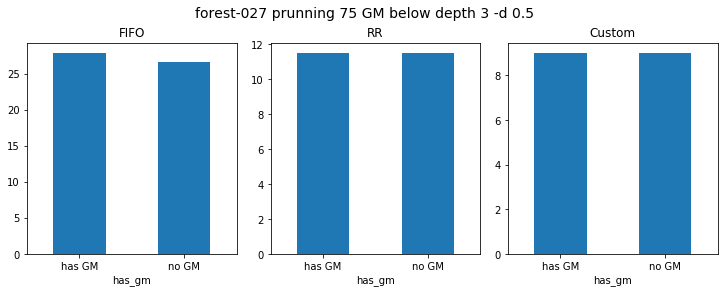

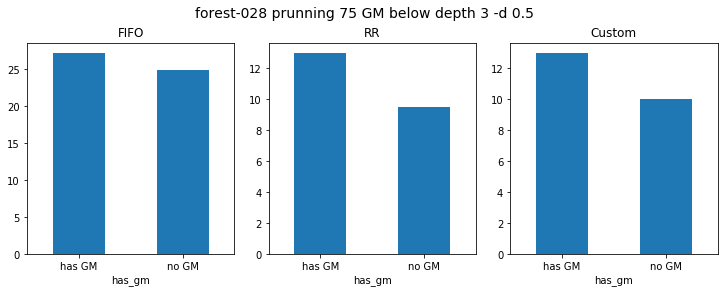

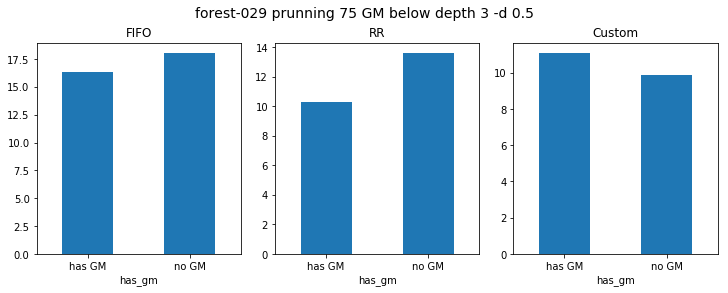

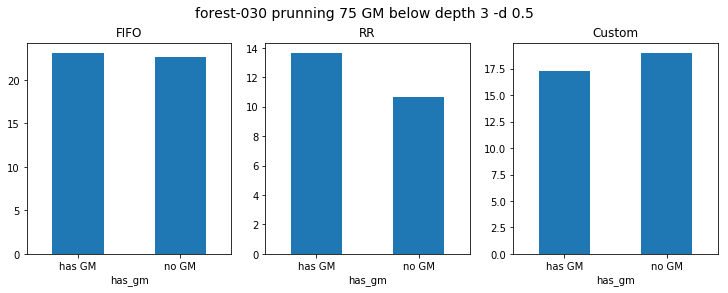

In [ ]:
plot_many4(df75above_05_ff, df75above_05_rr, df75above_05_cus,"FIFO", "RR", "Custom", "above75", "prunning 75 GM below depth 3 -d 0.5")

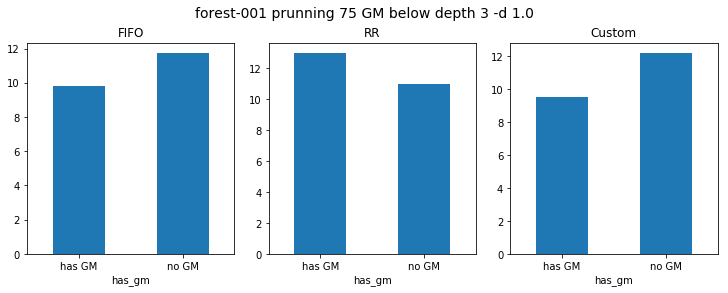

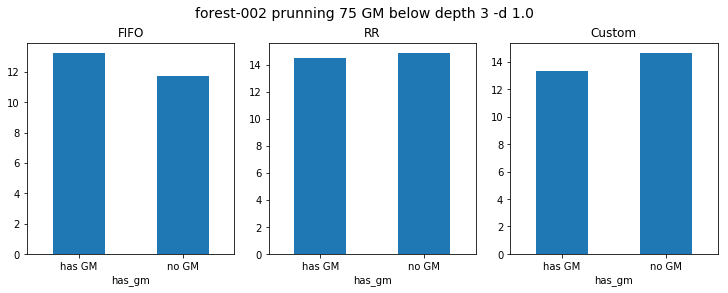

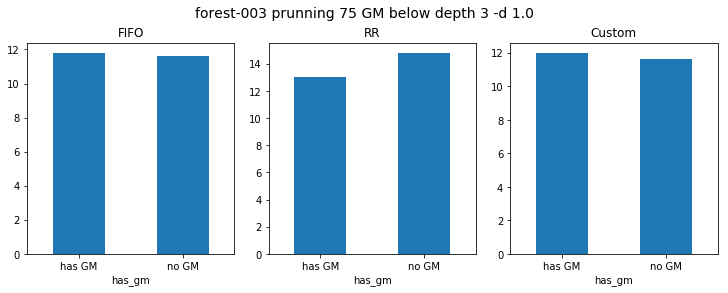

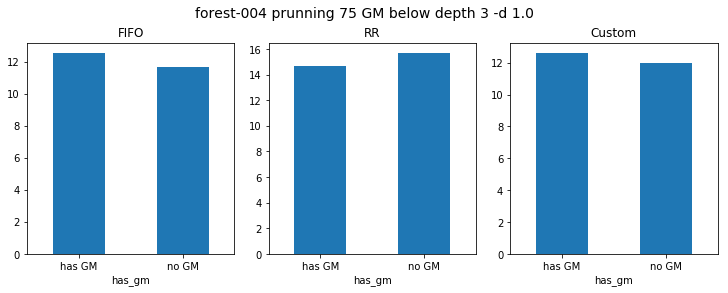

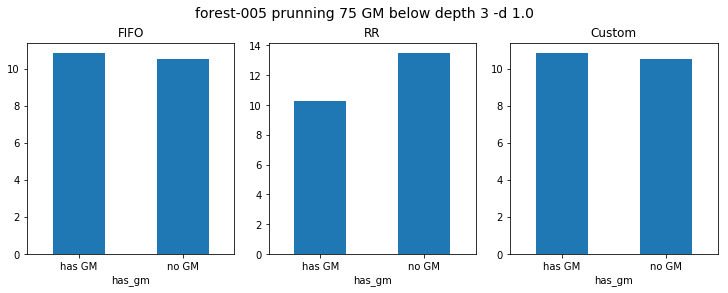

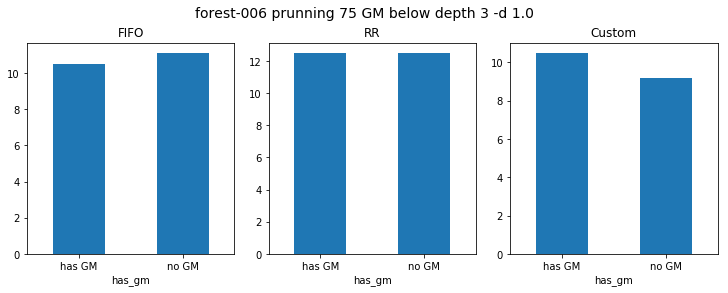

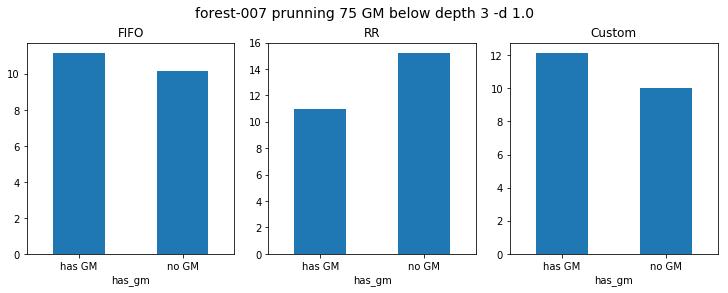

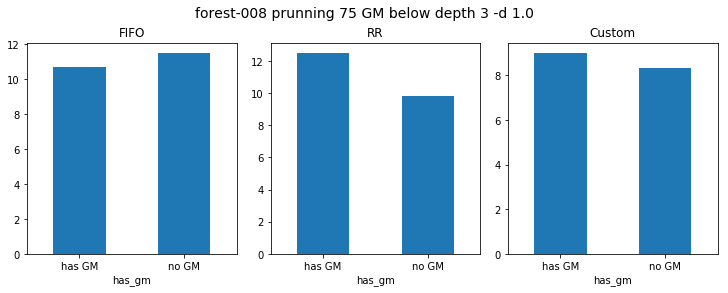

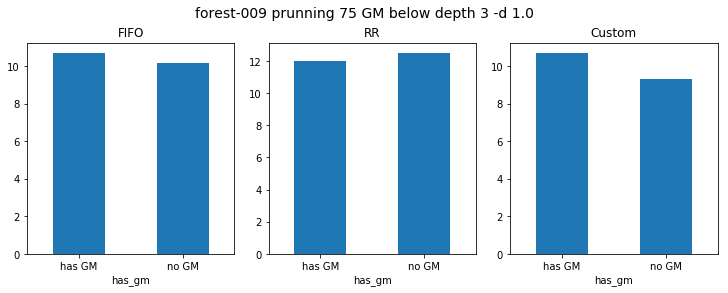

Empty 'DataFrame': no numeric data to plot
forest-010 not found


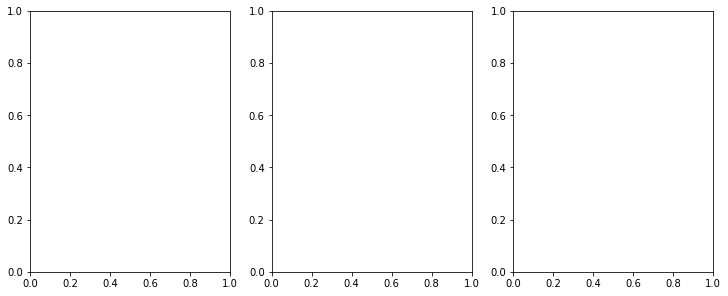

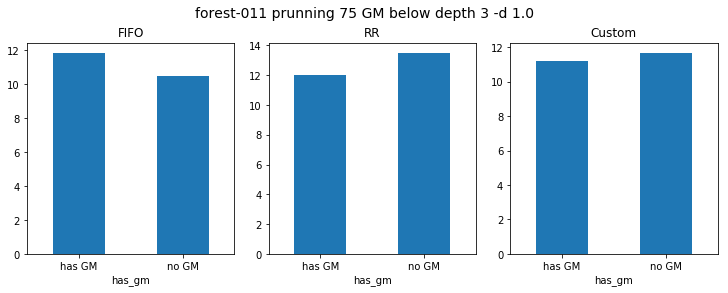

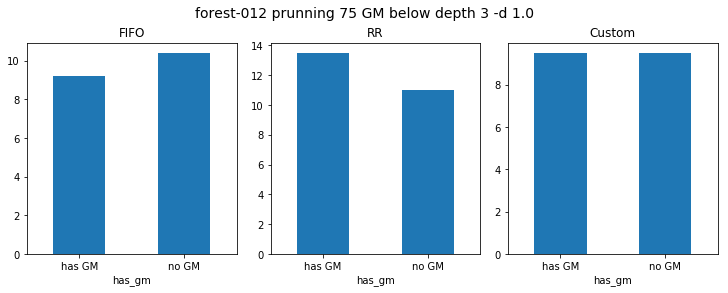

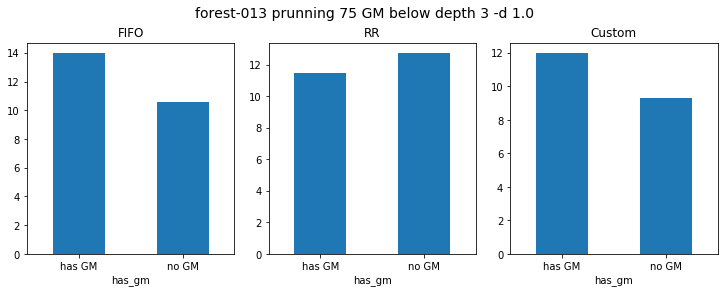

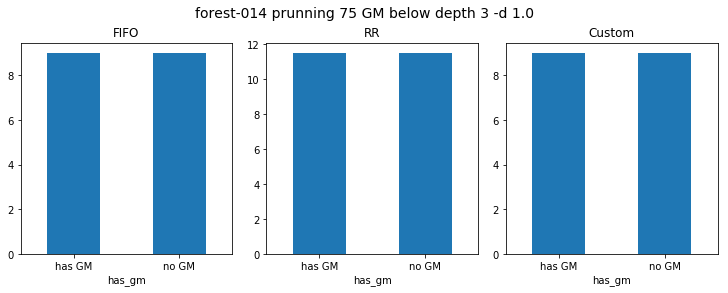

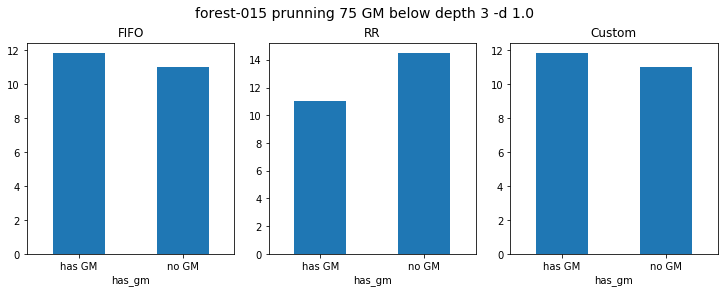

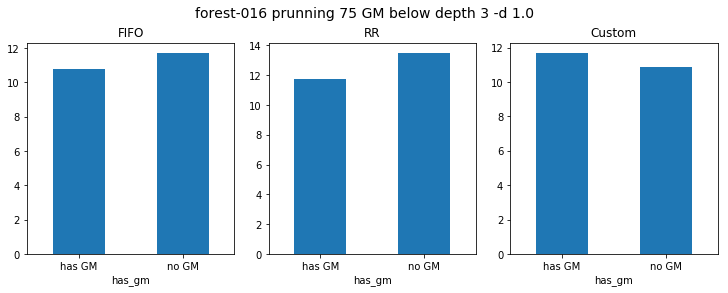

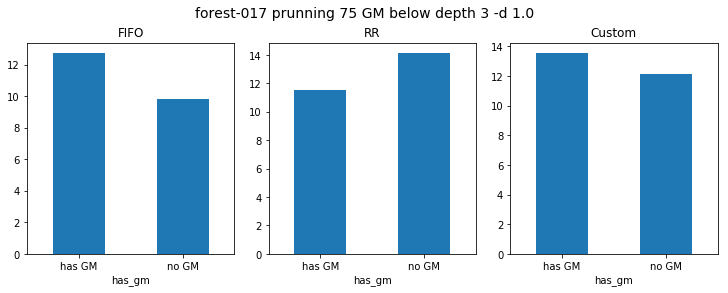

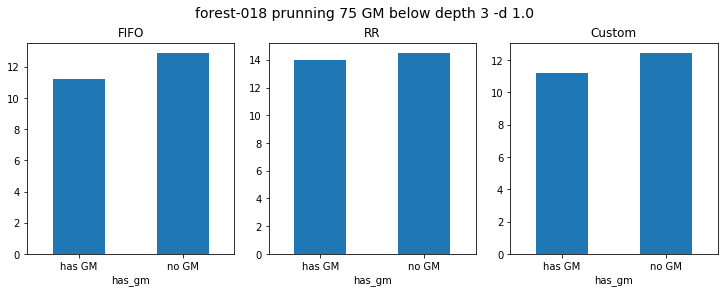

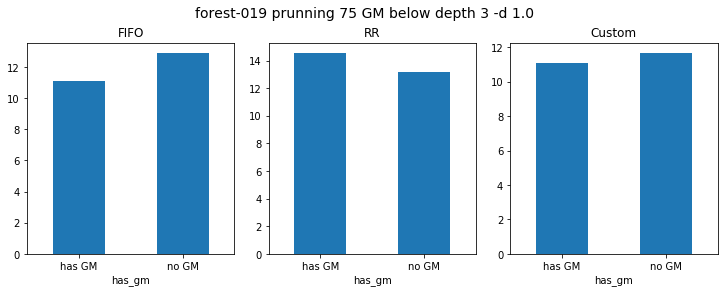

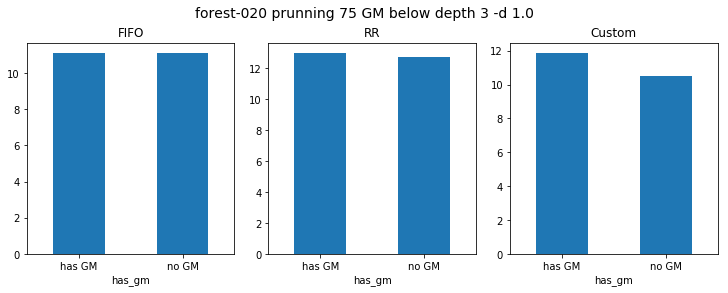

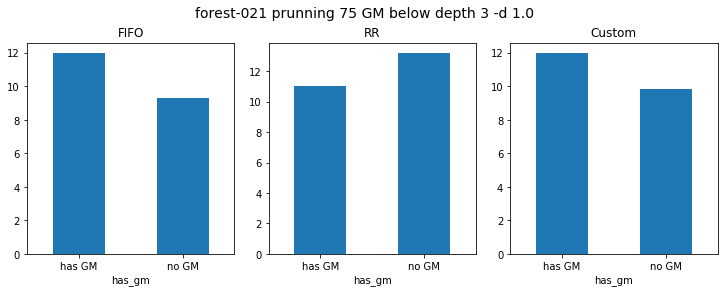

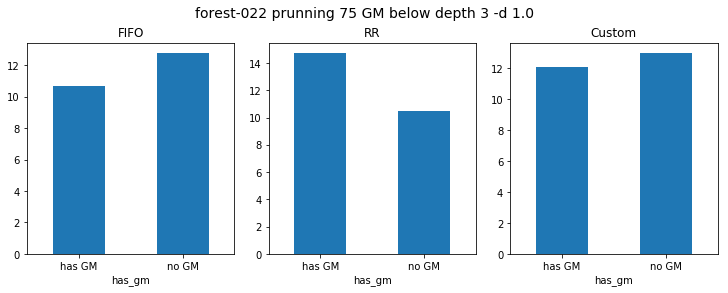

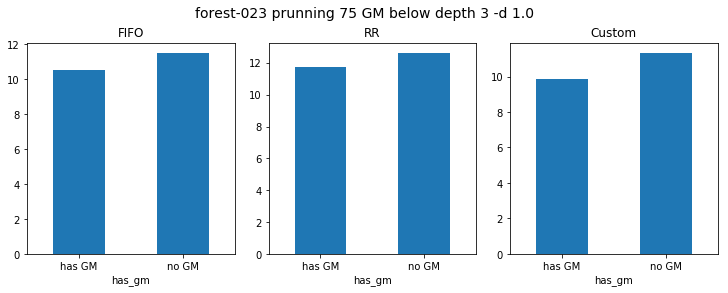

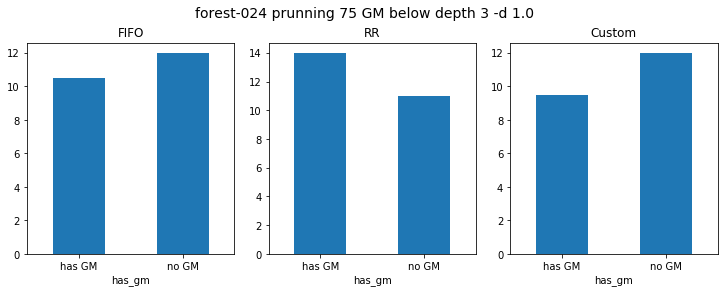

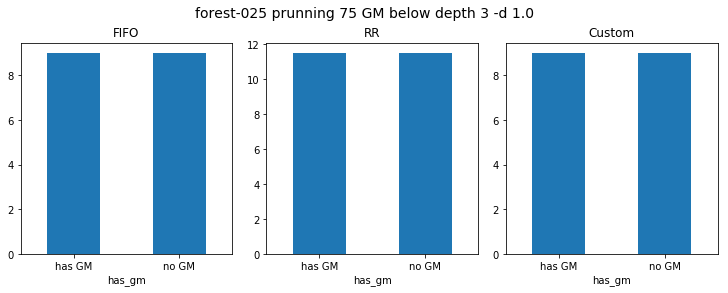

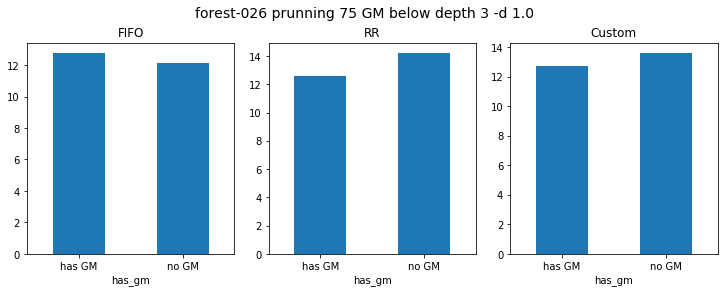

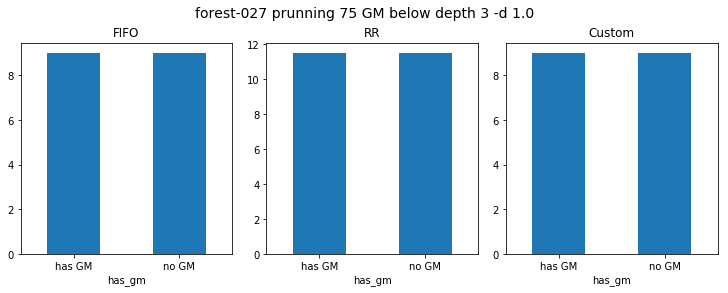

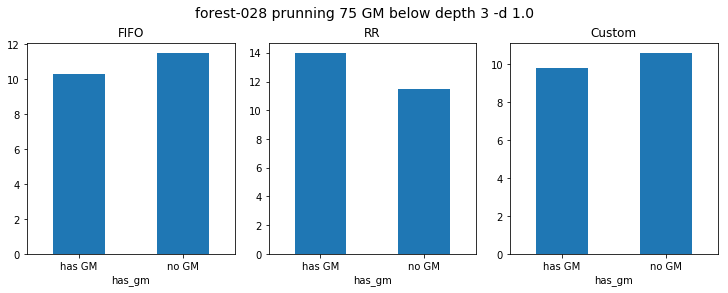

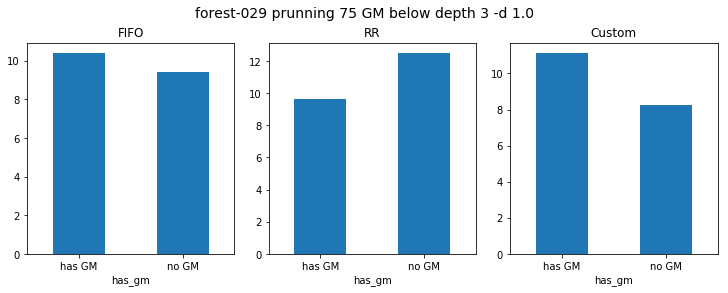

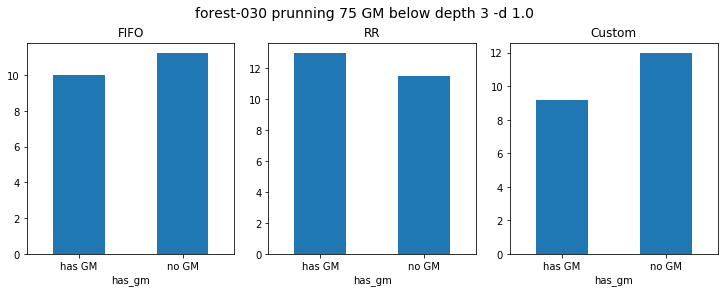

In [ ]:
plot_many4(df75bellow_01_ff, df75bellow_01_rr, df75bellow_01_cus,"FIFO", "RR", "Custom", "below75", "prunning 75 GM below depth 3 -d 1.0")

In [ ]:
plot_all([df00_all ,df04_all], \
             ['prunning 00 trees all', 'prunning 04 trees all'], "FIFO prunning 0.0")

In [ ]:
df75bellow_01_cus['avg_steps'].mean()

In [ ]:
df_ff_gm = df_ff[df_ff['has_gm'] == "has GM"]
df_ff_gm['completed'].mean() / 200

In [ ]:
df_rr_gm = df_rr[df_rr['has_gm'] == "has GM"]
df_rr_gm['completed'].mean() / 200

In [ ]:
df_cus_gm = df_cus[df_cus['has_gm'] == "has GM"]
df_cus_gm['completed'].mean() / 200

In [ ]:
df_ff_gm = df_ff[df_ff['has_gm'] == "has GM"]
df_ff_gm['avg_steps'].mean() 

In [ ]:
df_rr_gm = df_rr[df_rr['has_gm'] == "has GM"]
df_rr_gm['avg_steps'].mean() 

In [ ]:
df_cus_gm = df_cus[df_cus['has_gm'] == "has GM"]
df_cus_gm['avg_steps'].astype(float).mean() 

In [ ]:
print("ff: ", df_ff_gm['pending'].mean() / 200)
print("rr: ", df_rr_gm['pending'].mean() / 200)
print("cus: ", df_cus_gm['pending'].mean() / 200)

In [ ]:
print("ff: ", df_ff_gm['active'].mean() / 200)
print("rr: ", df_rr_gm['active'].mean() / 200)
print("cus: ", df_cus_gm['active'].mean() / 200)

In [ ]:
print("ff: ", df_ff_gm['failed_by_retries'].mean() / 200)
print("rr: ", df_rr_gm['failed_by_retries'].mean() / 200)
print("cus: ", df_cus_gm['failed_by_retries'].mean() / 200)

In [ ]:
# plot_all([df00_ff ,df04_ff], \
#              ['prunning 00 fifo all depth', 'prunning 04 fifo all depth'], "FIFO prunning 0.0")

In [ ]:
# plot_all([df00_rr ,df04_rr], \
#              ['prunning 00 rr all depth', 'prunning 04 rr all depth'], "FIFO prunning 0.0")

In [ ]:
df75bellow_ff_gm = df75bellow_ff.copy()
df75above_ff_gm = df75above_ff.copy()

In [ ]:
df75bellow_ff_gm = df75bellow_ff_gm[df75bellow_ff_gm['has_gm'] == "has GM"]
df75above_ff_gm = df75above_ff_gm[df75above_ff_gm['has_gm'] == "has GM"]


In [ ]:
df75bellow_ff_gm.sample(3)

In [ ]:
df75above_ff_gm.sample(3)

In [ ]:
df75bellow_ff_gm['avg_steps'].mean()

In [ ]:
summary = {
#     'avg_steps': [df75above_ff_gm['avg_steps'].mean(), df75bellow_ff_gm['avg_steps'].mean()],
    'completed': [df75above_ff_gm['completed'].mean(), df75bellow_ff_gm['completed'].mean()],
    'pending':[df75above_ff_gm['pending'].mean(), df75bellow_ff_gm['pending'].mean()],
    'active':[df75above_ff_gm['active'].mean(), df75bellow_ff_gm['active'].mean()],
    'gm_location': ['above 3', 'below 3']
}

In [ ]:
df_75_gm = pd.DataFrame(summary, columns=summary.keys())

In [ ]:
df_75_gm

In [ ]:
df_75_gm.groupby(['gm_location']).sum().plot(kind='bar')

In [ ]:
df_ff.groupby(['has_gm']).mean().plot(kind='bar')

In [ ]:
def make_df_gm(df, df2, steps):
    df_new = df.copy()
    df_new = df_new[df_new['has_gm'] == "has GM"]
    
    df2_new = df2.copy()
    df2_new = df2_new[df2_new['has_gm'] == "has GM"]
    
    if not steps:
        summary = {
    #     'avg_steps': [df_new['avg_steps'].mean(), df2_new['avg_steps'].mean()],
        'completed': [df_new['completed'].mean(), df2_new['completed'].mean()],
        'pending':[df_new['pending'].mean(), df2_new['pending'].mean()],
        'active':[df_new['active'].mean(), df2_new['active'].mean()],
        'failed_by_retries':[df_new['failed_by_retries'].mean(), df2_new['failed_by_retries'].mean()],
        'gm_location': ['above 3', 'below 3']
        }
    else:
        summary = {
        'avg_steps': [df_new['avg_steps'].astype(float).mean(), df2_new['avg_steps'].astype(float).mean()],
        'gm_location': ['above 3', 'below 3']
        }
    return pd.DataFrame(summary, columns=summary.keys())

In [ ]:
df_00_gm = make_df_gm(df00above_ff, df00bellow_ff, False)
df_04_gm = make_df_gm(df04above_ff, df04bellow_ff, False)
df_75_gm = make_df_gm(df75above_ff, df75bellow_ff, False)

df_00_gm_steps = make_df_gm(df00above_ff, df00bellow_ff, True)
df_04_gm_steps = make_df_gm(df04above_ff, df04bellow_ff, True)
df_75_gm_steps = make_df_gm(df75above_ff, df75bellow_ff, True)

df_00_gm_rr = make_df_gm(df00above_rr, df00bellow_rr, False)
df_04_gm_rr = make_df_gm(df04above_rr, df04bellow_rr, False)
df_75_gm_rr = make_df_gm(df75above_rr, df75bellow_rr, False)

df_00_gm_steps_rr = make_df_gm(df00above_rr, df00bellow_rr, True)
df_04_gm_steps_rr = make_df_gm(df04above_rr, df04bellow_rr, True)
df_75_gm_steps_rr = make_df_gm(df75above_rr, df75bellow_rr, True)

df_00_gm_cus = make_df_gm(df00above_cus, df00bellow_cus, False)
df_04_gm_cus = make_df_gm(df04above_cus, df04bellow_cus, False)
df_75_gm_cus = make_df_gm(df75above_cus, df75bellow_cus, False)

df_00_gm_steps_cus = make_df_gm(df00above_cus, df00bellow_cus, True)
df_04_gm_steps_cus = make_df_gm(df04above_cus, df04bellow_cus, True)
df_75_gm_steps_cus = make_df_gm(df75above_cus, df75bellow_cus, True)




df75_00_ff =  make_df_gm(df75above_00_ff, df75bellow_00_ff, False)
df75_05_ff =  make_df_gm(df75above_05_ff, df75bellow_05_ff, False)
df75_01_ff =  make_df_gm(df75above_01_ff, df75bellow_01_ff, False)

df75_00_ff_steps =  make_df_gm(df75above_00_ff, df75bellow_00_ff, True)
df75_05_ff_steps =  make_df_gm(df75above_05_ff, df75bellow_05_ff, True)
df75_01_ff_steps =  make_df_gm(df75above_01_ff, df75bellow_01_ff, True)

df00_00_ff =  make_df_gm(df00above_00_ff, df00bellow_00_ff, False)
df00_05_ff =  make_df_gm(df00above_05_ff, df00bellow_05_ff, False)
df00_01_ff =  make_df_gm(df00above_01_ff, df00bellow_01_ff, False)

df00_00_ff_steps =  make_df_gm(df00above_00_ff, df00bellow_00_ff, True)
df00_05_ff_steps =  make_df_gm(df00above_05_ff, df00bellow_05_ff, True)
df00_01_ff_steps =  make_df_gm(df00above_01_ff, df00bellow_01_ff, True)

df04_00_ff =  make_df_gm(df04above_00_ff, df04bellow_00_ff, False)
df04_05_ff =  make_df_gm(df04above_05_ff, df04bellow_05_ff, False)
df04_01_ff =  make_df_gm(df04above_01_ff, df04bellow_01_ff, False)

df04_00_ff_steps =  make_df_gm(df04above_00_ff, df04bellow_00_ff, True)
df04_05_ff_steps =  make_df_gm(df04above_05_ff, df04bellow_05_ff, True)
df04_01_ff_steps =  make_df_gm(df04above_01_ff, df04bellow_01_ff, True)



df75_00_rr =  make_df_gm(df75above_00_rr, df75bellow_00_rr, False)
df75_05_rr =  make_df_gm(df75above_05_rr, df75bellow_05_rr, False)
df75_01_rr =  make_df_gm(df75above_01_rr, df75bellow_01_rr, False)

df75_00_rr_steps =  make_df_gm(df75above_00_rr, df75bellow_00_rr, True)
df75_05_rr_steps =  make_df_gm(df75above_05_rr, df75bellow_05_rr, True)
df75_01_rr_steps =  make_df_gm(df75above_01_rr, df75bellow_01_rr, True)

df00_00_rr =  make_df_gm(df00above_00_rr, df00bellow_00_rr, False)
df00_05_rr =  make_df_gm(df00above_05_rr, df00bellow_05_rr, False)
df00_01_rr =  make_df_gm(df00above_01_rr, df00bellow_01_rr, False)

df00_00_rr_steps =  make_df_gm(df00above_00_rr, df00bellow_00_rr, True)
df00_05_rr_steps =  make_df_gm(df00above_05_rr, df00bellow_05_rr, True)
df00_01_rr_steps =  make_df_gm(df00above_01_rr, df00bellow_01_rr, True)

df04_00_rr =  make_df_gm(df04above_00_rr, df04bellow_00_rr, False)
df04_05_rr =  make_df_gm(df04above_05_rr, df04bellow_05_rr, False)
df04_01_rr =  make_df_gm(df04above_01_rr, df04bellow_01_rr, False)
df04_00_rr_steps =  make_df_gm(df04above_00_rr, df04bellow_00_rr, True)
df04_05_rr_steps =  make_df_gm(df04above_05_rr, df04bellow_05_rr, True)
df04_01_rr_steps =  make_df_gm(df04above_01_rr, df04bellow_01_rr, True)



df75_00_cus =  make_df_gm(df75above_00_cus, df75bellow_00_cus, False)
df75_05_cus =  make_df_gm(df75above_05_cus, df75bellow_05_cus, False)
df75_01_cus =  make_df_gm(df75above_01_cus, df75bellow_01_cus, False)

df75_00_cus_steps =  make_df_gm(df75above_00_cus, df75bellow_00_cus, True)
df75_05_cus_steps =  make_df_gm(df75above_05_cus, df75bellow_05_cus, True)
df75_01_cus_steps =  make_df_gm(df75above_01_cus, df75bellow_01_cus, True)

df00_00_cus =  make_df_gm(df00above_00_cus, df00bellow_00_cus, False)
df00_05_cus =  make_df_gm(df00above_05_cus, df00bellow_05_cus, False)
df00_01_cus =  make_df_gm(df00above_01_cus, df00bellow_01_cus, False)

df00_00_cus_steps =  make_df_gm(df00above_00_cus, df00bellow_00_cus, True)
df00_05_cus_steps =  make_df_gm(df00above_05_cus, df00bellow_05_cus, True)
df00_01_cus_steps =  make_df_gm(df00above_01_cus, df00bellow_01_cus, True)

df04_00_cus =  make_df_gm(df04above_00_cus, df04bellow_00_cus, False)
df04_05_cus =  make_df_gm(df04above_05_cus, df04bellow_05_cus, False)
df04_01_cus =  make_df_gm(df04above_01_cus, df04bellow_01_cus, False)
df04_00_cus_steps =  make_df_gm(df04above_00_cus, df04bellow_00_cus, True)
df04_05_cus_steps =  make_df_gm(df04above_05_cus, df04bellow_05_cus, True)
df04_01_cus_steps =  make_df_gm(df04above_01_cus, df04bellow_01_cus, True)

In [ ]:
df_04_gm

In [ ]:
def plot_many5(df0, df1, df2, title0, title1, title2, steps):
    fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))
    
#     df = df_list[count][['completed', 'pending', 'active', 'failed_by_retries']]
    
    if not steps:
        df0_new = get_proportion_df(df0)
        df1_new = get_proportion_df(df1)
        df2_new = get_proportion_df(df2)

        df0_new.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[0])
        df1_new.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[1])
        df2_new.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[2])
    else:
        df0.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[0])
        df1.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[1])
        df2.groupby(['gm_location']).sum().plot(kind='bar', ax=axs[2])
        
    axs[1].set_title(title1)
    axs[0].set_title(title0)
    axs[2].set_title(title2)
    axs[0].get_legend().remove()
    axs[1].get_legend().remove()
    axs[2].legend(bbox_to_anchor=(1, 1))
#     axs[2].get_legend().remove()
    plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
    plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
    plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
#     fig.suptitle((file_name + " " + category), fontsize=14)
            
    plt.show()

In [ ]:
plot_many5(df_00_gm,df_04_gm,df_75_gm, 'Pruning 0.0', 'Pruning 0.4', 'Pruning 0.75', False)

In [ ]:
plot_many5(df_00_gm_steps,df_04_gm_steps,df_75_gm_steps, 'Pruning 0.0', 'Pruning 0.4', 'Pruning 0.75', True)

In [ ]:
plot_many5(df75_00_ff,df75_05_ff,df75_01_ff, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)

In [ ]:
plot_many5(df00_00_ff,df00_05_ff,df00_01_ff, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)

In [ ]:
plot_many5(df04_00_ff,df04_05_ff,df04_01_ff, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)

In [ ]:
plot_many5(df75_00_ff_steps,df75_05_ff_steps,df75_01_ff_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df00_00_ff_steps,df00_05_ff_steps,df00_01_ff_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df04_00_ff_steps,df04_05_ff_steps,df04_01_ff_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
###### rr

plot_many5(df75_00_rr,df75_05_rr,df75_01_rr, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df75_00_rr_steps,df75_05_rr_steps,df75_01_rr_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df00_00_rr,df00_05_rr,df00_01_rr, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df00_00_rr_steps,df00_05_rr_steps,df00_01_rr_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df04_00_rr,df04_05_rr,df04_01_rr, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df04_00_rr_steps,df04_05_rr_steps,df04_01_rr_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
# cus

plot_many5(df00_00_cus,df00_05_cus,df00_01_cus, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df00_00_cus_steps,df00_05_cus_steps,df00_01_cus_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df04_00_cus,df04_05_cus,df04_01_cus, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df04_00_cus_steps,df04_05_cus_steps,df04_01_cus_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
######## cus

plot_many5(df75_00_cus,df75_05_cus,df75_01_cus, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', False)
plot_many5(df75_00_cus_steps,df75_05_cus_steps,df75_01_cus_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
plot_many5(df75_00_cus_steps,df75_05_cus_steps,df75_01_cus_steps, 'Dynamicity 0.0', 'Dynamicity 0.5', 'Dynamicity 1.0', True)

In [ ]:
def plot_many6(df0):
    
    trees = ['T0-G0', 'T1-G0']
    
#     fig, axs = plt.subplots(1,1, constrained_layout=True, figsize=(10,4))
    
    df0_copy = df0.copy()
    
#     df0_copy = df0_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
    df0_copy = df0_copy[['avg_steps', 'has_gm']]
#     df0_new = get_proportion_df(df0_copy)
    
    df0_copy.groupby(['has_gm']).mean().plot(kind='bar', rot=0)
    
#     df.plot(kind='bar',alpha=0.75, rot=0)
    plt.xlabel("")
    plt.show()
    
#     for i in range(1,31):
        
#         file_name = get_file_name(i)
        
#         try:
#             df0_copy = df0.copy()
#             df1_copy = df1.copy()
#             df2_copy = df2.copy()
            
#             df0_copy = df0_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
#             df1_copy = df1_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
#             df2_copy = df2_copy[['completed', 'pending', 'active', 'failed_by_retries', 'has_gm']]
            
#             df0_new = get_proportion_df(df0_copy)
#             df1_new = get_proportion_df(df1_copy)
#             df2_new = get_proportion_df(df2_copy)
            


#             df0_new.drop(df0_new.loc[df0['forest_name']!= file_name].index, inplace=True)
#             df1_new.drop(df1_new.loc[df1['forest_name']!= file_name].index, inplace=True)
#             df2_new.drop(df2_new.loc[df2['forest_name']!= file_name].index, inplace=True)

#             fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,4))
            
#             df0_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[0])
#             df1_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[1])
#             df2_new.groupby(['has_gm']).sum().plot(kind='bar' , ax=axs[2])

#             axs[1].set_title(title1)
#             axs[0].set_title(title0)
#             axs[2].set_title(title2)
#             axs[0].get_legend().remove()
#             axs[1].get_legend().remove()
            
#             if(i == 1):
#                 axs[2].legend(bbox_to_anchor=(1, 1))
#             else:
#                 axs[2].get_legend().remove()
#             plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=0 )
#             plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=0 )
#             plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=0 )
#             fig.suptitle((file_name + " " + category), fontsize=14)
            
#             plt.show()
#         except Exception as e:
#             print(e)
#             print(file_name + " not found")

        

In [ ]:
plot_many6(df75_ff)



In [ ]:
plot_many6(df00_ff)


In [ ]:
plot_many6(df04_ff)
